# Investing in Stocks (Fall 2023)

Swetha Arayamparambil, Danielle Bartlett, Stephen Ciulla, Nikhil Uttawar

OPIM 5641- David Bergman

This notebook contains the steps that we took for optimal portfolio allocation using Modern Portfolio Theory (MPT) and Momentum Trading (MT).

The three sectors selected for our group were Consumer Staples, Utilities, and Real Estate.

Our selected stocks for each sector are as follows:

**Consumer Staples:** Church & Dwight Co. (CHD), Keurig Dr Pepper Inc. (KDP), and Walmart Inc. (WMT).

**Utilities:** Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNM), and FirstEnergy Corp. (FE).

**Real Estate:** Avalonbay Communities (AVB), Invitation Homes Inc. (INVH), and Prologis, Inc. (PLD).


# Import Libs

In [ ]:
# Importing of Packages that will be used to conduct the analyses
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importing of Packages specific to stocks
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.2 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=235dafb3ad479f32ea1fa1d8579919148d4211a2bc2b8ac86dd044d53a1b8ee5
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24589 sha256=3289fd5ff3582a649da700ae2bb4bbf4928ec0e082f76eb6f4df41f2ed4c0657
  Stored in directory: /root/.cache/pip/wheels/70/4b/f0/ea

In [ ]:
# import modules
from pylab import *
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 116MB/s]


In [ ]:
##install pyomo
!pip install -q pyomo

try:
    import google.colab
    try:
        from pyomo.environ import ConcreteModel
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt'
except:
    pass

# 1 - Data Preparation and EDA


## 1.1 Data Retrieval and Cleaning

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

In [ ]:
##print data to verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291168   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883438   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759598   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033401   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777954   
 ...                ...         ...         ...         ...         ...   
 2021-12-23  247.509995  248.259995  244.630005  245.770004  233.946548   
 2021-12-27  246.630005  249.889999  245.089996  249.699997  237.687469   
 2021-12-28  249.119995  251.419998  248.919998  250.410004  238.363327   
 2021-12-29  251.139999  253.449997  248.559998  252.550003  240.400360   
 2021-12-30  251.000000  252.580002  249.869995  251.259995  240.687759   
 
             volume ticker  
 2017-01-03  858200    AVB  
 2017-01-04  759700    AVB  
 201

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291168        NaN   44.791862  20.318056  60.147598   
2017-01-04  143.883438        NaN   45.589291  20.491274  60.482105   
2017-01-05  144.759598        NaN   45.606266  20.497047  60.979946   
2017-01-06  146.033401        NaN   45.903179  20.831926  61.057758   
2017-01-09  143.777954        NaN   45.555359  20.364248  60.077591   
...                ...        ...         ...        ...        ...   
2021-12-23  233.946548  42.567467  156.564423  37.336266  64.214584   
2021-12-27  237.687469  43.129219  160.571716  37.555527  64.195946   
2021-12-28  238.363327  43.187332  160.474915  38.103691  64.969383   
2021-12-29  240.400360  43.749084  162.304321  38.816292  65.109161   
2021-12-30  240.687759  43.739407  162.585022  39.295929  65.696236   

                   FE        CHD        KDP         WMT  
2017-01-03  23.640963  40.784176  12.810678   60.601776  
2017-01-04  23.656239  41.115299  12.871305   60.954845  
2017-01-05  23.564581  41.290070  12.882585   61.087234  
2017-01-06  23.778456  41.271679  12.820549   60.248734  
2017-01-09  23.686798  40.747395  12.765562   60.645912  
...               ...        ...        ...         ...  
2021-12-23  38.232174  98.027596  34.806564  136.253082  
2021-12-27  38.156715  98.845078  34.971203  137.493607  
2021-12-28  38.666100  98.667793  35.223000  139.466736  
2021-12-29  38.845329  99.455711  35.426380  139.398376  
2021-12-30  39.015125  99.889069  35.523228  139.847687  

[1258 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034962  0.011500  0.012800  0.010437  0.014343  0.003686   
2017-02-03 -0.011450  0.019773  0.023441 -0.001117  0.003085  0.010138   
2017-02-06  0.007434  0.004847 -0.016331  0.000838 -0.002307 -0.000334   
2017-02-07  0.005148  0.003377 -0.013363  0.005585  0.000899  0.003681   
2017-02-08  0.015821  0.001923  0.013134 -0.021661  0.008342  0.001667   
...              ...       ...       ...       ...       ...       ...   
2021-12-23 -0.005704 -0.000682 -0.003143  0.002207  0.005252  0.000247   
2021-12-27  0.015990  0.013197  0.025595  0.005873 -0.000290 -0.001974   
2021-12-28  0.002843  0.001347 -0.000603  0.014596  0.012048  0.013350   
2021-12-29  0.008546  0.013007  0.011400  0.018702  0.002151  0.004635   
2021-12-30  0.001196 -0.000221  0.001729  0.012357  0.009017  0.004371   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007096  
2017-02-03  0.006150  0.001529 -0.002999  
2017-02-06 -0.007859 -0.005887 -0.001504  
2017-02-07  0.040044  0.015354  0.007380  
2017-02-08  0.011847  0.002160  0.013754  
...              ...       ...       ...  
2021-12-23  0.001308  0.001952 -0.002218  
2021-12-27  0.008339  0.004730  0.009105  
2021-12-28 -0.001794  0.007200  0.014351  
2021-12-29  0.007986  0.005774 -0.000490  
2021-12-30  0.004357  0.002734  0.003223  

[1237 rows x 9 columns]

In [ ]:
##print shape of return_data
return_data.shape

(1237, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000599
INVH    0.000879
PLD     0.001256
EXC     0.000665
PNW     0.000199
FE      0.000604
CHD     0.000811
KDP     0.000965
WMT     0.000800
      Std_Dev_Return
AVB         0.017080
INVH        0.016980
PLD         0.016856
EXC         0.016619
PNW         0.015892
FE          0.018173
CHD         0.014353
KDP         0.016718
WMT         0.013815


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## 1.2 Time Series Visualizations






### 1.2.1 Visualization of Utilities Sector

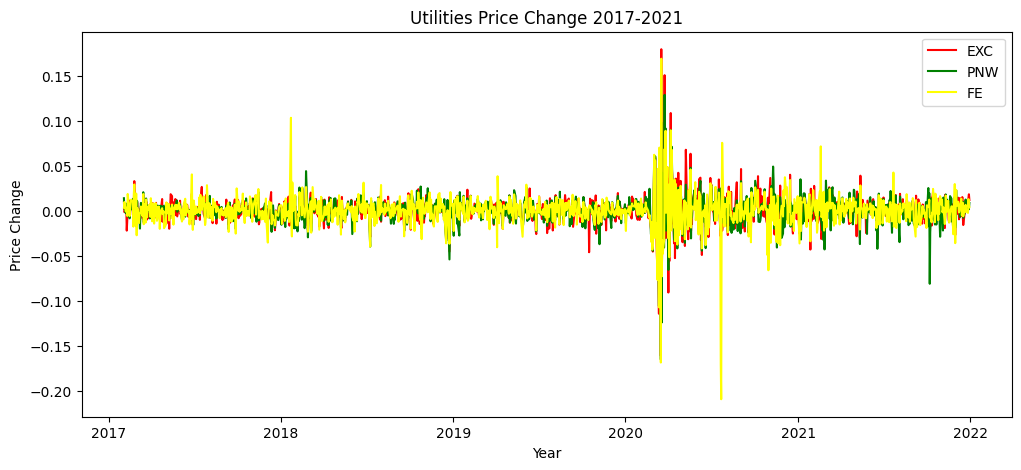

In [ ]:
fig, ax = plt.subplots(figsize = (12,5))
plt.plot(return_data['EXC'],color="red", label='EXC')
plt.plot(return_data['PNW'],color="green", label='PNW')
plt.plot(return_data['FE'],color="yellow", label = 'FE')
plt.title('Utilities Price Change 2017-2021')
plt.xlabel('Year')
plt.ylabel('Price Change')
plt.legend()
plt.show()

### 1.2.2 Visualization of Real Estate Sector

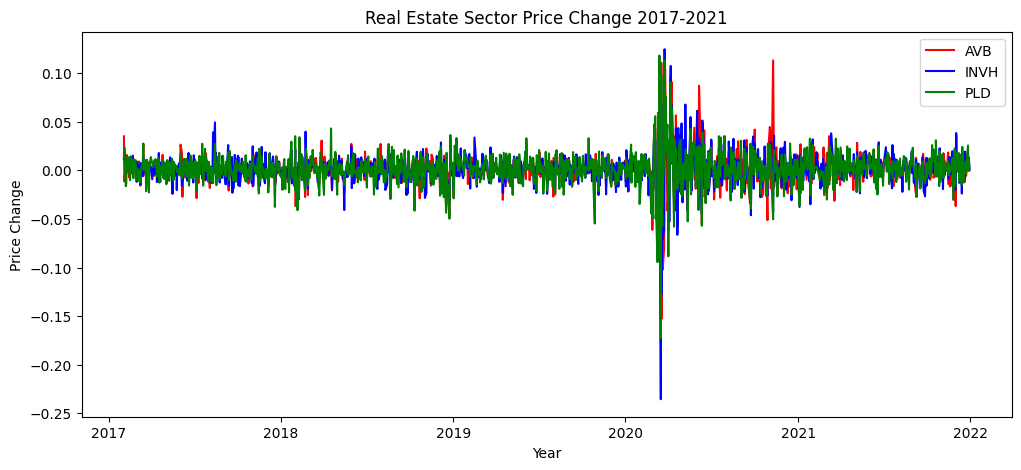

In [ ]:
fig, ax = plt.subplots(figsize = (12,5))
plt.plot(return_data['AVB'],color="Red", label='AVB')
plt.plot(return_data['INVH'],color="Blue", label='INVH')
plt.plot(return_data['PLD'],color="Green", label='PLD')
plt.title('Real Estate Sector Price Change 2017-2021')
plt.xlabel('Year')
plt.ylabel('Price Change')
plt.legend()
plt.show()


### 1.2.3 Visualization of Consumer Staples Sector

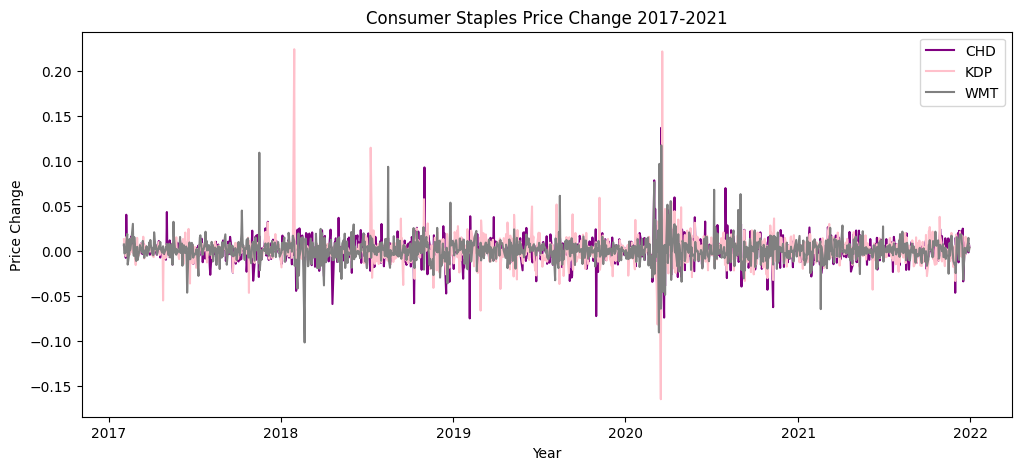

In [ ]:
fig, ax = plt.subplots(figsize = (12,5))
plt.plot(return_data['CHD'],color="purple", label='CHD')
plt.plot(return_data['KDP'],color="pink", label='KDP')
plt.plot(return_data['WMT'],color="gray", label='WMT')
plt.title('Consumer Staples Price Change 2017-2021')
plt.xlabel('Year')
plt.ylabel('Price Change')
plt.legend()
plt.show()

## 1.3 - Discussion of the Plots

* Volatility for all stocks have remained fairly moderate throughout 2017 to 2020, which is as expected.

* There is high volatility in 2020, which is attributed to the Corona virus pandemic.

* For the remainig time, the volatility seems to have returned to pre-pandemic normal levels.

* FirstEnergy Corp. (FE) had a massive dip in their stock prices in July 2020, following the crash related to Covid. This was attributed to legal issues the company was facing.

* Keurig Dr Pepper Inc. (KDP) had a spike in 2018, attributed to a merger, followed by normal trends as the other stocks.


# 2 - Optimization Model



## 2.1 Model execution

Here we use non-linear optimization to choose portfolio allocations which balance risk and reward well.

Risk is a function of the variability of a stock's returns, as well as the pairwise covariance of the stocks in our portfolio.

In [ ]:
##alculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000292  0.000211  0.000193  0.000185  0.000176  0.000159  0.000077   
INVH  0.000211  0.000289  0.000205  0.000180  0.000166  0.000154  0.000079   
PLD   0.000193  0.000205  0.000284  0.000183  0.000154  0.000162  0.000099   
EXC   0.000185  0.000180  0.000183  0.000276  0.000206  0.000200  0.000106   
PNW   0.000176  0.000166  0.000154  0.000206  0.000253  0.000174  0.000091   
FE    0.000159  0.000154  0.000162  0.000200  0.000174  0.000331  0.000095   
CHD   0.000077  0.000079  0.000099  0.000106  0.000091  0.000095  0.000206   
KDP   0.000071  0.000082  0.000080  0.000088  0.000081  0.000077  0.000059   
WMT   0.000067  0.000066  0.000087  0.000085  0.000065  0.000079  0.000080   

           KDP       WMT  
AVB   0.000071  0.000067  
INVH  0.000082  0.000066  
PLD   0.000080  0.000087  
EXC   0.000088  0.000085  
PNW   0.000081  0.000065  
FE    0.000077  0.000079  
CHD   0.000059  0.000080  
KDP   0.000280  0.000051  
WMT   0.000051  0.000191

All of the stocks selected have positive covariance.

### Define the Model

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.0002
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-95-7030321774c0>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-95-7030321774c0>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
import logging
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)


From 100 risk levels, we found 79 solutions. Rest were discarded as infeasible solutions.


## 2.2 Plot with allocation of the stocks

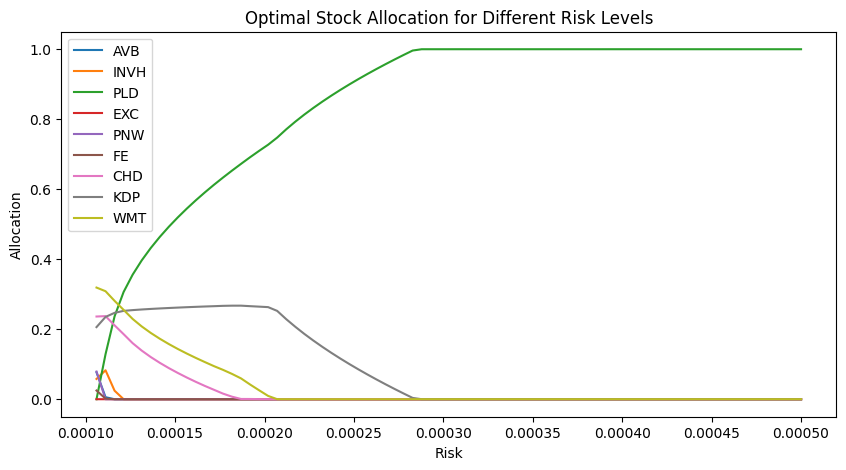

In [ ]:
##Plot the allocations as a function of risk level.

param_analysis = pd.DataFrame.from_dict(allocations, orient='index')
param_analysis.columns = list(tickers_list)
param_analysis.plot(figsize=(10, 5))
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.xlabel("Risk")
plt.ylabel("Allocation")
plt.show()

## 2.3 Plot with efficient frontier

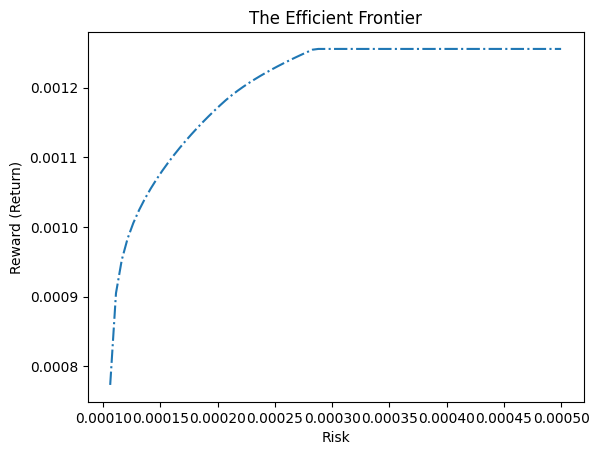

In [ ]:
##Let's show the efficient frontier.
risk = list(all_returns.keys())
reward = list(all_returns.values())

from pylab import plot, title, xlabel, ylabel
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

In [ ]:
param_analysis.head(20)

AVB      INVH       PLD       EXC       PNW        FE  \
0.000106  0.076875  0.057929  0.000000  0.000000  0.079019  0.024850   
0.000111  0.005788  0.082660  0.128652  0.000010  0.000009  0.001757   
0.000116  0.000016  0.024358  0.236685  0.000009  0.000005  0.000018   
0.000121  0.000004  0.000025  0.306371  0.000003  0.000002  0.000004   
0.000126  0.000008  0.000030  0.355801  0.000008  0.000004  0.000009   
0.000131  0.000007  0.000022  0.396470  0.000007  0.000004  0.000008   
0.000136  0.000007  0.000019  0.431843  0.000007  0.000004  0.000008   
0.000141  0.000007  0.000017  0.463569  0.000007  0.000004  0.000008   
0.000146  0.000009  0.000041  0.492580  0.000010  0.000004  0.000011   
0.000152  0.000009  0.000037  0.519489  0.000010  0.000004  0.000011   
0.000157  0.000002  0.000005  0.544699  0.000003  0.000001  0.000003   
0.000162  0.000006  0.000014  0.568462  0.000007  0.000003  0.000007   
0.000167  0.000006  0.000014  0.591038  0.000007  0.000003  0.000007   
0.000172  0.000006  0.000014  0.612593  0.000007  0.000003  0.000007   
0.000177  0.000002  0.000005  0.633211  0.000002  0.000001  0.000003   
0.000182  0.000006  0.000013  0.653121  0.000007  0.000003  0.000007   
0.000187  0.000002  0.000005  0.672434  0.000002  0.000001  0.000002   
0.000192  0.000006  0.000013  0.691343  0.000007  0.000003  0.000007   
0.000197  0.000006  0.000013  0.709541  0.000007  0.000003  0.000007   
0.000202  0.000006  0.000012  0.727126  0.000007  0.000003  0.000007   

               CHD       KDP       WMT  
0.000106  0.236287  0.206025  0.319015  
0.000111  0.237420  0.235140  0.308564  
0.000116  0.211089  0.246772  0.281048  
0.000121  0.185887  0.252428  0.255276  
0.000126  0.160168  0.254601  0.229371  
0.000131  0.139020  0.256392  0.208069  
0.000136  0.120624  0.257949  0.189540  
0.000141  0.104125  0.259344  0.172919  
0.000146  0.089022  0.260616  0.157707  
0.000152  0.075061  0.261792  0.143587  
0.000157  0.061938  0.262918  0.130431  
0.000162  0.049599  0.263951  0.117949  
0.000167  0.037919  0.264929  0.106076  
0.000172  0.026990  0.265811  0.094569  
0.000177  0.016046  0.266778  0.083952  
0.000182  0.007216  0.267288  0.072339  
0.000187  0.000743  0.267322  0.059488  
0.000192  0.000673  0.265868  0.042081  
0.000197  0.000332  0.264527  0.025566  
0.000202  0.000276  0.263128  0.009435

## 2.4 Portfolio selection

In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.001 ##proportion of each stock has to be at least 0.001
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.6729423338847528,
 'KDP': 0.2675241585571126,
 'WMT': 0.05953350755813457}

The three stocks we will choose for our portfolio are the following:

PLD: 0.67

KDP: 0.27

WMT: 0.06

### Calculate Allocation

How should the $100,000 be distributed in the portfolio?

In [ ]:
pld_alloc_Jan22 = 100000 * 0.67
kdp_alloc_Jan22 = 100000 * 0.27
wmt_alloc_Jan22 = 100000 * 0.06

In [ ]:
print("PLD Allocation_Jan22:", pld_alloc_Jan22)
print("KDP Allocation_Jan22:" ,kdp_alloc_Jan22)
print("WMT Allocation_Jan22:" ,wmt_alloc_Jan22)

PLD Allocation_Jan22: 67000.0
KDP Allocation_Jan22: 27000.0
WMT Allocation_Jan22: 6000.0


# 3 - Analyis

## 3.1 - Buy-and-Hold strategy for the MPT portfolio

### Buy/Hold: Jan 2022

We will be using the optimal allocation found in Part 2 for the Buy/Hold for January 1st.

#### Read in Data from each stock

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '12/27/2021',end_date='2/3/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2021-12-27        1  162.610001  165.960007  162.610001  165.889999
2021-12-28        2  165.960007  165.960007  164.020004  165.789993
2021-12-29        3  165.960007  168.559998  165.559998  167.679993
2021-12-30        4  167.589996  168.839996  166.690002  167.970001
2021-12-31        5  168.080002  169.929993  167.589996  168.360001

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '12/27/2021',end_date='2/3/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2021-12-27        1  35.639999  36.139999  35.639999  36.110001
2021-12-28        2  36.080002  36.380001  36.040001  36.369999
2021-12-29        3  36.330002  36.669998  36.279999  36.580002
2021-12-30        4  36.689999  36.980000  36.639999  36.680000
2021-12-31        5  36.639999  36.950001  36.470001  36.860001

In [ ]:
ticker = "WMT"
wmt = si.get_data(ticker,start_date = '12/27/2021',end_date='2/3/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
wmt['Day'] = day
# Dropping columns I don't want to use
wmt.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
wmt = wmt[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
wmt.columns = ['WMT_Day', 'WMT_Open', 'WMT_High', 'WMT_Low', 'WMT_Close']
wmt.head()

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close
2021-12-27        1  139.600006  140.869995  139.570007  140.759995
2021-12-28        2  140.600006  142.970001  140.600006  142.779999
2021-12-29        3  142.660004  143.529999  142.320007  142.710007
2021-12-30        4  143.259995  143.699997  142.479996  143.169998
2021-12-31        5  143.199997  145.039993  142.919998  144.690002

#### Merge Stocks into one dataframe

In [ ]:
##merge WMT & KDP
buyhold_Jan = wmt.join(kdp)

In [ ]:
##add PLD to merged data
buyhold_Jan = buyhold_Jan.join(pld)

In [ ]:
##check work
buyhold_Jan.head(10)

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close  KDP_Day  \
2021-12-27        1  139.600006  140.869995  139.570007  140.759995        1   
2021-12-28        2  140.600006  142.970001  140.600006  142.779999        2   
2021-12-29        3  142.660004  143.529999  142.320007  142.710007        3   
2021-12-30        4  143.259995  143.699997  142.479996  143.169998        4   
2021-12-31        5  143.199997  145.039993  142.919998  144.690002        5   
2022-01-03        6  144.000000  144.789993  143.009995  144.649994        6   
2022-01-04        7  144.039993  145.139999  141.759995  142.000000        7   
2022-01-05        8  142.850006  145.949997  142.740005  143.919998        8   
2022-01-06        9  143.619995  144.639999  142.399994  143.520004        9   
2022-01-07       10  143.500000  145.360001  142.960007  144.889999       10   

             KDP_Open   KDP_High    KDP_Low  KDP_Close  PLD_Day    PLD_Open  \
2021-12-27  35.639999  36.139999  35.639999  36.110001        1  162.610001   
2021-12-28  36.080002  36.380001  36.040001  36.369999        2  165.960007   
2021-12-29  36.330002  36.669998  36.279999  36.580002        3  165.960007   
2021-12-30  36.689999  36.980000  36.639999  36.680000        4  167.589996   
2021-12-31  36.639999  36.950001  36.470001  36.860001        5  168.080002   
2022-01-03  36.639999  36.759998  36.250000  36.709999        6  168.460007   
2022-01-04  36.790001  37.400002  36.770000  37.259998        7  164.169998   
2022-01-05  36.930000  37.540001  36.770000  37.029999        8  161.000000   
2022-01-06  36.980000  37.889999  36.980000  37.430000        9  157.429993   
2022-01-07  37.299999  37.410000  36.990002  37.299999       10  156.500000   

              PLD_High     PLD_Low   PLD_Close  
2021-12-27  165.960007  162.610001  165.889999  
2021-12-28  165.960007  164.020004  165.789993  
2021-12-29  168.559998  165.559998  167.679993  
2021-12-30  168.839996  166.690002  167.970001  
2021-12-31  169.929993  167.589996  168.360001  
2022-01-03  169.029999  162.039993  164.899994  
2022-01-04  165.330002  160.100006  161.000000  
2022-01-05  161.330002  157.369995  157.649994  
2022-01-06  157.449997  155.350006  156.570007  
2022-01-07  156.839996  153.429993  153.729996

In [ ]:
buyhold_Jan.tail()

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close  KDP_Day  \
2022-01-27       23  136.919998  139.080002  135.369995  135.839996       23   
2022-01-28       24  136.000000  137.570007  133.949997  137.520004       24   
2022-01-31       25  137.089996  140.039993  136.699997  139.809998       25   
2022-02-01       26  139.210007  141.149994  138.990005  140.910004       26   
2022-02-02       27  141.000000  141.639999  140.149994  140.850006       27   

             KDP_Open   KDP_High    KDP_Low  KDP_Close  PLD_Day    PLD_Open  \
2022-01-27  37.410000  38.520000  37.410000  37.599998       23  151.850006   
2022-01-28  37.310001  37.669998  37.060001  37.639999       24  149.320007   
2022-01-31  37.320000  38.080002  37.310001  37.950001       25  155.210007   
2022-02-01  37.990002  38.189999  37.480000  38.139999       26  157.410004   
2022-02-02  38.299999  38.889999  38.169998  38.770000       27  154.720001   

              PLD_High     PLD_Low   PLD_Close  
2022-01-27  154.149994  147.589996  148.610001  
2022-01-28  155.110001  146.389999  155.070007  
2022-01-31  157.270004  154.429993  156.820007  
2022-02-01  157.500000  152.330002  153.520004  
2022-02-02  157.960007  154.720001  157.330002

In [ ]:
##WMT
buyhold_Jan['WMT_Close'] = np.log(buyhold_Jan['WMT_Close']) # price will always be positive, so this operation is well-defined
buyhold_Jan['WMT_return'] = buyhold_Jan['WMT_Close'].diff() # the difference will be positive or negative
##KDP
buyhold_Jan['KDP_Close'] = np.log(buyhold_Jan['KDP_Close']) # price will always be positive, so this operation is well-defined
buyhold_Jan['KDP_return'] = buyhold_Jan['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyhold_Jan['PLD_Close'] = np.log(buyhold_Jan['PLD_Close']) # price will always be positive, so this operation is well-defined
buyhold_Jan['PLD_return'] = buyhold_Jan['PLD_Close'].diff() # the difference will be positive or negative


#### Calculate Returns

Recall allocation values found in Part 2:

PLD: 0.67

KDP: 0.27

WMT: 0.06

Let's calculate the returns on each stock on January 1st 2022.

In [ ]:
buyhold_Jan.head(10)

WMT_Day    WMT_Open    WMT_High     WMT_Low  WMT_Close  KDP_Day  \
2021-12-27        1  139.600006  140.869995  139.570007   4.947056        1   
2021-12-28        2  140.600006  142.970001  140.600006   4.961305        2   
2021-12-29        3  142.660004  143.529999  142.320007   4.960815        3   
2021-12-30        4  143.259995  143.699997  142.479996   4.964033        4   
2021-12-31        5  143.199997  145.039993  142.919998   4.974594        5   
2022-01-03        6  144.000000  144.789993  143.009995   4.974317        6   
2022-01-04        7  144.039993  145.139999  141.759995   4.955827        7   
2022-01-05        8  142.850006  145.949997  142.740005   4.969258        8   
2022-01-06        9  143.619995  144.639999  142.399994   4.966474        9   
2022-01-07       10  143.500000  145.360001  142.960007   4.975975       10   

             KDP_Open   KDP_High    KDP_Low  KDP_Close  PLD_Day    PLD_Open  \
2021-12-27  35.639999  36.139999  35.639999   3.586570        1  162.610001   
2021-12-28  36.080002  36.380001  36.040001   3.593744        2  165.960007   
2021-12-29  36.330002  36.669998  36.279999   3.599502        3  165.960007   
2021-12-30  36.689999  36.980000  36.639999   3.602232        4  167.589996   
2021-12-31  36.639999  36.950001  36.470001   3.607127        5  168.080002   
2022-01-03  36.639999  36.759998  36.250000   3.603049        6  168.460007   
2022-01-04  36.790001  37.400002  36.770000   3.617920        7  164.169998   
2022-01-05  36.930000  37.540001  36.770000   3.611728        8  161.000000   
2022-01-06  36.980000  37.889999  36.980000   3.622473        9  157.429993   
2022-01-07  37.299999  37.410000  36.990002   3.618993       10  156.500000   

              PLD_High     PLD_Low  PLD_Close  WMT_return  KDP_return  \
2021-12-27  165.960007  162.610001   5.111325         NaN         NaN   
2021-12-28  165.960007  164.020004   5.110722    0.014249    0.007174   
2021-12-29  168.559998  165.559998   5.122057   -0.000490    0.005757   
2021-12-30  168.839996  166.690002   5.123785    0.003218    0.002730   
2021-12-31  169.929993  167.589996   5.126105    0.010561    0.004895   
2022-01-03  169.029999  162.039993   5.105339   -0.000277   -0.004078   
2022-01-04  165.330002  160.100006   5.081404   -0.018490    0.014871   
2022-01-05  161.330002  157.369995   5.060377    0.013431   -0.006192   
2022-01-06  157.449997  155.350006   5.053503   -0.002783    0.010744   
2022-01-07  156.839996  153.429993   5.035198    0.009500   -0.003479   

            PLD_return  
2021-12-27         NaN  
2021-12-28   -0.000603  
2021-12-29    0.011335  
2021-12-30    0.001728  
2021-12-31    0.002319  
2022-01-03   -0.020765  
2022-01-04   -0.023935  
2022-01-05   -0.021027  
2022-01-06   -0.006874  
2022-01-07   -0.018305

In [ ]:
##KDP
print("KDP Return Jan22: ", np.exp(np.sum(buyhold_Jan['KDP_return'])) -1)
##WMT
print("WMT Return Jan22: ", np.exp(np.sum(buyhold_Jan['WMT_return'])) -1)
##PLD
print("PLD Return Jan22: ", np.exp(np.sum(buyhold_Jan["PLD_return"])) -1)

KDP Return Jan22:  0.0736637995694076
WMT Return Jan22:  0.0006394686004012051
PLD Return Jan22:  -0.05160044360774174


In [ ]:
print("PLD Allocation Jan22:", pld_alloc_Jan22)
print("KDP Allocation Jan22:" ,kdp_alloc_Jan22)
print("WMT Allocation Jan22:" ,wmt_alloc_Jan22)

PLD Allocation Jan22: 67000.0
KDP Allocation Jan22: 27000.0
WMT Allocation Jan22: 6000.0


Before calculating the returns I am going to drop the days in December 2021, since we are not buying the stock until January 1st.

In [ ]:
buyhold_Jan = buyhold_Jan.drop(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'])

In [ ]:
##pld results
buyhold_Jan["^PLD"] = np.exp(buyhold_Jan["PLD_return"]).cumprod() * 67000
##kdp results
buyhold_Jan["^KDP"] = np.exp(buyhold_Jan["KDP_return"]).cumprod() * 27000
##wmt results
buyhold_Jan["^WMT"] = np.exp(buyhold_Jan["WMT_return"]).cumprod() * 6000


In [ ]:
buyhold_Jan.head()

WMT_Day    WMT_Open    WMT_High     WMT_Low  WMT_Close  KDP_Day  \
2022-01-03        6  144.000000  144.789993  143.009995   4.974317        6   
2022-01-04        7  144.039993  145.139999  141.759995   4.955827        7   
2022-01-05        8  142.850006  145.949997  142.740005   4.969258        8   
2022-01-06        9  143.619995  144.639999  142.399994   4.966474        9   
2022-01-07       10  143.500000  145.360001  142.960007   4.975975       10   

             KDP_Open   KDP_High    KDP_Low  KDP_Close  ...    PLD_Open  \
2022-01-03  36.639999  36.759998  36.250000   3.603049  ...  168.460007   
2022-01-04  36.790001  37.400002  36.770000   3.617920  ...  164.169998   
2022-01-05  36.930000  37.540001  36.770000   3.611728  ...  161.000000   
2022-01-06  36.980000  37.889999  36.980000   3.622473  ...  157.429993   
2022-01-07  37.299999  37.410000  36.990002   3.618993  ...  156.500000   

              PLD_High     PLD_Low  PLD_Close  WMT_return  KDP_return  \
2022-01-03  169.029999  162.039993   5.105339   -0.000277   -0.004078   
2022-01-04  165.330002  160.100006   5.081404   -0.018490    0.014871   
2022-01-05  161.330002  157.369995   5.060377    0.013431   -0.006192   
2022-01-06  157.449997  155.350006   5.053503   -0.002783    0.010744   
2022-01-07  156.839996  153.429993   5.035198    0.009500   -0.003479   

            PLD_return          ^PLD          ^KDP         ^WMT  
2022-01-03   -0.020765  65623.066946  26890.123681  5998.340927  
2022-01-04   -0.023935  64071.038019  27292.998861  5888.451072  
2022-01-05   -0.021027  62737.880451  27124.523887  5968.069490  
2022-01-06   -0.006874  62308.092496  27417.525543  5951.482557  
2022-01-07   -0.018305  61177.890689  27322.299586  6008.293467  

[5 rows x 21 columns]

In [ ]:
buyhold_Jan.tail()

WMT_Day    WMT_Open    WMT_High     WMT_Low  WMT_Close  KDP_Day  \
2022-01-27       23  136.919998  139.080002  135.369995   4.911478       23   
2022-01-28       24  136.000000  137.570007  133.949997   4.923769       24   
2022-01-31       25  137.089996  140.039993  136.699997   4.940284       25   
2022-02-01       26  139.210007  141.149994  138.990005   4.948121       26   
2022-02-02       27  141.000000  141.639999  140.149994   4.947696       27   

             KDP_Open   KDP_High    KDP_Low  KDP_Close  ...    PLD_Open  \
2022-01-27  37.410000  38.520000  37.410000   3.627004  ...  151.850006   
2022-01-28  37.310001  37.669998  37.060001   3.628067  ...  149.320007   
2022-01-31  37.320000  38.080002  37.310001   3.636270  ...  155.210007   
2022-02-01  37.990002  38.189999  37.480000   3.641264  ...  157.410004   
2022-02-02  38.299999  38.889999  38.169998   3.657647  ...  154.720001   

              PLD_High     PLD_Low  PLD_Close  WMT_return  KDP_return  \
2022-01-27  154.149994  147.589996   5.001325    0.000663    0.005066   
2022-01-28  155.110001  146.389999   5.043877    0.012292    0.001063   
2022-01-31  157.270004  154.429993   5.055099    0.016515    0.008202   
2022-02-01  157.500000  152.330002   5.033831    0.007837    0.004994   
2022-02-02  157.960007  154.720001   5.058346   -0.000426    0.016383   

            PLD_return          ^PLD          ^KDP         ^WMT  
2022-01-27   -0.020711  59140.354032  27542.049430  5633.008254  
2022-01-28    0.042551  61711.157360  27571.350154  5702.674765  
2022-01-31    0.011222  62407.581686  27798.426577  5797.636127  
2022-02-01   -0.021268  61094.323170  27937.600827  5843.251142  
2022-02-02    0.024515  62610.537446  28399.077456  5840.763165  

[5 rows x 21 columns]

In [ ]:
print(buyhold_Jan.loc['2022-01-31',['^PLD', '^KDP', '^WMT']])

^PLD    62407.581686
^KDP    27798.426577
^WMT     5797.636127
Name: 2022-01-31 00:00:00, dtype: float64


In [ ]:
62407 + 27798 + 5797

96002

We invested $100,000 on January 1st.

On January 28th we were left with $96,002.

Let's re-allocate the data for our February investment and see if we can gain some of our money back!

### Buy/Hold: Feb 2022

#### Update Allocation Model to include Jan 2022 data

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='1/31/2022',interval='1d') for ticker in tickers_list}

In [ ]:
##verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291153   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883423   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759613   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033386   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777985   
 ...                ...         ...         ...         ...         ...   
 2022-01-24  240.000000  241.460007  232.559998  240.389999  230.275146   
 2022-01-25  237.570007  242.380005  233.940002  241.500000  231.338425   
 2022-01-26  241.509995  246.690002  238.630005  240.500000  230.380508   
 2022-01-27  242.509995  244.210007  237.149994  237.210007  227.228958   
 2022-01-28  237.259995  243.770004  234.009995  243.360001  233.120163   
 
              volume ticker  
 2017-01-03   858200    AVB  
 2017-01-04   759700    AVB  
 

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291153        NaN   44.791866  20.318058  60.147598   
2017-01-04  143.883423        NaN   45.589302  20.491274  60.482098   
2017-01-05  144.759613        NaN   45.606255  20.497046  60.979954   
2017-01-06  146.033386        NaN   45.903179  20.831930  61.057720   
2017-01-09  143.777985        NaN   45.555359  20.364250  60.077602   
...                ...        ...         ...        ...        ...   
2022-01-24  230.275146  40.378559  148.394989  38.439430  65.836021   
2022-01-25  231.338425  39.807117  149.024185  38.000908  66.152847   
2022-01-26  230.380508  39.371273  146.855988  38.165356  65.034615   
2022-01-27  227.228958  38.848259  143.845688  38.459991  65.146439   
2022-01-28  233.120163  40.281708  150.098587  39.282223  66.013077   

                   FE         CHD        KDP         WMT  
2017-01-03  23.640968   40.784187  12.810678   60.601784  
2017-01-04  23.656244   41.115318  12.871306   60.954845  
2017-01-05  23.564581   41.290073  12.882585   61.087242  
2017-01-06  23.778456   41.271683  12.820547   60.248722  
2017-01-09  23.686796   40.747398  12.765559   60.645916  
...               ...         ...        ...         ...  
2022-01-24  38.967957  100.873970  37.153698  136.946625  
2022-01-25  38.977390  100.095894  37.066097  133.967407  
2022-01-26  38.826458   97.456352  36.413937  132.599884  
2022-01-27  38.920792   97.170731  36.598873  132.687790  
2022-01-28  39.383015  101.445221  36.637810  134.328796  

[1278 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034963  0.011500  0.012799  0.010437  0.014343  0.003686   
2017-02-03 -0.011450  0.019772  0.023441 -0.001117  0.003085  0.010138   
2017-02-06  0.007434  0.004847 -0.016331  0.000838 -0.002307 -0.000334   
2017-02-07  0.005148  0.003377 -0.013363  0.005585  0.000899  0.003681   
2017-02-08  0.015820  0.001923  0.013134 -0.021660  0.008341  0.001668   
...              ...       ...       ...       ...       ...       ...   
2022-01-24 -0.006653 -0.004537 -0.013640 -0.011802 -0.000566 -0.000484   
2022-01-25  0.004617 -0.014152  0.004240 -0.011408  0.004812  0.000242   
2022-01-26 -0.004141 -0.010949 -0.014549  0.004327 -0.016904 -0.003872   
2022-01-27 -0.013680 -0.013284 -0.020498  0.007720  0.001719  0.002430   
2022-01-28  0.025926  0.036899  0.043469  0.021379  0.013303  0.011876   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007097  
2017-02-03  0.006150  0.001528 -0.002999  
2017-02-06 -0.007858 -0.005887 -0.001504  
2017-02-07  0.040044  0.015354  0.007380  
2017-02-08  0.011847  0.002160  0.013754  
...              ...       ...       ...  
2022-01-24 -0.009478  0.008987  0.000071  
2022-01-25 -0.007713 -0.002358 -0.021755  
2022-01-26 -0.026370 -0.017595 -0.010208  
2022-01-27 -0.002931  0.005079  0.000663  
2022-01-28  0.043989  0.001064  0.012367  

[1257 rows x 9 columns]

In [ ]:
return_data.shape

(1257, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000565
INVH    0.000802
PLD     0.001174
EXC     0.000655
PNW     0.000201
FE      0.000602
CHD     0.000812
KDP     0.000975
WMT     0.000756
      Std_Dev_Return
AVB         0.016987
INVH        0.016943
PLD         0.016837
EXC         0.016529
PNW         0.015832
FE          0.018039
CHD         0.014344
KDP         0.016645
WMT         0.013779


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
##alculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000289  0.000209  0.000192  0.000183  0.000174  0.000157  0.000077   
INVH  0.000209  0.000287  0.000204  0.000178  0.000163  0.000152  0.000080   
PLD   0.000192  0.000204  0.000284  0.000181  0.000152  0.000160  0.000100   
EXC   0.000183  0.000178  0.000181  0.000273  0.000203  0.000197  0.000106   
PNW   0.000174  0.000163  0.000152  0.000203  0.000251  0.000172  0.000091   
FE    0.000157  0.000152  0.000160  0.000197  0.000172  0.000326  0.000094   
CHD   0.000077  0.000080  0.000100  0.000106  0.000091  0.000094  0.000206   
KDP   0.000070  0.000081  0.000079  0.000086  0.000082  0.000076  0.000059   
WMT   0.000066  0.000066  0.000086  0.000084  0.000066  0.000078  0.000080   

           KDP       WMT  
AVB   0.000070  0.000066  
INVH  0.000081  0.000066  
PLD   0.000079  0.000086  
EXC   0.000086  0.000084  
PNW   0.000082  0.000066  
FE    0.000076  0.000078  
CHD   0.000059  0.000080  
KDP   0.000277  0.000051  
WMT   0.000051  0.000190

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.00021
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-128-80b3204f5e68>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-128-80b3204f5e68>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)

From 100 risk levels, we found 79 solutions. Rest were discarded as infeasible solutions.


In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.001 ##proportion of each stock has to be at least 0.001
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.6272591775519568,
 'CHD': 0.04192642756377349,
 'KDP': 0.33081439488426967}

The three stocks for our portfolio have changed! They are now the following:

PLD: 0.63

CHD: 0.04

KDP: 0.33

In [ ]:
pld_alloc_Feb22 = 96002 * .63
chd_alloc_Feb22 = 96002 * .04
kdp_alloc_Feb22 = 96002 * 0.33

print("PLD Allocation Feb22: ", pld_alloc_Feb22)
print("CHD Allocation Feb22: ", chd_alloc_Feb22)
print("KDP Allocation Feb22: ", kdp_alloc_Feb22)

PLD Allocation Feb22:  60481.26
CHD Allocation Feb22:  3840.08
KDP Allocation Feb22:  31680.66


#### Read in Data for selected stocks

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '1/27/2022',end_date='3/2/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2022-01-27        1  151.850006  154.149994  147.589996  148.610001
2022-01-28        2  149.320007  155.110001  146.389999  155.070007
2022-01-31        3  155.210007  157.270004  154.429993  156.820007
2022-02-01        4  157.410004  157.500000  152.330002  153.520004
2022-02-02        5  154.720001  157.960007  154.720001  157.330002

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '1/27/2022',end_date='3/2/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2022-01-27        1  37.410000  38.520000  37.410000  37.599998
2022-01-28        2  37.310001  37.669998  37.060001  37.639999
2022-01-31        3  37.320000  38.080002  37.310001  37.950001
2022-02-01        4  37.990002  38.189999  37.480000  38.139999
2022-02-02        5  38.299999  38.889999  38.169998  38.770000

In [ ]:
ticker = "CHD"
chd = si.get_data(ticker,start_date = '1/27/2022',end_date='3/2/2022',interval='1d')
day = np.arange(1, len(chd) + 1) #generate list of trading days
chd['Day'] = day
# Dropping columns I don't want to use
chd.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
chd = chd[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
chd.columns = ['CHD_Day', 'CHD_Open', 'CHD_High', 'CHD_Low', 'CHD_Close']
chd.head()

CHD_Day    CHD_Open    CHD_High     CHD_Low   CHD_Close
2022-01-27        1   99.410004  100.400002   98.209999   98.660004
2022-01-28        2   96.660004  103.080002   95.860001  103.000000
2022-01-31        3  102.500000  103.800003  101.250000  102.650002
2022-02-01        4  102.930000  103.199997  100.849998  102.150002
2022-02-02        5  102.169998  103.570000  101.690002  103.190002

Merge stocks into one dataframe

In [ ]:
buyholdFeb = kdp.join(chd)

In [ ]:
buyholdFeb = buyholdFeb.join(pld)

In [ ]:
##check work
buyholdFeb.head(10)

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  CHD_Day  \
2022-01-27        1  37.410000  38.520000  37.410000  37.599998        1   
2022-01-28        2  37.310001  37.669998  37.060001  37.639999        2   
2022-01-31        3  37.320000  38.080002  37.310001  37.950001        3   
2022-02-01        4  37.990002  38.189999  37.480000  38.139999        4   
2022-02-02        5  38.299999  38.889999  38.169998  38.770000        5   
2022-02-03        6  38.740002  39.049999  38.419998  38.750000        6   
2022-02-04        7  38.389999  38.650002  37.880001  38.240002        7   
2022-02-07        8  38.330002  38.730000  38.150002  38.570000        8   
2022-02-08        9  38.669998  39.029999  38.480000  38.849998        9   
2022-02-09       10  39.090000  39.130001  38.580002  38.680000       10   

              CHD_Open    CHD_High     CHD_Low   CHD_Close  PLD_Day  \
2022-01-27   99.410004  100.400002   98.209999   98.660004        1   
2022-01-28   96.660004  103.080002   95.860001  103.000000        2   
2022-01-31  102.500000  103.800003  101.250000  102.650002        3   
2022-02-01  102.930000  103.199997  100.849998  102.150002        4   
2022-02-02  102.169998  103.570000  101.690002  103.190002        5   
2022-02-03  102.010002  104.089996  102.010002  103.040001        6   
2022-02-04  102.190002  102.529999  100.389999  100.980003        7   
2022-02-07  101.430000  101.820000  100.680000  101.139999        8   
2022-02-08  101.550003  101.800003  100.709999  100.800003        9   
2022-02-09  101.279999  101.430000  100.239998  100.480003       10   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-01-27  151.850006  154.149994  147.589996  148.610001  
2022-01-28  149.320007  155.110001  146.389999  155.070007  
2022-01-31  155.210007  157.270004  154.429993  156.820007  
2022-02-01  157.410004  157.500000  152.330002  153.520004  
2022-02-02  154.720001  157.960007  154.720001  157.330002  
2022-02-03  156.059998  157.779999  155.779999  156.440002  
2022-02-04  155.029999  155.779999  152.589996  153.490005  
2022-02-07  153.259995  154.389999  151.639999  152.050003  
2022-02-08  152.589996  152.830002  150.419998  151.190002  
2022-02-09  152.699997  155.570007  152.699997  155.369995

In [ ]:
buyholdFeb.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  CHD_Day  \
2022-02-23       19  38.540001  38.740002  38.060001  38.060001       19   
2022-02-24       20  37.230000  37.619999  35.919998  36.650002       20   
2022-02-25       21  36.900002  38.410000  36.849998  38.299999       21   
2022-02-28       22  37.400002  38.709999  37.340000  38.669998       22   
2022-03-01       23  38.380001  38.790001  37.980000  38.160000       23   

             CHD_Open   CHD_High    CHD_Low  CHD_Close  PLD_Day    PLD_Open  \
2022-02-23  97.050003  97.750000  96.080002  96.300003       19  143.179993   
2022-02-24  95.449997  96.510002  93.860001  95.059998       20  138.470001   
2022-02-25  95.739998  98.709999  95.320000  98.699997       21  143.850006   
2022-02-28  97.449997  98.209999  96.629997  97.849998       22  146.490005   
2022-03-01  97.720001  98.599998  96.360001  96.889999       23  146.729996   

              PLD_High     PLD_Low   PLD_Close  
2022-02-23  144.149994  140.580002  140.759995  
2022-02-24  143.679993  137.899994  143.330002  
2022-02-25  148.509995  143.660004  148.449997  
2022-02-28  147.399994  143.889999  145.850006  
2022-03-01  147.690002  145.070007  145.759995

In [ ]:
##CHD
buyholdFeb['CHD_Close'] = np.log(buyholdFeb['CHD_Close']) # price will always be positive, so this operation is well-defined
buyholdFeb['CHD_return'] = buyholdFeb['CHD_Close'].diff() # the difference will be positive or negative
##KDP
buyholdFeb['KDP_Close'] = np.log(buyholdFeb['KDP_Close']) # price will always be positive, so this operation is well-defined
buyholdFeb['KDP_return'] = buyholdFeb['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyholdFeb['PLD_Close'] = np.log(buyholdFeb['PLD_Close']) # price will always be positive, so this operation is well-defined
buyholdFeb['PLD_return'] = buyholdFeb['PLD_Close'].diff() # the difference will be positive or negative


#### Calculate Returns

Recall Allocation Values:

PLD: 0.63

CHD: 0.04

KDP: 0.33

In [ ]:
##KDP
print("KDP Return: ", np.exp(np.sum(buyholdFeb['KDP_return'])) -1)
##CHD
print("CHD Return: ", np.exp(np.sum(buyholdFeb['CHD_return'])) -1)
##PLD
print("PLD Return: ", np.exp(np.sum(buyholdFeb["PLD_return"])) -1)

KDP Return:  0.014893654149386482
CHD Return:  -0.0179404440174451
PLD Return:  -0.019177754470160235


In [ ]:
print("PLD Allocation:", pld_alloc_Feb22)
print("KDP Allocation:" ,kdp_alloc_Feb22)
print("CHD Allocation:" ,chd_alloc_Feb22)

PLD Allocation: 60481.26
KDP Allocation: 31680.66
CHD Allocation: 3840.08


In [ ]:
##drop Jan dates
buyholdFeb = buyholdFeb.drop(['2022-1-27', '2022-1-28', '2022-1-31'])

In [ ]:
##check
buyholdFeb.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  CHD_Day  \
2022-02-01        4  37.990002  38.189999  37.480000   3.641264        4   
2022-02-02        5  38.299999  38.889999  38.169998   3.657647        5   
2022-02-03        6  38.740002  39.049999  38.419998   3.657131        6   
2022-02-04        7  38.389999  38.650002  37.880001   3.643882        7   
2022-02-07        8  38.330002  38.730000  38.150002   3.652475        8   

              CHD_Open    CHD_High     CHD_Low  CHD_Close  PLD_Day  \
2022-02-01  102.930000  103.199997  100.849998   4.626442        4   
2022-02-02  102.169998  103.570000  101.690002   4.636572        5   
2022-02-03  102.010002  104.089996  102.010002   4.635117        6   
2022-02-04  102.190002  102.529999  100.389999   4.614923        7   
2022-02-07  101.430000  101.820000  100.680000   4.616506        8   

              PLD_Open    PLD_High     PLD_Low  PLD_Close  CHD_return  \
2022-02-01  157.410004  157.500000  152.330002   5.033831   -0.004883   
2022-02-02  154.720001  157.960007  154.720001   5.058346    0.010130   
2022-02-03  156.059998  157.779999  155.779999   5.052673   -0.001455   
2022-02-04  155.029999  155.779999  152.589996   5.033635   -0.020195   
2022-02-07  153.259995  154.389999  151.639999   5.024209    0.001583   

            KDP_return  PLD_return  
2022-02-01    0.004994   -0.021268  
2022-02-02    0.016383    0.024515  
2022-02-03   -0.000516   -0.005673  
2022-02-04   -0.013249   -0.019037  
2022-02-07    0.008593   -0.009426

In [ ]:
##pld results
buyholdFeb["^PLD"] = np.exp(buyholdFeb["PLD_return"]).cumprod() * 60481
##kdp results
buyholdFeb["^KDP"] = np.exp(buyholdFeb["KDP_return"]).cumprod() * 3840
##wmt results
buyholdFeb["^CHD"] = np.exp(buyholdFeb["CHD_return"]).cumprod() * 31680

In [ ]:
print(buyholdFeb.loc['2022-02-28',['^PLD', '^KDP', '^CHD']])

^PLD    56250.183696
^KDP     3912.853491
^CHD    30198.615739
Name: 2022-02-28 00:00:00, dtype: float64


In [ ]:
57459 + 3893 + 30346

91698

We invested $94,985 on February 1st.

On February 28th we were left with $91,698.

Let's re-allocate and see what happens in March!

### Buy/Hold: March 2022

#### Update Allocation Model to include Feb 2022 data

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='2/28/2022',interval='1d') for ticker in tickers_list}

In [ ]:
##verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291153   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883423   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759644   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033371   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777969   
 ...                ...         ...         ...         ...         ...   
 2022-02-18  237.000000  238.669998  234.839996  235.089996  225.198151   
 2022-02-22  235.000000  237.720001  233.800003  236.250000  226.309341   
 2022-02-23  236.589996  239.649994  234.149994  234.380005  224.518005   
 2022-02-24  230.789993  237.389999  229.000000  236.369995  226.424271   
 2022-02-25  237.809998  244.210007  236.520004  244.050003  233.781143   
 
              volume ticker  
 2017-01-03   858200    AVB  
 2017-01-04   759700    AVB  
 

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291153        NaN   44.791870  20.318058  60.147602   
2017-01-04  143.883423        NaN   45.589294  20.491272  60.482090   
2017-01-05  144.759644        NaN   45.606258  20.497044  60.979942   
2017-01-06  146.033371        NaN   45.903175  20.831926  61.057732   
2017-01-09  143.777969        NaN   45.555370  20.364252  60.077568   
...                ...        ...         ...        ...        ...   
2022-02-18  225.198151  37.601059  137.979950  39.991581  65.003860   
2022-02-22  226.309341  37.776314  137.805756  40.010792  64.985008   
2022-02-23  224.518005  36.432720  136.247345  39.357555  64.098412   
2022-02-24  226.424271  36.276943  138.734955  40.004601  63.551369   
2022-02-25  233.781143  38.009979  143.690811  41.263824  67.899422   

                   FE        CHD        KDP         WMT  
2017-01-03  23.640965  40.784187  12.810678   60.601784  
2017-01-04  23.656239  41.115307  12.871305   60.954838  
2017-01-05  23.564583  41.290070  12.882585   61.087231  
2017-01-06  23.778458  41.271675  12.820550   60.248745  
2017-01-09  23.686796  40.747387  12.765560   60.645916  
...               ...        ...        ...         ...  
2022-02-18  39.013836  97.550980  37.455444  134.787903  
2022-02-22  38.985271  95.516617  37.543049  133.283630  
2022-02-23  37.719082  95.101845  37.046631  131.916122  
2022-02-24  37.938049  93.877258  35.674168  131.408203  
2022-02-25  39.375603  97.471977  37.280239  133.215256  

[1297 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034963  0.011500  0.012800  0.010437  0.014344  0.003686   
2017-02-03 -0.011450  0.019773  0.023440 -0.001117  0.003085  0.010138   
2017-02-06  0.007434  0.004847 -0.016331  0.000839 -0.002307 -0.000334   
2017-02-07  0.005148  0.003377 -0.013363  0.005585  0.000899  0.003682   
2017-02-08  0.015821  0.001923  0.013133 -0.021661  0.008342  0.001667   
...              ...       ...       ...       ...       ...       ...   
2022-02-18 -0.004446 -0.016803 -0.005095 -0.002874  0.002327 -0.003405   
2022-02-22  0.004934  0.004661 -0.001262  0.000480 -0.000290 -0.000732   
2022-02-23 -0.007915 -0.035567 -0.011309 -0.016327 -0.013643 -0.032479   
2022-02-24  0.008490 -0.004276  0.018258  0.016440 -0.008534  0.005805   
2022-02-25  0.032492  0.047772  0.035722  0.031477  0.068418  0.037892   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007096  
2017-02-03  0.006150  0.001529 -0.002998  
2017-02-06 -0.007858 -0.005887 -0.001504  
2017-02-07  0.040044  0.015354  0.007380  
2017-02-08  0.011847  0.002160  0.013753  
...              ...       ...       ...  
2022-02-18  0.018876  0.014768 -0.006408  
2022-02-22 -0.020854  0.002339 -0.011160  
2022-02-23 -0.004342 -0.013223 -0.010260  
2022-02-24 -0.012877 -0.037047 -0.003850  
2022-02-25  0.038292  0.045021  0.013751  

[1276 rows x 9 columns]

In [ ]:
return_data.shape

(1276, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000561
INVH    0.000747
PLD     0.001125
EXC     0.000686
PNW     0.000222
FE      0.000595
CHD     0.000770
KDP     0.000976
WMT     0.000740
      Std_Dev_Return
AVB         0.016976
INVH        0.016979
PLD         0.016868
EXC         0.016508
PNW         0.015877
FE          0.018001
CHD         0.014337
KDP         0.016631
WMT         0.013762


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
##alculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000288  0.000209  0.000193  0.000182  0.000174  0.000157  0.000077   
INVH  0.000209  0.000288  0.000205  0.000177  0.000164  0.000153  0.000080   
PLD   0.000193  0.000205  0.000285  0.000181  0.000153  0.000160  0.000100   
EXC   0.000182  0.000177  0.000181  0.000273  0.000203  0.000197  0.000105   
PNW   0.000174  0.000164  0.000153  0.000203  0.000252  0.000173  0.000092   
FE    0.000157  0.000153  0.000160  0.000197  0.000173  0.000324  0.000094   
CHD   0.000077  0.000080  0.000100  0.000105  0.000092  0.000094  0.000206   
KDP   0.000070  0.000082  0.000079  0.000086  0.000084  0.000077  0.000061   
WMT   0.000065  0.000065  0.000085  0.000083  0.000066  0.000078  0.000080   

           KDP       WMT  
AVB   0.000070  0.000065  
INVH  0.000082  0.000065  
PLD   0.000079  0.000085  
EXC   0.000086  0.000083  
PNW   0.000084  0.000066  
FE    0.000077  0.000078  
CHD   0.000061  0.000080  
KDP   0.000277  0.000051  
WMT   0.000051  0.000190

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.00023
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-155-78e8aaf5db74>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-155-78e8aaf5db74>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)

From 100 risk levels, we found 79 solutions. Rest were discarded as infeasible solutions.


In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.002 ##proportion of each stock has to be at least 0.002
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.6032412551748755,
 'KDP': 0.37827551718167146,
 'WMT': 0.018483227643453125}

The three stocks have changed again! They are now the following:

PLD: 0.60

KDP: 0.38

WMT: 0.02

In [ ]:
pld_alloc_Mar22 = 91698 * .60
wmt_alloc_Mar22 = 91698 * .02
kdp_alloc_Mar22 = 91698 * 0.38

print("PLD Allocation Mar22: ", pld_alloc_Mar22)
print("WMT Allocation Mar22: ", wmt_alloc_Mar22)
print("KDP Allocation Mar22: ", kdp_alloc_Mar22)

PLD Allocation Mar22:  55018.799999999996
WMT Allocation Mar22:  1833.96
KDP Allocation Mar22:  34845.24


#### Read in Data for selected stocks

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '2/25/2022',end_date='4/3/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2022-02-25        1  143.850006  148.509995  143.660004  148.449997
2022-02-28        2  146.490005  147.399994  143.889999  145.850006
2022-03-01        3  146.729996  147.690002  145.070007  145.759995
2022-03-02        4  146.259995  148.529999  145.720001  147.639999
2022-03-03        5  148.860001  150.479996  147.300003  149.580002

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '2/25/2022',end_date='4/3/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2022-02-25        1  36.900002  38.410000  36.849998  38.299999
2022-02-28        2  37.400002  38.709999  37.340000  38.669998
2022-03-01        3  38.380001  38.790001  37.980000  38.160000
2022-03-02        4  38.389999  38.779999  38.049999  38.610001
2022-03-03        5  38.680000  38.880001  38.529999  38.610001

In [ ]:
ticker = "WMT"
wmt = si.get_data(ticker,start_date = '2/25/2022',end_date='4/3/2022',interval='1d')
day = np.arange(1, len(wmt) + 1) #generate list of trading days
wmt['Day'] = day
# Dropping columns I don't want to use
wmt.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
wmt = wmt[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
wmt.columns = ['WMT_Day', 'WMT_Open', 'WMT_High', 'WMT_Low', 'WMT_Close']
wmt.head()

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close
2022-02-25        1  134.809998  136.779999  134.089996  136.380005
2022-02-28        2  135.000000  136.070007  133.770004  135.160004
2022-03-01        3  135.869995  137.889999  135.020004  135.990005
2022-03-02        4  135.660004  136.830002  135.179993  136.160004
2022-03-03        5  137.289993  140.470001  136.550003  139.289993

Merge stocks into one dataframe

In [ ]:
buyholdMar = kdp.join(pld)

In [ ]:
buyholdMar = buyholdMar.join(wmt)

In [ ]:
##check work
buyholdMar.head(10)

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  PLD_Day  \
2022-02-25        1  36.900002  38.410000  36.849998  38.299999        1   
2022-02-28        2  37.400002  38.709999  37.340000  38.669998        2   
2022-03-01        3  38.380001  38.790001  37.980000  38.160000        3   
2022-03-02        4  38.389999  38.779999  38.049999  38.610001        4   
2022-03-03        5  38.680000  38.880001  38.529999  38.610001        5   
2022-03-04        6  38.220001  39.029999  37.919998  38.880001        6   
2022-03-07        7  38.779999  39.250000  38.060001  38.139999        7   
2022-03-08        8  38.110001  38.360001  37.139999  37.209999        8   
2022-03-09        9  37.709999  37.930000  36.980000  37.630001        9   
2022-03-10       10  37.160000  38.250000  36.509998  37.200001       10   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  WMT_Day  \
2022-02-25  143.850006  148.509995  143.660004  148.449997        1   
2022-02-28  146.490005  147.399994  143.889999  145.850006        2   
2022-03-01  146.729996  147.690002  145.070007  145.759995        3   
2022-03-02  146.259995  148.529999  145.720001  147.639999        4   
2022-03-03  148.860001  150.479996  147.300003  149.580002        5   
2022-03-04  148.029999  150.960007  147.240005  150.839996        6   
2022-03-07  150.589996  151.240005  148.539993  148.910004        7   
2022-03-08  148.309998  150.300003  146.740005  146.990005        8   
2022-03-09  149.179993  152.000000  148.320007  150.479996        9   
2022-03-10  148.990005  151.539993  147.779999  151.080002       10   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  
2022-02-25  134.809998  136.779999  134.089996  136.380005  
2022-02-28  135.000000  136.070007  133.770004  135.160004  
2022-03-01  135.869995  137.889999  135.020004  135.990005  
2022-03-02  135.660004  136.830002  135.179993  136.160004  
2022-03-03  137.289993  140.470001  136.550003  139.289993  
2022-03-04  137.809998  142.940002  137.589996  142.820007  
2022-03-07  141.300003  143.630005  140.449997  141.669998  
2022-03-08  141.500000  142.460007  138.580002  138.740005  
2022-03-09  140.000000  140.240005  138.139999  139.460007  
2022-03-10  139.490005  143.000000  139.009995  142.630005

In [ ]:
buyholdMar.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  PLD_Day  \
2022-03-28       22  37.680000  38.020000  37.360001  38.000000       22   
2022-03-29       23  38.020000  38.459999  37.849998  38.290001       23   
2022-03-30       24  38.070000  38.310001  37.860001  38.150002       24   
2022-03-31       25  38.150002  38.320000  37.889999  37.900002       25   
2022-04-01       26  37.959999  38.240002  37.759998  38.240002       26   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  WMT_Day  \
2022-03-28  157.529999  161.009995  157.089996  160.350006       22   
2022-03-29  161.679993  165.160004  160.220001  164.699997       23   
2022-03-30  163.729996  164.250000  162.059998  164.139999       24   
2022-03-31  164.889999  165.520004  161.399994  161.479996       25   
2022-04-01  162.100006  166.220001  160.610001  165.800003       26   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  
2022-03-28  143.500000  146.059998  143.300003  146.000000  
2022-03-29  146.600006  148.100006  146.250000  147.229996  
2022-03-30  147.130005  150.179993  147.039993  149.869995  
2022-03-31  148.789993  150.539993  148.179993  148.919998  
2022-04-01  149.660004  151.270004  148.839996  151.009995

In [ ]:
##WMT
buyholdMar['WMT_Close'] = np.log(buyholdMar['WMT_Close']) # price will always be positive, so this operation is well-defined
buyholdMar['WMT_return'] = buyholdMar['WMT_Close'].diff() # the difference will be positive or negative
##KDP
buyholdMar['KDP_Close'] = np.log(buyholdMar['KDP_Close']) # price will always be positive, so this operation is well-defined
buyholdMar['KDP_return'] = buyholdMar['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyholdMar['PLD_Close'] = np.log(buyholdMar['PLD_Close']) # price will always be positive, so this operation is well-defined
buyholdMar['PLD_return'] = buyholdMar['PLD_Close'].diff() # the difference will be positive or negative

#### Calculate Returns

Recall Allocation Values:

In [ ]:
print("PLD Allocation Mar22: ", pld_alloc_Mar22)
print("WMT Allocation Mar22: ", wmt_alloc_Mar22)
print("KDP Allocation Mar22: ", kdp_alloc_Mar22)

PLD Allocation Mar22:  55018.799999999996
WMT Allocation Mar22:  1833.96
KDP Allocation Mar22:  34845.24


In [ ]:
##KDP
print("KDP Return: ", np.exp(np.sum(buyholdMar['KDP_return'])) -1)
##WMT
print("WMT Return: ", np.exp(np.sum(buyholdMar['WMT_return'])) -1)
##PLD
print("PLD Return: ", np.exp(np.sum(buyholdMar["PLD_return"])) -1)

KDP Return:  -0.0015665159213810176
WMT Return:  0.10727371388932427
PLD Return:  0.1168744119918359


In [ ]:
buyholdMar = buyholdMar.drop(['2022-2-25', '2022-2-28'])

In [ ]:
##pld results
buyholdMar["^PLD"] = np.exp(buyholdMar["PLD_return"]).cumprod() * 55018
##kdp results
buyholdMar["^KDP"] = np.exp(buyholdMar["KDP_return"]).cumprod() * 34845
##wmt results
buyholdMar["^WMT"] = np.exp(buyholdMar["WMT_return"]).cumprod() * 1833

In [ ]:
print(buyholdMar.loc['2022-03-31', ['^PLD', '^KDP', '^WMT']])

^PLD    60913.994057
^KDP    34151.166685
^WMT     2019.608976
Name: 2022-03-31 00:00:00, dtype: float64


In [ ]:
60913 + 34151 + 2019

97083

We entered March with $91,698.

We are leaving March with $97,083!

Let's re-allocated and see if we can continue with positive trend!

### Buy/Hold: April 2022

#### Update Allocation Model to include Mar 2022 data

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='3/31/2022',interval='1d') for ticker in tickers_list}

In [ ]:
##verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291153   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883423   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759628   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033371   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777939   
 ...                ...         ...         ...         ...         ...   
 2022-03-24  240.679993  243.350006  240.500000  243.199997  232.966888   
 2022-03-25  244.589996  247.389999  243.610001  247.240005  236.836914   
 2022-03-28  247.910004  250.259995  246.210007  249.990005  239.471191   
 2022-03-29  252.470001  259.049988  252.470001  258.260010  247.393219   
 2022-03-30  255.710007  255.710007  249.940002  251.949997  242.843811   
 
              volume ticker  
 2017-01-03   858200    AVB  
 2017-01-04   759700    AVB  
 

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291153        NaN   44.791874  20.318052  60.147594   
2017-01-04  143.883423        NaN   45.589298  20.491274  60.482094   
2017-01-05  144.759628        NaN   45.606262  20.497044  60.979939   
2017-01-06  146.033371        NaN   45.903175  20.831930  61.057743   
2017-01-09  143.777939        NaN   45.555359  20.364248  60.077583   
...                ...        ...         ...        ...        ...   
2022-03-24  232.966888  39.032280  151.667450  43.075176  69.738625   
2022-03-25  236.836914  39.402256  153.068466  44.082550  71.662720   
2022-03-28  239.471191  39.402256  156.006668  44.576557  72.360672   
2022-03-29  247.393219  40.385605  160.238815  45.516132  73.152939   
2022-03-30  242.843811  39.830643  159.693985  45.748604  73.275543   

                   FE        CHD        KDP         WMT  
2017-01-03  23.640968  40.784184  12.810678   60.601788  
2017-01-04  23.656239  41.115318  12.871307   60.954842  
2017-01-05  23.564581  41.290081  12.882586   61.087254  
2017-01-06  23.778456  41.271675  12.820546   60.248722  
2017-01-09  23.686794  40.747383  12.765563   60.645912  
...               ...        ...        ...         ...  
2022-03-24  41.803253  96.030151  36.267925  140.055191  
2022-03-25  42.688633  96.751068  36.579411  140.663132  
2022-03-28  42.926640  97.995392  36.988228  143.163574  
2022-03-29  43.278885  98.578033  37.270504  144.369675  
2022-03-30  43.602577  97.995392  37.134239  146.958420  

[1320 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034963  0.011500  0.012799  0.010437  0.014343  0.003686   
2017-02-03 -0.011451  0.019773  0.023441 -0.001117  0.003085  0.010139   
2017-02-06  0.007434  0.004847 -0.016331  0.000839 -0.002306 -0.000334   
2017-02-07  0.005148  0.003377 -0.013363  0.005585  0.000899  0.003681   
2017-02-08  0.015820  0.001923  0.013133 -0.021661  0.008342  0.001667   
...              ...       ...       ...       ...       ...       ...   
2022-03-24  0.007290  0.010842 -0.008523  0.017620  0.003256  0.009193   
2022-03-25  0.016612  0.009479  0.009237  0.023386  0.027590  0.021180   
2022-03-28  0.011123  0.000000  0.019195  0.011206  0.009739  0.005575   
2022-03-29  0.033081  0.024957  0.027128  0.021078  0.010949  0.008206   
2022-03-30 -0.018389 -0.013742 -0.003400  0.005107  0.001676  0.007479   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007096  
2017-02-03  0.006150  0.001529 -0.002998  
2017-02-06 -0.007858 -0.005888 -0.001504  
2017-02-07  0.040044  0.015354  0.007380  
2017-02-08  0.011847  0.002161  0.013754  
...              ...       ...       ...  
2022-03-24  0.001030  0.010578  0.006199  
2022-03-25  0.007507  0.008588  0.004341  
2022-03-28  0.012861  0.011176  0.017776  
2022-03-29  0.005946  0.007632  0.008425  
2022-03-30 -0.005910 -0.003656  0.017931  

[1299 rows x 9 columns]

In [ ]:
return_data.shape

(1299, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000582
INVH    0.000772
PLD     0.001188
EXC     0.000754
PNW     0.000279
FE      0.000664
CHD     0.000763
KDP     0.000957
WMT     0.000804
      Std_Dev_Return
AVB         0.016946
INVH        0.016963
PLD         0.016830
EXC         0.016424
PNW         0.015855
FE          0.017920
CHD         0.014401
KDP         0.016553
WMT         0.013740


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
##alculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000287  0.000209  0.000193  0.000181  0.000173  0.000154  0.000078   
INVH  0.000209  0.000288  0.000204  0.000175  0.000162  0.000149  0.000079   
PLD   0.000193  0.000204  0.000283  0.000179  0.000152  0.000157  0.000101   
EXC   0.000181  0.000175  0.000179  0.000270  0.000201  0.000194  0.000105   
PNW   0.000173  0.000162  0.000152  0.000201  0.000252  0.000172  0.000093   
FE    0.000154  0.000149  0.000157  0.000194  0.000172  0.000321  0.000094   
CHD   0.000078  0.000079  0.000101  0.000105  0.000093  0.000094  0.000208   
KDP   0.000071  0.000082  0.000079  0.000086  0.000083  0.000075  0.000062   
WMT   0.000065  0.000065  0.000086  0.000083  0.000066  0.000077  0.000081   

           KDP       WMT  
AVB   0.000071  0.000065  
INVH  0.000082  0.000065  
PLD   0.000079  0.000086  
EXC   0.000086  0.000083  
PNW   0.000083  0.000066  
FE    0.000075  0.000077  
CHD   0.000062  0.000081  
KDP   0.000274  0.000051  
WMT   0.000051  0.000189

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.00028
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-181-72a019eb3f29>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-181-72a019eb3f29>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)

From 100 risk levels, we found 79 solutions. Rest were discarded as infeasible solutions.


In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.001 ##proportion of each stock has to be at least 0.001
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.537694033930889,
 'KDP': 0.2929181709100694,
 'WMT': 0.16938779515904162}

The three stocks are the same! But the allocation has changed..

PLD: 0.54

KDP: 0.29

WMT: 0.17

In [ ]:
pld_alloc_Apr22 = 97083 * .54
kdp_alloc_Apr22 = 97083 * .29
wmt_alloc_Apr22 = 97083 * 0.17

print("PLD Allocation Apr22: ", pld_alloc_Apr22)
print("KDP Allocation Apr22: ", kdp_alloc_Apr22)
print("WMT Allocation Apr22: ", wmt_alloc_Apr22)

PLD Allocation Apr22:  52424.82000000001
KDP Allocation Apr22:  28154.07
WMT Allocation Apr22:  16504.11


#### Read in Data for selected stocks

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '3-27-2022',end_date='5/3/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2022-03-28        1  157.529999  161.009995  157.089996  160.350006
2022-03-29        2  161.679993  165.160004  160.220001  164.699997
2022-03-30        3  163.729996  164.250000  162.059998  164.139999
2022-03-31        4  164.889999  165.520004  161.399994  161.479996
2022-04-01        5  162.100006  166.220001  160.610001  165.800003

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '3/27/2022',end_date='5/3/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2022-03-28        1  37.680000  38.020000  37.360001  38.000000
2022-03-29        2  38.020000  38.459999  37.849998  38.290001
2022-03-30        3  38.070000  38.310001  37.860001  38.150002
2022-03-31        4  38.150002  38.320000  37.889999  37.900002
2022-04-01        5  37.959999  38.240002  37.759998  38.240002

In [ ]:
ticker = "WMT"
wmt = si.get_data(ticker,start_date = '3/27/2022',end_date='5/3/2022',interval='1d')
day = np.arange(1, len(wmt) + 1) #generate list of trading days
wmt['Day'] = day
# Dropping columns I don't want to use
wmt.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
wmt = wmt[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
wmt.columns = ['WMT_Day', 'WMT_Open', 'WMT_High', 'WMT_Low', 'WMT_Close']
wmt.head()

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close
2022-03-28        1  143.500000  146.059998  143.300003  146.000000
2022-03-29        2  146.600006  148.100006  146.250000  147.229996
2022-03-30        3  147.130005  150.179993  147.039993  149.869995
2022-03-31        4  148.789993  150.539993  148.179993  148.919998
2022-04-01        5  149.660004  151.270004  148.839996  151.009995

In [ ]:
buyholdApr = kdp.join(wmt)

In [ ]:
buyholdApr = buyholdApr.join(pld)

In [ ]:
##check work
buyholdApr

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-03-28        1  37.680000  38.020000  37.360001  38.000000        1   
2022-03-29        2  38.020000  38.459999  37.849998  38.290001        2   
2022-03-30        3  38.070000  38.310001  37.860001  38.150002        3   
2022-03-31        4  38.150002  38.320000  37.889999  37.900002        4   
2022-04-01        5  37.959999  38.240002  37.759998  38.240002        5   
2022-04-04        6  38.040001  38.369999  37.599998  38.360001        6   
2022-04-05        7  38.049999  38.220001  36.889999  36.950001        7   
2022-04-06        8  37.000000  38.040001  36.820000  37.830002        8   
2022-04-07        9  37.810001  37.849998  37.290001  37.610001        9   
2022-04-08       10  37.689999  37.880001  37.410000  37.650002       10   
2022-04-11       11  37.779999  38.040001  37.580002  37.590000       11   
2022-04-12       12  37.720001  37.900002  37.349998  37.630001       12   
2022-04-13       13  37.779999  37.860001  37.459999  37.660000       13   
2022-04-14       14  37.740002  37.799999  37.189999  37.240002       14   
2022-04-18       15  37.200001  37.470001  36.580002  36.779999       15   
2022-04-19       16  36.919998  37.689999  36.750000  37.560001       16   
2022-04-20       17  37.700001  38.049999  37.529999  38.009998       17   
2022-04-21       18  38.080002  38.279999  37.480000  37.509998       18   
2022-04-22       19  37.590000  37.660000  36.980000  37.000000       19   
2022-04-25       20  37.320000  37.439999  36.639999  37.299999       20   
2022-04-26       21  37.290001  37.650002  37.020000  37.049999       21   
2022-04-27       22  37.250000  38.189999  37.180000  37.860001       22   
2022-04-28       23  37.369999  38.279999  36.680000  37.990002       23   
2022-04-29       24  38.000000  38.549999  37.320000  37.400002       24   
2022-05-02       25  37.520000  37.860001  36.029999  36.529999       25   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-03-28  143.500000  146.059998  143.300003  146.000000        1   
2022-03-29  146.600006  148.100006  146.250000  147.229996        2   
2022-03-30  147.130005  150.179993  147.039993  149.869995        3   
2022-03-31  148.789993  150.539993  148.179993  148.919998        4   
2022-04-01  149.660004  151.270004  148.839996  151.009995        5   
2022-04-04  150.910004  153.199997  150.080002  151.039993        6   
2022-04-05  150.880005  153.330002  150.880005  151.470001        7   
2022-04-06  151.020004  155.419998  150.500000  154.990005        8   
2022-04-07  155.100006  157.539993  154.440002  156.539993        9   
2022-04-08  156.910004  158.410004  156.210007  157.410004       10   
2022-04-11  156.970001  158.240005  153.630005  154.289993       11   
2022-04-12  154.240005  155.399994  152.550003  153.229996       12   
2022-04-13  153.449997  157.789993  153.350006  157.220001       13   
2022-04-14  157.110001  158.289993  156.429993  157.080002       14   
2022-04-18  156.750000  157.979996  155.210007  155.880005       15   
2022-04-19  156.669998  157.949997  156.039993  157.649994       16   
2022-04-20  158.350006  160.350006  158.289993  159.630005       17   
2022-04-21  159.919998  160.770004  159.070007  159.869995       18   
2022-04-22  160.250000  160.360001  156.660004  156.860001       19   
2022-04-25  156.369995  157.470001  154.350006  156.940002       20   
2022-04-26  156.369995  158.130005  155.199997  155.300003       21   
2022-04-27  155.529999  156.199997  154.020004  154.240005       22   
2022-04-28  155.229996  156.979996  154.100006  156.210007       23   
2022-04-29  155.809998  156.220001  152.710007  152.990005       24   
2022-05-02  154.960007  154.990005  150.320007  151.979996       25   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-03-28  157.529999  161.009995  157.089996  160.350006  
2022-03-29  161.679993  165.160004  160.220001  164.699997  
2022-

In [ ]:
##WMT
buyholdApr['WMT_Close'] = np.log(buyholdApr['WMT_Close']) # price will always be positive, so this operation is well-defined
buyholdApr['WMT_return'] = buyholdApr['WMT_Close'].diff() # the difference will be positive or negative
##KDP
buyholdApr['KDP_Close'] = np.log(buyholdApr['KDP_Close']) # price will always be positive, so this operation is well-defined
buyholdApr['KDP_return'] = buyholdApr['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyholdApr['PLD_Close'] = np.log(buyholdApr['PLD_Close']) # price will always be positive, so this operation is well-defined
buyholdApr['PLD_return'] = buyholdApr['PLD_Close'].diff() # the difference will be positive or negative

#### Calculate Returns

Recall Allocation Values:

In [ ]:
print("PLD Allocation Apr22: ", pld_alloc_Apr22)
print("WMT Allocation Apr22: ", wmt_alloc_Apr22)
print("KDP Allocation Apr22: ", kdp_alloc_Apr22)

PLD Allocation Apr22:  52424.82000000001
WMT Allocation Apr22:  16504.11
KDP Allocation Apr22:  28154.07


In [ ]:
##KDP
print("KDP Return: ", np.exp(np.sum(buyholdApr['KDP_return'])) -1)
##WMT
print("WMT Return: ", np.exp(np.sum(buyholdApr['WMT_return'])) -1)
##PLD
print("PLD Return: ", np.exp(np.sum(buyholdApr["PLD_return"])) -1)

KDP Return:  -0.03868424265008208
WMT Return:  0.04095887484615779
PLD Return:  -0.04502651042022554


In [ ]:
##drop Mar dates
buyholdApr = buyholdApr.drop(['2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31'])

In [ ]:
##check
buyholdApr.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-04-01        5  37.959999  38.240002  37.759998   3.643882        5   
2022-04-04        6  38.040001  38.369999  37.599998   3.647015        6   
2022-04-05        7  38.049999  38.220001  36.889999   3.609566        7   
2022-04-06        8  37.000000  38.040001  36.820000   3.633102        8   
2022-04-07        9  37.810001  37.849998  37.290001   3.627270        9   

              WMT_Open    WMT_High     WMT_Low  WMT_Close  PLD_Day  \
2022-04-01  149.660004  151.270004  148.839996   5.017346        5   
2022-04-04  150.910004  153.199997  150.080002   5.017545        6   
2022-04-05  150.880005  153.330002  150.880005   5.020388        7   
2022-04-06  151.020004  155.419998  150.500000   5.043361        8   
2022-04-07  155.100006  157.539993  154.440002   5.053312        9   

              PLD_Open    PLD_High     PLD_Low  PLD_Close  WMT_return  \
2022-04-01  162.100006  166.220001  160.610001   5.110782    0.013937   
2022-04-04  166.130005  166.440002  162.169998   5.098524    0.000199   
2022-04-05  163.500000  168.330002  163.210007   5.113673    0.002843   
2022-04-06  165.000000  170.660004  164.009995   5.136445    0.022973   
2022-04-07  168.440002  169.889999  166.720001   5.128892    0.009951   

            KDP_return  PLD_return  
2022-04-01    0.008931    0.026401  
2022-04-04    0.003133   -0.012258  
2022-04-05   -0.037450    0.015149  
2022-04-06    0.023537    0.022772  
2022-04-07   -0.005832   -0.007553

In [ ]:
##pld results
buyholdApr["^PLD"] = np.exp(buyholdApr["PLD_return"]).cumprod() * 52424
##kdp results
buyholdApr["^KDP"] = np.exp(buyholdApr["KDP_return"]).cumprod() * 28154
##wmt results
buyholdApr["^WMT"] = np.exp(buyholdApr["WMT_return"]).cumprod() * 16504

In [ ]:
buyholdApr.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-04-26       21  37.290001  37.650002  37.020000   3.612268       21   
2022-04-27       22  37.250000  38.189999  37.180000   3.633895       22   
2022-04-28       23  37.369999  38.279999  36.680000   3.637323       23   
2022-04-29       24  38.000000  38.549999  37.320000   3.621671       24   
2022-05-02       25  37.520000  37.860001  36.029999   3.598134       25   

              WMT_Open    WMT_High     WMT_Low  WMT_Close  ...    PLD_Open  \
2022-04-26  156.369995  158.130005  155.199997   5.045359  ...  167.410004   
2022-04-27  155.529999  156.199997  154.020004   5.038510  ...  165.990005   
2022-04-28  155.229996  156.979996  154.100006   5.051201  ...  168.779999   
2022-04-29  155.809998  156.220001  152.710007   5.030373  ...  170.259995   
2022-05-02  154.960007  154.990005  150.320007   5.023749  ...  160.949997   

              PLD_High     PLD_Low  PLD_Close  WMT_return  KDP_return  \
2022-04-26  169.419998  165.360001   5.109756   -0.010505   -0.006725   
2022-04-27  170.259995  165.210007   5.121998   -0.006849    0.021627   
2022-04-28  173.970001  166.789993   5.153349    0.012691    0.003428   
2022-04-29  170.259995  159.649994   5.076985   -0.020829   -0.015652   
2022-05-02  161.429993  149.580002   5.031287   -0.006624   -0.023537   

            PLD_return          ^PLD          ^KDP          ^WMT  
2022-04-26   -0.012599  53771.288121  27522.576162  17211.061522  
2022-04-27    0.012241  54433.565869  28124.285337  17093.587711  
2022-04-28    0.031352  56167.179787  28220.856575  17311.912319  
2022-04-29   -0.076365  52037.669249  27782.575213  16955.056955  
2022-05-02   -0.045697  49713.200324  27136.294043  16843.123021  

[5 rows x 21 columns]

In [ ]:
print(buyholdApr.loc['2022-04-29',['^PLD', '^KDP', '^WMT']])

^PLD    52037.669249
^KDP    27782.575213
^WMT    16955.056955
Name: 2022-04-29 00:00:00, dtype: float64


In [ ]:
52037 + 27782 + 16955

96774

We entered April with $97,083.

We are leaving April with $96,774.

Let's re-allocate and see what May brings!

### Buy/Hold: May 2022

#### Update Allocation Model to include Apr 2022 data

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='4/30/2022',interval='1d') for ticker in tickers_list}

In [ ]:
##verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291168   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883408   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759628   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033386   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777985   
 ...                ...         ...         ...         ...         ...   
 2022-04-25  250.979996  250.979996  246.020004  248.419998  239.441391   
 2022-04-26  248.039993  250.309998  243.960007  244.350006  235.518509   
 2022-04-27  244.199997  245.850006  240.539993  240.779999  232.077515   
 2022-04-28  238.929993  241.800003  236.500000  239.500000  230.843796   
 2022-04-29  237.350006  238.619995  226.889999  227.479996  219.258224   
 
              volume ticker  
 2017-01-03   858200    AVB  
 2017-01-04   759700    AVB  
 

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291168        NaN   44.791866  20.318058  60.147587   
2017-01-04  143.883408        NaN   45.589294  20.491274  60.482075   
2017-01-05  144.759628        NaN   45.606262  20.497046  60.979942   
2017-01-06  146.033386        NaN   45.903179  20.831930  61.057751   
2017-01-09  143.777985        NaN   45.555370  20.364252  60.077583   
...                ...        ...         ...        ...        ...   
2022-04-25  239.441391  41.680519  163.186752  47.240303  72.417259   
2022-04-26  235.518509  40.901623  161.143646  46.901279  71.125107   
2022-04-27  232.077515  40.609535  163.128372  46.291039  70.181931   
2022-04-28  230.843796  40.112995  168.323730  46.823788  70.276237   
2022-04-29  219.258224  38.769402  155.948257  45.312717  67.929245   

                   FE         CHD        KDP         WMT  
2017-01-03  23.640963   40.784184  12.810676   60.601795  
2017-01-04  23.656246   41.115303  12.871309   60.954849  
2017-01-05  23.564579   41.290073  12.882586   61.087246  
2017-01-06  23.778458   41.271675  12.820546   60.248734  
2017-01-09  23.686794   40.747391  12.765561   60.645924  
...               ...         ...        ...         ...  
2022-04-25  43.259846  102.735664  36.486668  153.891052  
2022-04-26  42.821918  101.313576  36.242115  152.282944  
2022-04-27  42.593433  102.864052  37.034454  151.243515  
2022-04-28  42.593433   99.150826  37.161625  153.175262  
2022-04-29  41.232044   96.346169  36.584488  150.017807  

[1341 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034962  0.011500  0.012799  0.010437  0.014343  0.003687   
2017-02-03 -0.011450  0.019773  0.023441 -0.001117  0.003085  0.010138   
2017-02-06  0.007434  0.004847 -0.016332  0.000839 -0.002307 -0.000335   
2017-02-07  0.005148  0.003377 -0.013363  0.005585  0.000899  0.003681   
2017-02-08  0.015820  0.001923  0.013133 -0.021661  0.008342  0.001667   
...              ...       ...       ...       ...       ...       ...   
2022-04-25 -0.009687 -0.006267 -0.005927  0.002467 -0.006984 -0.012389   
2022-04-26 -0.016383 -0.018687 -0.012520 -0.007177 -0.017843 -0.010123   
2022-04-27 -0.014610 -0.007141  0.012317 -0.013011 -0.013261 -0.005336   
2022-04-28 -0.005316 -0.012227  0.031848  0.011509  0.001344  0.000000   
2022-04-29 -0.050188 -0.033495 -0.073522 -0.032271 -0.033397 -0.031962   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007096  
2017-02-03  0.006150  0.001529 -0.002998  
2017-02-06 -0.007859 -0.005888 -0.001504  
2017-02-07  0.040044  0.015355  0.007380  
2017-02-08  0.011847  0.002160  0.013754  
...              ...       ...       ...  
2022-04-25  0.012063  0.008108  0.000510  
2022-04-26 -0.013842 -0.006703 -0.010450  
2022-04-27  0.015304  0.021862 -0.006826  
2022-04-28 -0.036098  0.003434  0.012772  
2022-04-29 -0.028287 -0.015530 -0.020613  

[1320 rows x 9 columns]

In [ ]:
return_data.shape

(1320, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000498
INVH    0.000741
PLD     0.001156
EXC     0.000737
PNW     0.000218
FE      0.000613
CHD     0.000739
KDP     0.000932
WMT     0.000808
      Std_Dev_Return
AVB         0.016966
INVH        0.016944
PLD         0.016955
EXC         0.016427
PNW         0.015811
FE          0.017887
CHD         0.014390
KDP         0.016517
WMT         0.013726


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
##alculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000288  0.000210  0.000195  0.000181  0.000174  0.000156  0.000078   
INVH  0.000210  0.000287  0.000205  0.000175  0.000162  0.000150  0.000080   
PLD   0.000195  0.000205  0.000288  0.000180  0.000153  0.000158  0.000101   
EXC   0.000181  0.000175  0.000180  0.000270  0.000200  0.000194  0.000104   
PNW   0.000174  0.000162  0.000153  0.000200  0.000250  0.000171  0.000093   
FE    0.000156  0.000150  0.000158  0.000194  0.000171  0.000320  0.000094   
CHD   0.000078  0.000080  0.000101  0.000104  0.000093  0.000094  0.000207   
KDP   0.000072  0.000083  0.000081  0.000086  0.000083  0.000076  0.000062   
WMT   0.000067  0.000066  0.000087  0.000085  0.000067  0.000078  0.000080   

           KDP       WMT  
AVB   0.000072  0.000067  
INVH  0.000083  0.000066  
PLD   0.000081  0.000087  
EXC   0.000086  0.000085  
PNW   0.000083  0.000067  
FE    0.000076  0.000078  
CHD   0.000062  0.000080  
KDP   0.000273  0.000052  
WMT   0.000052  0.000189

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.00028
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-208-72a019eb3f29>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-208-72a019eb3f29>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)

From 100 risk levels, we found 79 solutions. Rest were discarded as infeasible solutions.


In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.001 ##proportion of each stock has to be at least 0.001
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.5026917821241229,
 'KDP': 0.2865631066226891,
 'WMT': 0.21074511125318807}

The three stocks are the same! But the allocation has changed..

PLD: 0.50

KDP: 0.29

WMT: 0.21

In [ ]:
pld_alloc_May22 = 96774 * .50
kdp_alloc_May22 = 96774 * .29
wmt_alloc_May22 = 96774 * 0.21

print("PLD Allocation May22: ", pld_alloc_May22)
print("KDP Allocation May22: ", kdp_alloc_May22)
print("WMT Allocation May22: ", wmt_alloc_May22)

PLD Allocation May22:  48387.0
KDP Allocation May22:  28064.46
WMT Allocation May22:  20322.54


#### Read in Data for selected stocks

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '4/27/2022',end_date='6/3/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2022-04-27        1  165.990005  170.259995  165.210007  167.669998
2022-04-28        2  168.779999  173.970001  166.789993  173.009995
2022-04-29        3  170.259995  170.259995  159.649994  160.289993
2022-05-02        4  160.949997  161.429993  149.580002  153.130005
2022-05-03        5  154.139999  154.919998  150.729996  152.360001

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '4/27/2022',end_date='6/3/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2022-04-27        1  37.250000  38.189999  37.180000  37.860001
2022-04-28        2  37.369999  38.279999  36.680000  37.990002
2022-04-29        3  38.000000  38.549999  37.320000  37.400002
2022-05-02        4  37.520000  37.860001  36.029999  36.529999
2022-05-03        5  36.849998  37.490002  36.720001  37.189999

In [ ]:
ticker = "WMT"
wmt = si.get_data(ticker,start_date = '4/27/2021',end_date='6/3/2022',interval='1d')
day = np.arange(1, len(wmt) + 1) #generate list of trading days
wmt['Day'] = day
# Dropping columns I don't want to use
wmt.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
wmt = wmt[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
wmt.columns = ['WMT_Day', 'WMT_Open', 'WMT_High', 'WMT_Low', 'WMT_Close']
wmt.head()

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close
2021-04-27        1  138.000000  138.949997  137.550003  138.380005
2021-04-28        2  138.350006  138.589996  137.869995  137.889999
2021-04-29        3  137.899994  140.000000  137.899994  139.630005
2021-04-30        4  139.710007  139.990005  139.110001  139.910004
2021-05-03        5  139.679993  142.740005  139.679993  142.119995

Merge stocks into one dataframe

In [ ]:
buyholdMay = kdp.join(wmt)

In [ ]:
buyholdMay = buyholdMay.join(pld)

In [ ]:
##check work
buyholdMay.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-04-27        1  37.250000  38.189999  37.180000  37.860001      254   
2022-04-28        2  37.369999  38.279999  36.680000  37.990002      255   
2022-04-29        3  38.000000  38.549999  37.320000  37.400002      256   
2022-05-02        4  37.520000  37.860001  36.029999  36.529999      257   
2022-05-03        5  36.849998  37.490002  36.720001  37.189999      258   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-04-27  155.529999  156.199997  154.020004  154.240005        1   
2022-04-28  155.229996  156.979996  154.100006  156.210007        2   
2022-04-29  155.809998  156.220001  152.710007  152.990005        3   
2022-05-02  154.960007  154.990005  150.320007  151.979996        4   
2022-05-03  152.429993  154.279999  151.779999  152.509995        5   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-04-27  165.990005  170.259995  165.210007  167.669998  
2022-04-28  168.779999  173.970001  166.789993  173.009995  
2022-04-29  170.259995  170.259995  159.649994  160.289993  
2022-05-02  160.949997  161.429993  149.580002  153.130005  
2022-05-03  154.139999  154.919998  150.729996  152.360001

In [ ]:
##check
buyholdMay.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-05-26       22  35.380001  35.770000  35.270000  35.529999      275   
2022-05-27       23  35.610001  35.869999  34.959999  35.180000      276   
2022-05-31       24  35.080002  35.099998  34.520000  34.740002      277   
2022-06-01       25  34.740002  34.900002  34.049999  34.639999      278   
2022-06-02       26  34.740002  35.330002  34.230000  35.320000      279   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-05-26  125.300003  126.400002  124.400002  126.000000       22   
2022-05-27  125.489998  128.619995  125.309998  128.479996       23   
2022-05-31  127.459999  129.899994  127.419998  128.630005       24   
2022-06-01  128.500000  128.919998  124.680000  125.449997       25   
2022-06-02  125.570000  127.529999  124.330002  127.510002       26   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-05-26  120.620003  123.370003  119.739998  122.360001  
2022-05-27  122.919998  128.229996  122.870003  127.260002  
2022-05-31  126.389999  128.559998  125.239998  127.480003  
2022-06-01  128.350006  129.100006  123.830002  125.860001  
2022-06-02  126.389999  129.589996  125.459999  129.539993

In [ ]:
##WMT
buyholdMay['WMT_Close'] = np.log(buyholdMay['WMT_Close']) # price will always be positive, so this operation is well-defined
buyholdMay['WMT_return'] = buyholdMay['WMT_Close'].diff() # the difference will be positive or negative
##KDP
buyholdMay['KDP_Close'] = np.log(buyholdMay['KDP_Close']) # price will always be positive, so this operation is well-defined
buyholdMay['KDP_return'] = buyholdMay['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyholdMay['PLD_Close'] = np.log(buyholdMay['PLD_Close']) # price will always be positive, so this operation is well-defined
buyholdMay['PLD_return'] = buyholdMay['PLD_Close'].diff() # the difference will be positive or negative

Calculate Returns

Recall Allocation values:

In [ ]:
##KDP
print("KDP Return: ", np.exp(np.sum(buyholdMay['KDP_return'])) -1)
##WMT
print("WMT Return: ", np.exp(np.sum(buyholdMay['WMT_return'])) -1)
##PLD
print("PLD Return: ", np.exp(np.sum(buyholdMay["PLD_return"])) -1)

KDP Return:  -0.06708929938138608
WMT Return:  -0.1733013641400466
PLD Return:  -0.22741101747011638


In [ ]:
print("PLD Allocation May22: ", pld_alloc_May22)
print("KDP Allocation May22: ", kdp_alloc_May22)
print("WMT Allocation May22: ", wmt_alloc_May22)

PLD Allocation May22:  48387.0
KDP Allocation May22:  28064.46
WMT Allocation May22:  20322.54


In [ ]:
buyholdMay = buyholdMay.drop(['2022-04-27', '2022-04-28', '2022-04-29'])

In [ ]:
##pld results
buyholdMay["^PLD"] = np.exp(buyholdMay["PLD_return"]).cumprod() * 48387
##kdp results
buyholdMay["^KDP"] = np.exp(buyholdMay["KDP_return"]).cumprod() * 28064.46
##wmt results
buyholdMay["^WMT"] = np.exp(buyholdMay["WMT_return"]).cumprod() * 20322.54

In [ ]:
buyholdMay.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-05-26       22  35.380001  35.770000  35.270000   3.570377      275   
2022-05-27       23  35.610001  35.869999  34.959999   3.560478      276   
2022-05-31       24  35.080002  35.099998  34.520000   3.547892      277   
2022-06-01       25  34.740002  34.900002  34.049999   3.545009      278   
2022-06-02       26  34.740002  35.330002  34.230000   3.564449      279   

              WMT_Open    WMT_High     WMT_Low  WMT_Close  ...    PLD_Open  \
2022-05-26  125.300003  126.400002  124.400002   4.836282  ...  120.620003   
2022-05-27  125.489998  128.619995  125.309998   4.855773  ...  122.919998   
2022-05-31  127.459999  129.899994  127.419998   4.856940  ...  126.389999   
2022-06-01  128.500000  128.919998  124.680000   4.831907  ...  128.350006   
2022-06-02  125.570000  127.529999  124.330002   4.848195  ...  126.389999   

              PLD_High     PLD_Low  PLD_Close  WMT_return  KDP_return  \
2022-05-26  123.370003  119.739998   4.806968    0.021094    0.005362   
2022-05-27  128.229996  122.870003   4.846232    0.019491   -0.009900   
2022-05-31  128.559998  125.239998   4.847960    0.001167   -0.012586   
2022-06-01  129.100006  123.830002   4.835170   -0.025033   -0.002883   
2022-06-02  129.589996  125.459999   4.863990    0.016288    0.019440   

            PLD_return          ^PLD          ^KDP          ^WMT  
2022-05-26    0.019226  36937.011651  26661.234996  16737.302752  
2022-05-27    0.039265  38416.183051  26398.600831  17066.734810  
2022-05-31    0.001727  38482.595176  26068.431757  17086.661387  
2022-06-01   -0.012789  37993.562322  25993.391380  16664.242692  
2022-06-02    0.028819  39104.447674  26503.654497  16937.884998  

[5 rows x 21 columns]

In [ ]:
print(buyholdMay.loc['2022-05-31',['^PLD', '^KDP', '^WMT']])

^PLD    38482.595176
^KDP    26068.431757
^WMT    17086.661387
Name: 2022-05-31 00:00:00, dtype: float64


In [ ]:
38482 + 26068 + 17086

81636

Wow! May was a bad month for all 3 stocks!

We entered May with $96,774.

We are leaving May with $81,636.

Let's re-allocate and see if we can earn some of this money back in June!

### Buy/Hold: June 2022

#### Update Allocation Model to include May 2022 data

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='5/31/2022',interval='1d') for ticker in tickers_list}

In [ ]:
##verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291199   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883438   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759628   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033356   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777939   
 ...                ...         ...         ...         ...         ...   
 2022-05-23  203.160004  204.600006  199.089996  204.190002  196.809998   
 2022-05-24  204.020004  205.509995  200.169998  205.009995  197.600357   
 2022-05-25  203.889999  205.619995  202.479996  204.940002  197.532883   
 2022-05-26  206.190002  207.380005  205.179993  205.449997  198.024445   
 2022-05-27  206.289993  211.320007  205.470001  210.910004  203.287109   
 
             volume ticker  
 2017-01-03  858200    AVB  
 2017-01-04  759700    AVB  
 201

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291199        NaN   44.791859  20.318056  60.147606   
2017-01-04  143.883438        NaN   45.589298  20.491270  60.482105   
2017-01-05  144.759628        NaN   45.606251  20.497047  60.979954   
2017-01-06  146.033356        NaN   45.903175  20.831926  61.057758   
2017-01-09  143.777939        NaN   45.555355  20.364248  60.077591   
...                ...        ...         ...        ...        ...   
2022-05-23  196.809998  35.959435  117.216599  46.719509  71.735954   
2022-05-24  197.600357  36.821209  116.827438  47.636536  74.016167   
2022-05-25  197.532883  36.821209  116.778786  47.821896  74.206978   
2022-05-26  198.024445  36.586178  119.045670  47.958469  74.722176   
2022-05-27  203.287109  37.741737  123.812950  48.631603  75.103798   

                   FE        CHD        KDP         WMT  
2017-01-03  23.640966  40.784164  12.810678   60.601807  
2017-01-04  23.656239  41.115311  12.871306   60.954849  
2017-01-05  23.564579  41.290073  12.882586   61.087265  
2017-01-06  23.778456  41.271679  12.820547   60.248741  
2017-01-09  23.686792  40.747395  12.765563   60.645924  
...               ...        ...        ...         ...  
2022-05-23  41.017796  88.575523  34.197693  120.655182  
2022-05-24  41.555729  89.545944  34.520496  122.160912  
2022-05-25  41.469273  89.209267  34.569408  121.412971  
2022-05-26  41.613365  88.932007  34.755260  124.001259  
2022-05-27  41.719040  89.446922  34.412895  126.441902  

[1361 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034962  0.011500  0.012799  0.010437  0.014343  0.003686   
2017-02-03 -0.011450  0.019772  0.023441 -0.001117  0.003085  0.010139   
2017-02-06  0.007434  0.004848 -0.016331  0.000839 -0.002307 -0.000335   
2017-02-07  0.005148  0.003377 -0.013363  0.005585  0.000899  0.003682   
2017-02-08  0.015821  0.001923  0.013134 -0.021661  0.008342  0.001667   
...              ...       ...       ...       ...       ...       ...   
2022-05-23  0.016123  0.014085  0.006348  0.015695 -0.001594  0.007789   
2022-05-24  0.004016  0.023965 -0.003320  0.019628  0.031786  0.013115   
2022-05-25 -0.000341  0.000000 -0.000416  0.003891  0.002578 -0.002080   
2022-05-26  0.002489 -0.006383  0.019412  0.002856  0.006943  0.003475   
2022-05-27  0.026576  0.031585  0.040046  0.014036  0.005107  0.002539   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007097  
2017-02-03  0.006150  0.001529 -0.002998  
2017-02-06 -0.007859 -0.005887 -0.001504  
2017-02-07  0.040044  0.015354  0.007380  
2017-02-08  0.011847  0.002160  0.013754  
...              ...       ...       ...  
2022-05-23  0.007887  0.010989  0.028524  
2022-05-24  0.010956  0.009439  0.012480  
2022-05-25 -0.003760  0.001417 -0.006123  
2022-05-26 -0.003108  0.005376  0.021318  
2022-05-27  0.005790 -0.009851  0.019682  

[1340 rows x 9 columns]

In [ ]:
return_data.shape

(1340, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000437
INVH    0.000713
PLD     0.000973
EXC     0.000780
PNW     0.000291
FE      0.000614
CHD     0.000676
KDP     0.000874
WMT     0.000677
      Std_Dev_Return
AVB         0.016991
INVH        0.017004
PLD         0.017237
EXC         0.016393
PNW         0.015782
FE          0.017799
CHD         0.014477
KDP         0.016491
WMT         0.014203


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
##alculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000289  0.000212  0.000199  0.000180  0.000172  0.000155  0.000079   
INVH  0.000212  0.000289  0.000209  0.000174  0.000160  0.000150  0.000080   
PLD   0.000199  0.000209  0.000297  0.000179  0.000151  0.000158  0.000102   
EXC   0.000180  0.000174  0.000179  0.000269  0.000199  0.000193  0.000103   
PNW   0.000172  0.000160  0.000151  0.000199  0.000249  0.000170  0.000092   
FE    0.000155  0.000150  0.000158  0.000193  0.000170  0.000317  0.000093   
CHD   0.000079  0.000080  0.000102  0.000103  0.000092  0.000093  0.000210   
KDP   0.000072  0.000083  0.000082  0.000085  0.000082  0.000075  0.000064   
WMT   0.000067  0.000067  0.000091  0.000084  0.000065  0.000076  0.000085   

           KDP       WMT  
AVB   0.000072  0.000067  
INVH  0.000083  0.000067  
PLD   0.000082  0.000091  
EXC   0.000085  0.000084  
PNW   0.000082  0.000065  
FE    0.000075  0.000076  
CHD   0.000064  0.000085  
KDP   0.000272  0.000056  
WMT   0.000056  0.000202

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.0003
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-235-89e4e5ae64bf>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-235-89e4e5ae64bf>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)

From 100 risk levels, we found 78 solutions. Rest were discarded as infeasible solutions.


In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.002 ##proportion of each stock has to be at least 0.002
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.5213470466403891,
 'KDP': 0.40827767344749044,
 'WMT': 0.07037527991212038}

The three stocks are the same! But the allocation has changed..

PLD: 0.52

KDP: 0.41

WMT: 0.07

In [ ]:
pld_alloc_Jun22 = 81636 * .52
kdp_alloc_Jun22 = 81636 * .41
wmt_alloc_Jun22 = 81636 * .07

print("PLD Allocation Jun22: ", pld_alloc_Jun22)
print("KDP Allocation Jun22: ", kdp_alloc_Jun22)
print("WMT Allocation Jun22: ", wmt_alloc_Jun22)

PLD Allocation Jun22:  42450.72
KDP Allocation Jun22:  33470.759999999995
WMT Allocation Jun22:  5714.52


#### Read in Data for selected stocks

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '5/28/2022',end_date='7/3/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2022-05-31        1  126.389999  128.559998  125.239998  127.480003
2022-06-01        2  128.350006  129.100006  123.830002  125.860001
2022-06-02        3  126.389999  129.589996  125.459999  129.539993
2022-06-03        4  128.029999  129.130005  127.029999  127.580002
2022-06-06        5  128.740005  129.479996  127.279999  127.870003

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '5/28/2022',end_date='7/3/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2022-05-31        1  35.080002  35.099998  34.520000  34.740002
2022-06-01        2  34.740002  34.900002  34.049999  34.639999
2022-06-02        3  34.740002  35.330002  34.230000  35.320000
2022-06-03        4  35.250000  35.290001  34.830002  34.930000
2022-06-06        5  37.250000  37.320000  36.240002  36.700001

In [ ]:
ticker = "WMT"
wmt = si.get_data(ticker,start_date = '5/28/2022',end_date='7/3/2022',interval='1d')
day = np.arange(1, len(wmt) + 1) #generate list of trading days
wmt['Day'] = day
# Dropping columns I don't want to use
wmt.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
wmt = wmt[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
wmt.columns = ['WMT_Day', 'WMT_Open', 'WMT_High', 'WMT_Low', 'WMT_Close']
wmt.head()

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close
2022-05-31        1  127.459999  129.899994  127.419998  128.630005
2022-06-01        2  128.500000  128.919998  124.680000  125.449997
2022-06-02        3  125.570000  127.529999  124.330002  127.510002
2022-06-03        4  126.669998  127.419998  125.089996  125.320000
2022-06-06        5  125.820000  126.300003  124.589996  124.870003

Merge stocks into one dataframe

In [ ]:
buyholdJun = kdp.join(wmt)

In [ ]:
buyholdJun = buyholdJun.join(pld)

In [ ]:
##check work
buyholdJun.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-05-31        1  35.080002  35.099998  34.520000  34.740002        1   
2022-06-01        2  34.740002  34.900002  34.049999  34.639999        2   
2022-06-02        3  34.740002  35.330002  34.230000  35.320000        3   
2022-06-03        4  35.250000  35.290001  34.830002  34.930000        4   
2022-06-06        5  37.250000  37.320000  36.240002  36.700001        5   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-05-31  127.459999  129.899994  127.419998  128.630005        1   
2022-06-01  128.500000  128.919998  124.680000  125.449997        2   
2022-06-02  125.570000  127.529999  124.330002  127.510002        3   
2022-06-03  126.669998  127.419998  125.089996  125.320000        4   
2022-06-06  125.820000  126.300003  124.589996  124.870003        5   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-05-31  126.389999  128.559998  125.239998  127.480003  
2022-06-01  128.350006  129.100006  123.830002  125.860001  
2022-06-02  126.389999  129.589996  125.459999  129.539993  
2022-06-03  128.029999  129.130005  127.029999  127.580002  
2022-06-06  128.740005  129.479996  127.279999  127.870003

In [ ]:
buyholdJun.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-06-27       19  35.759998  36.049999  35.709999  35.889999       19   
2022-06-28       20  35.959999  36.330002  35.490002  35.509998       20   
2022-06-29       21  35.660000  35.959999  35.520000  35.680000       21   
2022-06-30       22  35.150002  35.619999  35.060001  35.389999       22   
2022-07-01       23  35.220001  36.160000  35.040001  36.070000       23   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-06-27  123.779999  124.739998  122.790001  124.120003       19   
2022-06-28  124.660004  125.570000  122.290001  122.370003       20   
2022-06-29  122.889999  123.349998  120.970001  121.919998       21   
2022-06-30  120.879997  122.059998  119.889999  121.580002       22   
2022-07-01  121.940002  122.919998  121.160004  122.629997       23   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-06-27  122.269997  122.820000  119.779999  120.209999  
2022-06-28  121.669998  123.099998  118.589996  118.959999  
2022-06-29  118.349998  118.769997  116.620003  118.309998  
2022-06-30  117.260002  119.160004  115.349998  117.650002  
2022-07-01  117.889999  120.379997  117.250000  120.029999

In [ ]:
##WMT
buyholdJun['WMT_Close'] = np.log(buyholdJun['WMT_Close']) # price will always be positive, so this operation is well-defined
buyholdJun['WMT_return'] = buyholdJun['WMT_Close'].diff() # the difference will be positive or negative
##KDP
buyholdJun['KDP_Close'] = np.log(buyholdJun['KDP_Close']) # price will always be positive, so this operation is well-defined
buyholdJun['KDP_return'] = buyholdJun['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyholdJun['PLD_Close'] = np.log(buyholdJun['PLD_Close']) # price will always be positive, so this operation is well-defined
buyholdJun['PLD_return'] = buyholdJun['PLD_Close'].diff() # the difference will be positive or negative

#### Calculate Returns
Recall Allocation Values:

In [ ]:
##KDP
print("KDP Return: ", np.exp(np.sum(buyholdJun['KDP_return'])) -1)
##WMT
print("WMT Return: ", np.exp(np.sum(buyholdJun['WMT_return'])) -1)
##PLD
print("PLD Return: ", np.exp(np.sum(buyholdJun["PLD_return"])) -1)

KDP Return:  0.03828433943864229
WMT Return:  -0.04664547462981716
PLD Return:  -0.058440574062249784


In [ ]:
buyholdJun.drop('2022-05-31')
buyholdJun.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-05-31        1  35.080002  35.099998  34.520000   3.547892        1   
2022-06-01        2  34.740002  34.900002  34.049999   3.545009        2   
2022-06-02        3  34.740002  35.330002  34.230000   3.564449        3   
2022-06-03        4  35.250000  35.290001  34.830002   3.553346        4   
2022-06-06        5  37.250000  37.320000  36.240002   3.602777        5   

              WMT_Open    WMT_High     WMT_Low  WMT_Close  PLD_Day  \
2022-05-31  127.459999  129.899994  127.419998   4.856940        1   
2022-06-01  128.500000  128.919998  124.680000   4.831907        2   
2022-06-02  125.570000  127.529999  124.330002   4.848195        3   
2022-06-03  126.669998  127.419998  125.089996   4.830870        4   
2022-06-06  125.820000  126.300003  124.589996   4.827273        5   

              PLD_Open    PLD_High     PLD_Low  PLD_Close  WMT_return  \
2022-05-31  126.389999  128.559998  125.239998   4.847960         NaN   
2022-06-01  128.350006  129.100006  123.830002   4.835170   -0.025033   
2022-06-02  126.389999  129.589996  125.459999   4.863990    0.016288   
2022-06-03  128.029999  129.130005  127.029999   4.848744   -0.017324   
2022-06-06  128.740005  129.479996  127.279999   4.851014   -0.003597   

            KDP_return  PLD_return  
2022-05-31         NaN         NaN  
2022-06-01   -0.002883   -0.012789  
2022-06-02    0.019440    0.028819  
2022-06-03   -0.011103   -0.015246  
2022-06-06    0.049431    0.002271

In [ ]:
buyholdJun.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-06-27       19  35.759998  36.049999  35.709999   3.580459       19   
2022-06-28       20  35.959999  36.330002  35.490002   3.569814       20   
2022-06-29       21  35.660000  35.959999  35.520000   3.574590       21   
2022-06-30       22  35.150002  35.619999  35.060001   3.566429       22   
2022-07-01       23  35.220001  36.160000  35.040001   3.585461       23   

              WMT_Open    WMT_High     WMT_Low  WMT_Close  PLD_Day  \
2022-06-27  123.779999  124.739998  122.790001   4.821249       19   
2022-06-28  124.660004  125.570000  122.290001   4.807049       20   
2022-06-29  122.889999  123.349998  120.970001   4.803365       21   
2022-06-30  120.879997  122.059998  119.889999   4.800572       22   
2022-07-01  121.940002  122.919998  121.160004   4.809172       23   

              PLD_Open    PLD_High     PLD_Low  PLD_Close  WMT_return  \
2022-06-27  122.269997  122.820000  119.779999   4.789240    0.003228   
2022-06-28  121.669998  123.099998  118.589996   4.778787   -0.014200   
2022-06-29  118.349998  118.769997  116.620003   4.773308   -0.003684   
2022-06-30  117.260002  119.160004  115.349998   4.767714   -0.002793   
2022-07-01  117.889999  120.379997  117.250000   4.787742    0.008599   

            KDP_return  PLD_return  
2022-06-27    0.003629   -0.019605  
2022-06-28   -0.010644   -0.010453  
2022-06-29    0.004776   -0.005479  
2022-06-30   -0.008161   -0.005594  
2022-07-01    0.019032    0.020028

In [ ]:
print("PLD Allocation Jun22: ", pld_alloc_Jun22)
print("KDP Allocation Jun22: ", kdp_alloc_Jun22)
print("WMT Allocation Jun22: ", wmt_alloc_Jun22)

PLD Allocation Jun22:  42450.72
KDP Allocation Jun22:  33470.759999999995
WMT Allocation Jun22:  5714.52


In [ ]:
##pld results
buyholdJun["^PLD"] = np.exp(buyholdJun["PLD_return"]).cumprod() * 42450.72
##kdp results
buyholdJun["^KDP"] = np.exp(buyholdJun["KDP_return"]).cumprod() * 33470.76
##wmt results
buyholdJun["^WMT"] = np.exp(buyholdJun["WMT_return"]).cumprod() * 5714.52

In [ ]:
print(buyholdJun.loc['2022-06-30',['^PLD', '^KDP', '^WMT']])

^PLD    39177.338730
^KDP    34097.009751
^WMT     5401.316378
Name: 2022-06-30 00:00:00, dtype: float64


In [ ]:
39177 + 34097 + 5401

78675

We entered June with $81,636.

We are leaving June with $78,675.

Let's re-allocate and see what July brings!

### Buy/Hold: July 2022

#### Update Allocation Model to include June 2022 data

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='6/30/2022',interval='1d') for ticker in tickers_list}

In [ ]:
##verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291168   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883453   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759613   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033386   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777969   
 ...                ...         ...         ...         ...         ...   
 2022-06-23  192.360001  196.759995  192.360001  196.490005  189.388306   
 2022-06-24  196.580002  197.009995  194.259995  195.149994  188.096725   
 2022-06-27  194.429993  201.710007  194.029999  198.770004  191.585892   
 2022-06-28  199.089996  202.119995  196.600006  197.059998  189.937698   
 2022-06-29  194.899994  195.559998  193.550003  195.080002  189.558731   
 
              volume ticker  
 2017-01-03   858200    AVB  
 2017-01-04   759700    AVB  
 

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291168        NaN   44.791862  20.318060  60.147591   
2017-01-04  143.883453        NaN   45.589294  20.491268  60.482086   
2017-01-05  144.759613        NaN   45.606258  20.497047  60.979942   
2017-01-06  146.033386        NaN   45.903172  20.831928  61.057755   
2017-01-09  143.777969        NaN   45.555370  20.364248  60.077591   
...                ...        ...         ...        ...        ...   
2022-06-23  189.388306  34.353405  115.864426  41.197845  66.746208   
2022-06-24  188.096725  34.774494  120.127029  42.231937  68.453979   
2022-06-27  191.585892  34.803875  117.794846  42.817272  69.446213   
2022-06-28  189.937698  35.038902  116.569969  42.807522  69.799217   
2022-06-29  189.558731  34.901802  115.933014  43.256275  68.978722   

                   FE        CHD        KDP         WMT  
2017-01-03  23.640968  40.784184  12.810677   60.601799  
2017-01-04  23.656244  41.115314  12.871306   60.954842  
2017-01-05  23.564581  41.290073  12.882585   61.087238  
2017-01-06  23.778458  41.271683  12.820547   60.248741  
2017-01-09  23.686798  40.747387  12.765560   60.645927  
...               ...        ...        ...         ...  
2022-06-23  35.503925  89.783600  34.442242  121.659004  
2022-06-24  35.820927  90.714409  34.980247  121.757416  
2022-06-27  36.647049  90.991669  35.107414  122.151070  
2022-06-28  36.301228  90.239098  34.735695  120.428841  
2022-06-29  36.723896  91.457085  34.901993  119.985970  

[1382 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034962  0.011500  0.012799  0.010437  0.014344  0.003687   
2017-02-03 -0.011450  0.019772  0.023441 -0.001117  0.003085  0.010138   
2017-02-06  0.007434  0.004848 -0.016332  0.000838 -0.002307 -0.000335   
2017-02-07  0.005148  0.003376 -0.013363  0.005585  0.000899  0.003681   
2017-02-08  0.015820  0.001923  0.013134 -0.021661  0.008342  0.001667   
...              ...       ...       ...       ...       ...       ...   
2022-06-23  0.023972  0.030250  0.024078  0.012953  0.024155  0.020431   
2022-06-24 -0.006820  0.012258  0.036790  0.025101  0.025586  0.008929   
2022-06-27  0.018550  0.000845 -0.019414  0.013860  0.014495  0.023063   
2022-06-28 -0.008603  0.006753 -0.010398 -0.000228  0.005083 -0.009437   
2022-06-29 -0.001995 -0.003913 -0.005464  0.010483 -0.011755  0.011643   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007096  
2017-02-03  0.006150  0.001529 -0.002999  
2017-02-06 -0.007859 -0.005887 -0.001503  
2017-02-07  0.040044  0.015354  0.007379  
2017-02-08  0.011847  0.002160  0.013754  
...              ...       ...       ...  
2022-06-23  0.035164  0.009461  0.024277  
2022-06-24  0.010367  0.015621  0.000809  
2022-06-27  0.003056  0.003635  0.003233  
2022-06-28 -0.008271 -0.010588 -0.014099  
2022-06-29  0.013497  0.004788 -0.003677  

[1361 rows x 9 columns]

In [ ]:
return_data.shape

(1361, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000381
INVH    0.000648
PLD     0.000917
EXC     0.000685
PNW     0.000227
FE      0.000513
CHD     0.000684
KDP     0.000872
WMT     0.000629
      Std_Dev_Return
AVB         0.016995
INVH        0.017050
PLD         0.017484
EXC         0.016438
PNW         0.015843
FE          0.017780
CHD         0.014525
KDP         0.016480
WMT         0.014210


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
##alculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000289  0.000213  0.000200  0.000180  0.000171  0.000155  0.000079   
INVH  0.000213  0.000291  0.000213  0.000176  0.000162  0.000150  0.000081   
PLD   0.000200  0.000213  0.000306  0.000182  0.000153  0.000159  0.000103   
EXC   0.000180  0.000176  0.000182  0.000270  0.000200  0.000194  0.000104   
PNW   0.000171  0.000162  0.000153  0.000200  0.000251  0.000170  0.000094   
FE    0.000155  0.000150  0.000159  0.000194  0.000170  0.000316  0.000094   
CHD   0.000079  0.000081  0.000103  0.000104  0.000094  0.000094  0.000211   
KDP   0.000072  0.000084  0.000085  0.000086  0.000083  0.000076  0.000065   
WMT   0.000068  0.000067  0.000092  0.000084  0.000066  0.000076  0.000087   

           KDP       WMT  
AVB   0.000072  0.000068  
INVH  0.000084  0.000067  
PLD   0.000085  0.000092  
EXC   0.000086  0.000084  
PNW   0.000083  0.000066  
FE    0.000076  0.000076  
CHD   0.000065  0.000087  
KDP   0.000272  0.000057  
WMT   0.000057  0.000202

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.0003
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-262-89e4e5ae64bf>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-262-89e4e5ae64bf>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)

From 100 risk levels, we found 78 solutions. Rest were discarded as infeasible solutions.


In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.002 ##proportion of each stock has to be at least 0.002
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.4578381525719241,
 'CHD': 0.07931859696033118,
 'KDP': 0.46284325046774455}

The three stocks have changed! They are now the following:

PLD: 0.46

CHD: 0.08

KDP: 0.46

In [ ]:
pld_alloc_Jul22 = 78675 * .46
chd_alloc_Jul22 = 78675 * .08
kdp_alloc_Jul22 = 78675 * .46

print("PLD Allocation Jul22: ", pld_alloc_Jul22)
print("CHD Allocation Jul22: ", chd_alloc_Jul22)
print("KDP Allocation Jul22: ", kdp_alloc_Jul22)

PLD Allocation Jul22:  36190.5
CHD Allocation Jul22:  6294.0
KDP Allocation Jul22:  36190.5


#### Read in Data for selected stocks

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '6/28/2022',end_date='8/3/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2022-06-28        1  121.669998  123.099998  118.589996  118.959999
2022-06-29        2  118.349998  118.769997  116.620003  118.309998
2022-06-30        3  117.260002  119.160004  115.349998  117.650002
2022-07-01        4  117.889999  120.379997  117.250000  120.029999
2022-07-05        5  119.379997  121.459999  117.830002  121.430000

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '6/28/2022',end_date='8/3/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2022-06-28        1  35.959999  36.330002  35.490002  35.509998
2022-06-29        2  35.660000  35.959999  35.520000  35.680000
2022-06-30        3  35.150002  35.619999  35.060001  35.389999
2022-07-01        4  35.220001  36.160000  35.040001  36.070000
2022-07-05        5  36.080002  36.270000  35.439999  36.259998

In [ ]:
ticker = "CHD"
chd = si.get_data(ticker,start_date = '6/28/2022',end_date='8/3/2022',interval='1d')
day = np.arange(1, len(chd) + 1) #generate list of trading days
chd['Day'] = day
# Dropping columns I don't want to use
chd.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
chd = chd[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
chd.columns = ['CHD_Day', 'CHD_Open', 'CHD_High', 'CHD_Low', 'CHD_Close']
chd.head()

CHD_Day   CHD_Open   CHD_High    CHD_Low  CHD_Close
2022-06-28        1  92.559998  92.699997  90.989998  91.129997
2022-06-29        2  91.339996  92.580002  90.690002  92.360001
2022-06-30        3  92.620003  93.430000  92.199997  92.660004
2022-07-01        4  93.129997  94.370003  92.599998  94.250000
2022-07-05        5  94.260002  95.220001  92.989998  94.970001

Merge stocks into one dataframe

In [ ]:
buyholdJul = kdp.join(chd)

In [ ]:
buyholdJul = buyholdJul.join(pld)

In [ ]:
##check work
buyholdJul.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  CHD_Day  \
2022-06-28        1  35.959999  36.330002  35.490002  35.509998        1   
2022-06-29        2  35.660000  35.959999  35.520000  35.680000        2   
2022-06-30        3  35.150002  35.619999  35.060001  35.389999        3   
2022-07-01        4  35.220001  36.160000  35.040001  36.070000        4   
2022-07-05        5  36.080002  36.270000  35.439999  36.259998        5   

             CHD_Open   CHD_High    CHD_Low  CHD_Close  PLD_Day    PLD_Open  \
2022-06-28  92.559998  92.699997  90.989998  91.129997        1  121.669998   
2022-06-29  91.339996  92.580002  90.690002  92.360001        2  118.349998   
2022-06-30  92.620003  93.430000  92.199997  92.660004        3  117.260002   
2022-07-01  93.129997  94.370003  92.599998  94.250000        4  117.889999   
2022-07-05  94.260002  95.220001  92.989998  94.970001        5  119.379997   

              PLD_High     PLD_Low   PLD_Close  
2022-06-28  123.099998  118.589996  118.959999  
2022-06-29  118.769997  116.620003  118.309998  
2022-06-30  119.160004  115.349998  117.650002  
2022-07-01  120.379997  117.250000  120.029999  
2022-07-05  121.459999  117.830002  121.430000

In [ ]:
##check
buyholdJul.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  CHD_Day  \
2022-07-27       21  36.910000  37.400002  36.599998  37.110001       21   
2022-07-28       22  37.439999  38.540001  36.990002  38.500000       22   
2022-07-29       23  38.290001  38.759998  38.130001  38.740002       23   
2022-08-01       24  38.849998  39.419998  38.810001  38.910000       24   
2022-08-02       25  38.950001  38.970001  38.430000  38.560001       25   

             CHD_Open   CHD_High    CHD_Low  CHD_Close  PLD_Day    PLD_Open  \
2022-07-27  93.839996  94.919998  93.360001  94.459999       21  127.160004   
2022-07-28  94.360001  96.540001  94.330002  96.209999       22  129.029999   
2022-07-29  90.250000  91.080002  87.580002  87.970001       23  131.729996   
2022-08-01  87.470001  89.620003  87.239998  88.599998       24  132.210007   
2022-08-02  88.989998  89.040001  86.860001  87.059998       25  130.259995   

              PLD_High     PLD_Low   PLD_Close  
2022-07-27  128.130005  125.279999  127.389999  
2022-07-28  132.660004  128.479996  132.399994  
2022-07-29  133.149994  131.509995  132.559998  
2022-08-01  132.589996  130.759995  130.979996  
2022-08-02  131.589996  129.309998  129.369995

In [ ]:
##CHD
buyholdJul['CHD_Close'] = np.log(buyholdJul['CHD_Close']) # price will always be positive, so this operation is well-defined
buyholdJul['CHD_return'] = buyholdJul['CHD_Close'].diff() # the difference will be positive or negative
##KDP
buyholdJul['KDP_Close'] = np.log(buyholdJul['KDP_Close']) # price will always be positive, so this operation is well-defined
buyholdJul['KDP_return'] = buyholdJul['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyholdJul['PLD_Close'] = np.log(buyholdJul['PLD_Close']) # price will always be positive, so this operation is well-defined
buyholdJul['PLD_return'] = buyholdJul['PLD_Close'].diff() # the difference will be positive or negative


#### Calculate Returns

Recall Allocation Values:

In [ ]:
print("PLD Allocation Jul22: ", pld_alloc_Jul22)
print("CHD Allocation Jul22: ", chd_alloc_Jul22)
print("KDP Allocation Jul22: ", kdp_alloc_Jul22)

PLD Allocation Jul22:  36190.5
CHD Allocation Jul22:  6294.0
KDP Allocation Jul22:  36190.5


In [ ]:
##KDP
print("KDP Return: ", np.exp(np.sum(buyholdJul['KDP_return'])) -1)
##CHD
print("CHD Return: ", np.exp(np.sum(buyholdJul['CHD_return'])) -1)
##PLD
print("PLD Return: ", np.exp(np.sum(buyholdJul["PLD_return"])) -1)

KDP Return:  0.0858913882265182
CHD Return:  -0.04466147061879244
PLD Return:  0.08750837351068519


In [ ]:
buyholdJul.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  CHD_Day  \
2022-06-28        1  35.959999  36.330002  35.490002   3.569814        1   
2022-06-29        2  35.660000  35.959999  35.520000   3.574590        2   
2022-06-30        3  35.150002  35.619999  35.060001   3.566429        3   
2022-07-01        4  35.220001  36.160000  35.040001   3.585461        4   
2022-07-05        5  36.080002  36.270000  35.439999   3.590715        5   

             CHD_Open   CHD_High    CHD_Low  CHD_Close  PLD_Day    PLD_Open  \
2022-06-28  92.559998  92.699997  90.989998   4.512287        1  121.669998   
2022-06-29  91.339996  92.580002  90.690002   4.525694        2  118.349998   
2022-06-30  92.620003  93.430000  92.199997   4.528937        3  117.260002   
2022-07-01  93.129997  94.370003  92.599998   4.545951        4  117.889999   
2022-07-05  94.260002  95.220001  92.989998   4.553561        5  119.379997   

              PLD_High     PLD_Low  PLD_Close  CHD_return  KDP_return  \
2022-06-28  123.099998  118.589996   4.778787         NaN         NaN   
2022-06-29  118.769997  116.620003   4.773308    0.013407    0.004776   
2022-06-30  119.160004  115.349998   4.767714    0.003243   -0.008161   
2022-07-01  120.379997  117.250000   4.787742    0.017014    0.019032   
2022-07-05  121.459999  117.830002   4.799338    0.007610    0.005254   

            PLD_return  
2022-06-28         NaN  
2022-06-29   -0.005479  
2022-06-30   -0.005594  
2022-07-01    0.020028  
2022-07-05    0.011596

In [ ]:
##drop Jun dates
buyholdJul = buyholdJul.drop(['2022-06-28', '2022-06-29', '2022-06-30'])

In [ ]:
##check
buyholdJul.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  CHD_Day  \
2022-07-01        4  35.220001  36.160000  35.040001   3.585461        4   
2022-07-05        5  36.080002  36.270000  35.439999   3.590715        5   
2022-07-06        6  36.290001  36.459999  35.869999   3.582129        6   
2022-07-07        7  36.000000  36.270000  35.930000   3.587677        7   
2022-07-08        8  36.220001  36.330002  35.810001   3.589059        8   

             CHD_Open   CHD_High    CHD_Low  CHD_Close  PLD_Day    PLD_Open  \
2022-07-01  93.129997  94.370003  92.599998   4.545951        4  117.889999   
2022-07-05  94.260002  95.220001  92.989998   4.553561        5  119.379997   
2022-07-06  95.550003  96.269997  94.860001   4.553772        6  121.650002   
2022-07-07  94.309998  95.440002  94.230003   4.556505        7  121.580002   
2022-07-08  95.260002  95.779999  94.510002   4.550820        8  121.550003   

              PLD_High     PLD_Low  PLD_Close  CHD_return  KDP_return  \
2022-07-01  120.379997  117.250000   4.787742    0.017014    0.019032   
2022-07-05  121.459999  117.830002   4.799338    0.007610    0.005254   
2022-07-06  123.559998  120.779999   4.799585    0.000211   -0.008586   
2022-07-07  123.959999  121.389999   4.808682    0.002733    0.005548   
2022-07-08  122.760002  120.559998   4.800572   -0.005685    0.001382   

            PLD_return  
2022-07-01    0.020028  
2022-07-05    0.011596  
2022-07-06    0.000247  
2022-07-07    0.009097  
2022-07-08   -0.008110

In [ ]:
##pld results
buyholdJul["^PLD"] = np.exp(buyholdJul["PLD_return"]).cumprod() * 36190.5
##kdp results
buyholdJul["^KDP"] = np.exp(buyholdJul["KDP_return"]).cumprod() * 36190.5
##chd results
buyholdJul["^CHD"] = np.exp(buyholdJul["CHD_return"]).cumprod() * 6294

In [ ]:
print(buyholdJul.loc['2022-07-29',['^PLD', '^KDP', '^CHD']])

^PLD    40776.987075
^KDP    39616.277336
^CHD     5975.428079
Name: 2022-07-29 00:00:00, dtype: float64


In [ ]:
40776 + 39616 + 5975

86367

Awesome! We entered July with $78,675.

We are leaving July with $86,367.

### Buy/Hold: August 2022

####Update Allocation Model to include July 2022 data

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='7/31/2022',interval='1d') for ticker in tickers_list}

In [ ]:
##verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291168   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883423   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759613   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033340   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777954   
 ...                ...         ...         ...         ...         ...   
 2022-07-25  197.779999  200.029999  197.020004  197.539993  191.949112   
 2022-07-26  197.470001  199.210007  196.449997  197.539993  191.949112   
 2022-07-27  197.660004  202.389999  197.660004  202.089996  196.370316   
 2022-07-28  202.970001  213.850006  202.669998  212.240005  206.233063   
 2022-07-29  212.929993  215.630005  211.699997  213.940002  207.884949   
 
              volume ticker  
 2017-01-03   858200    AVB  
 2017-01-04   759700    AVB  
 

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291168        NaN   44.791862  20.318058  60.147594   
2017-01-04  143.883423        NaN   45.589291  20.491274  60.482105   
2017-01-05  144.759613        NaN   45.606255  20.497046  60.979946   
2017-01-06  146.033340        NaN   45.903175  20.831930  61.057739   
2017-01-09  143.777954        NaN   45.555355  20.364244  60.077591   
...                ...        ...         ...        ...        ...   
2022-07-25  191.949112  35.704819  124.948189  43.334320  68.148682   
2022-07-26  191.949112  35.851711  125.026581  43.607479  68.950096   
2022-07-27  196.370316  36.204258  124.830597  43.373341  68.759277   
2022-07-28  206.233063  37.820084  129.739929  45.139107  70.304863   
2022-07-29  207.884949  38.221584  129.896713  45.353733  70.912933   

                   FE        CHD        KDP         WMT  
2017-01-03  23.640972  40.784180  12.810679   60.601803  
2017-01-04  23.656244  41.115311  12.871307   60.954853  
2017-01-05  23.564585  41.290070  12.882584   61.087234  
2017-01-06  23.778456  41.271683  12.820547   60.248753  
2017-01-09  23.686796  40.747391  12.765558   60.645908  
...               ...        ...        ...         ...  
2022-07-25  37.098526  93.219681  36.148911  129.925751  
2022-07-26  37.550014  93.298897  36.453758  120.045021  
2022-07-27  37.780556  93.536545  36.493095  124.581879  
2022-07-28  38.558647  95.269440  37.859985  127.691757  
2022-07-29  39.480827  87.110001  38.096001  129.955292  

[1403 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034963  0.011500  0.012799  0.010437  0.014343  0.003686   
2017-02-03 -0.011450  0.019773  0.023440 -0.001117  0.003085  0.010138   
2017-02-06  0.007434  0.004847 -0.016331  0.000839 -0.002307 -0.000335   
2017-02-07  0.005148  0.003377 -0.013363  0.005585  0.000899  0.003682   
2017-02-08  0.015820  0.001923  0.013134 -0.021661  0.008342  0.001667   
...              ...       ...       ...       ...       ...       ...   
2022-07-25 -0.003581  0.000274  0.004807  0.009087  0.016942  0.007829   
2022-07-26  0.000000  0.004114  0.000627  0.006304  0.011760  0.012170   
2022-07-27  0.023033  0.009833 -0.001568 -0.005369 -0.002767  0.006140   
2022-07-28  0.050225  0.044631  0.039328  0.040711  0.022478  0.020595   
2022-07-29  0.008010  0.010616  0.001208  0.004755  0.008649  0.023916   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007096  
2017-02-03  0.006150  0.001529 -0.002998  
2017-02-06 -0.007859 -0.005887 -0.001503  
2017-02-07  0.040044  0.015354  0.007379  
2017-02-08  0.011847  0.002160  0.013754  
...              ...       ...       ...  
2022-07-25  0.000851  0.009058 -0.001437  
2022-07-26  0.000850  0.008433 -0.076049  
2022-07-27  0.002547  0.001079  0.037793  
2022-07-28  0.018526  0.037456  0.024963  
2022-07-29 -0.085646  0.006234  0.017727  

[1382 rows x 9 columns]

In [ ]:
return_data.shape

(1382, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000444
INVH    0.000706
PLD     0.000987
EXC     0.000711
PNW     0.000245
FE      0.000559
CHD     0.000642
KDP     0.000923
WMT     0.000681
      Std_Dev_Return
AVB         0.016965
INVH        0.017029
PLD         0.017477
EXC         0.016459
PNW         0.015816
FE          0.017731
CHD         0.014635
KDP         0.016405
WMT         0.014335


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
##alculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000288  0.000211  0.000200  0.000180  0.000170  0.000155  0.000079   
INVH  0.000211  0.000290  0.000212  0.000175  0.000160  0.000149  0.000080   
PLD   0.000200  0.000212  0.000306  0.000180  0.000152  0.000158  0.000103   
EXC   0.000180  0.000175  0.000180  0.000271  0.000201  0.000194  0.000103   
PNW   0.000170  0.000160  0.000152  0.000201  0.000250  0.000170  0.000092   
FE    0.000155  0.000149  0.000158  0.000194  0.000170  0.000315  0.000091   
CHD   0.000079  0.000080  0.000103  0.000103  0.000092  0.000091  0.000214   
KDP   0.000073  0.000084  0.000085  0.000086  0.000083  0.000075  0.000064   
WMT   0.000068  0.000068  0.000092  0.000082  0.000065  0.000075  0.000085   

           KDP       WMT  
AVB   0.000073  0.000068  
INVH  0.000084  0.000068  
PLD   0.000085  0.000092  
EXC   0.000086  0.000082  
PNW   0.000083  0.000065  
FE    0.000075  0.000075  
CHD   0.000064  0.000085  
KDP   0.000269  0.000056  
WMT   0.000056  0.000206

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.000246
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-290-7c26f70988c1>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-290-7c26f70988c1>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)

From 100 risk levels, we found 78 solutions. Rest were discarded as infeasible solutions.


In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.002 ##proportion of each stock has to be at least 0.002
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.43311340801188997,
 'KDP': 0.43999965781421363,
 'WMT': 0.12688693417389638}

The three stocks have changed again! They are now the following:

PLD: 0.43

KDP: 0.44

WMT: 0.13

In [ ]:
pld_alloc_Aug22 = 86367 * .43
wmt_alloc_Aug22 = 86367 * .13
kdp_alloc_Aug22 = 86367 * .44

print("PLD Allocation Aug22: ", pld_alloc_Aug22)
print("WMT Allocation Aug22: ", wmt_alloc_Aug22)
print("KDP Allocation Aug22: ", kdp_alloc_Aug22)

PLD Allocation Aug22:  37137.81
WMT Allocation Aug22:  11227.710000000001
KDP Allocation Aug22:  38001.48


#### Read in Data for selected stocks

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '7/28/2022',end_date='9/3/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2022-07-28        1  129.029999  132.660004  128.479996  132.399994
2022-07-29        2  131.729996  133.149994  131.509995  132.559998
2022-08-01        3  132.210007  132.589996  130.759995  130.979996
2022-08-02        4  130.259995  131.589996  129.309998  129.369995
2022-08-03        5  130.880005  132.919998  130.350006  130.720001

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '7/28/2022',end_date='9/3/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2022-07-28        1  37.439999  38.540001  36.990002  38.500000
2022-07-29        2  38.290001  38.759998  38.130001  38.740002
2022-08-01        3  38.849998  39.419998  38.810001  38.910000
2022-08-02        4  38.950001  38.970001  38.430000  38.560001
2022-08-03        5  38.610001  39.150002  38.250000  39.099998

In [ ]:
ticker = "WMT"
wmt = si.get_data(ticker,start_date = '7/28/2022',end_date='9/3/2022',interval='1d')
day = np.arange(1, len(wmt) + 1) #generate list of trading days
wmt['Day'] = day
# Dropping columns I don't want to use
wmt.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
wmt = wmt[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
wmt.columns = ['WMT_Day', 'WMT_Open', 'WMT_High', 'WMT_Low', 'WMT_Close']
wmt.head()

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close
2022-07-28        1  126.269997  130.509995  126.269997  129.750000
2022-07-29        2  128.320007  132.259995  128.009995  132.050003
2022-08-01        3  131.059998  134.229996  131.000000  132.539993
2022-08-02        4  133.149994  133.710007  131.399994  132.679993
2022-08-03        5  132.160004  132.940002  129.860001  130.500000

Merge stocks into one dataframe.

In [ ]:
buyholdAug = kdp.join(pld)

In [ ]:
buyholdAug = buyholdAug.join(wmt)

In [ ]:
##check work
buyholdAug.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  PLD_Day  \
2022-07-28        1  37.439999  38.540001  36.990002  38.500000        1   
2022-07-29        2  38.290001  38.759998  38.130001  38.740002        2   
2022-08-01        3  38.849998  39.419998  38.810001  38.910000        3   
2022-08-02        4  38.950001  38.970001  38.430000  38.560001        4   
2022-08-03        5  38.610001  39.150002  38.250000  39.099998        5   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  WMT_Day  \
2022-07-28  129.029999  132.660004  128.479996  132.399994        1   
2022-07-29  131.729996  133.149994  131.509995  132.559998        2   
2022-08-01  132.210007  132.589996  130.759995  130.979996        3   
2022-08-02  130.259995  131.589996  129.309998  129.369995        4   
2022-08-03  130.880005  132.919998  130.350006  130.720001        5   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  
2022-07-28  126.269997  130.509995  126.269997  129.750000  
2022-07-29  128.320007  132.259995  128.009995  132.050003  
2022-08-01  131.059998  134.229996  131.000000  132.539993  
2022-08-02  133.149994  133.710007  131.399994  132.679993  
2022-08-03  132.160004  132.940002  129.860001  130.500000

In [ ]:
buyholdAug.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  PLD_Day  \
2022-08-29       23  38.430000  39.020000  38.349998  38.799999       23   
2022-08-30       24  38.700001  38.740002  38.290001  38.419998       24   
2022-08-31       25  38.599998  38.630001  38.049999  38.119999       25   
2022-09-01       26  38.080002  38.369999  37.799999  38.330002       26   
2022-09-02       27  38.549999  38.810001  37.650002  37.830002       27   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  WMT_Day  \
2022-08-29  127.480003  128.229996  126.720001  127.290001       23   
2022-08-30  127.660004  127.900002  125.279999  125.650002       24   
2022-08-31  127.059998  128.059998  124.449997  124.510002       25   
2022-09-01  123.410004  124.430000  121.510002  124.300003       26   
2022-09-02  125.589996  126.019997  121.430000  121.889999       27   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  
2022-08-29  130.830002  133.869995  130.589996  132.880005  
2022-08-30  133.339996  133.649994  131.740005  132.479996  
2022-08-31  132.779999  133.789993  131.929993  132.550003  
2022-09-01  132.539993  135.139999  132.399994  134.479996  
2022-09-02  134.850006  135.669998  132.440002  133.000000

In [ ]:
##WMT
buyholdAug['WMT_Close'] = np.log(buyholdAug['WMT_Close']) # price will always be positive, so this operation is well-defined
buyholdAug['WMT_return'] = buyholdAug['WMT_Close'].diff() # the difference will be positive or negative
##KDP
buyholdAug['KDP_Close'] = np.log(buyholdAug['KDP_Close']) # price will always be positive, so this operation is well-defined
buyholdAug['KDP_return'] = buyholdAug['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyholdAug['PLD_Close'] = np.log(buyholdAug['PLD_Close']) # price will always be positive, so this operation is well-defined
buyholdAug['PLD_return'] = buyholdAug['PLD_Close'].diff() # the difference will be positive or negative

#### Calculate Returns

In [ ]:
##KDP
print("KDP Return: ", np.exp(np.sum(buyholdAug['KDP_return'])) -1)
##WMT
print("WMT Return: ", np.exp(np.sum(buyholdAug['WMT_return'])) -1)
##PLD
print("PLD Return: ", np.exp(np.sum(buyholdAug["PLD_return"])) -1)

KDP Return:  -0.01740254984273537
WMT Return:  0.025048169556840527
PLD Return:  -0.07938062682278613


In [ ]:
print("PLD Allocation Aug22: ", pld_alloc_Aug22)
print("WMT Allocation Aug22: ", wmt_alloc_Aug22)
print("KDP Allocation Aug22: ", kdp_alloc_Aug22)

PLD Allocation Aug22:  37137.81
WMT Allocation Aug22:  11227.710000000001
KDP Allocation Aug22:  38001.48


In [ ]:
##pld results
buyholdAug["^PLD"] = np.exp(buyholdAug["PLD_return"]).cumprod() * 37137.81
##kdp results
buyholdAug["^KDP"] = np.exp(buyholdAug["KDP_return"]).cumprod() * 38001.48
##wmt results
buyholdAug["^WMT"] = np.exp(buyholdAug["WMT_return"]).cumprod() * 11227.71

In [ ]:
print(buyholdAug.loc['2022-08-31', ['^PLD', '^KDP', '^WMT']])

^PLD    34924.690450
^KDP    37626.399403
^WMT    11470.003813
Name: 2022-08-31 00:00:00, dtype: float64


In [ ]:
34924 + 37626 + 11470

84020

We entered August with $86,367.

We are leaving August with $84,020.

Let's re-allocate and see what September brings!

### Buy/Hold: September 2022

#### Update Allocation Model to include Aug 2022 data

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='8/30/2022',interval='1d') for ticker in tickers_list}

In [ ]:
##verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291168   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883453   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759644   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033371   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777954   
 ...                ...         ...         ...         ...         ...   
 2022-08-23  210.240005  210.240005  205.229996  206.669998  200.820709   
 2022-08-24  207.270004  210.419998  206.699997  209.970001  204.027298   
 2022-08-25  211.330002  213.520004  210.130005  213.389999  207.350525   
 2022-08-26  213.389999  214.949997  209.020004  209.320007  203.395706   
 2022-08-29  208.610001  208.610001  205.490005  205.679993  199.858719   
 
             volume ticker  
 2017-01-03  858200    AVB  
 2017-01-04  759700    AVB  
 201

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291168        NaN   44.791878  20.318062  60.147594   
2017-01-04  143.883453        NaN   45.589291  20.491274  60.482090   
2017-01-05  144.759644        NaN   45.606255  20.497046  60.979954   
2017-01-06  146.033371        NaN   45.903179  20.831928  61.057739   
2017-01-09  143.777954        NaN   45.555363  20.364252  60.077591   
...                ...        ...         ...        ...        ...   
2022-08-23  200.820709  36.927959  125.879105  44.296051  73.596184   
2022-08-24  204.027298  37.115108  128.485657  44.708839  73.335579   
2022-08-25  207.350525  37.656864  130.112289  45.033169  74.368347   
2022-08-26  203.395706  36.721104  125.771317  43.942230  73.277664   
2022-08-29  199.858719  36.169502  124.732613  44.227253  73.490013   

                   FE        CHD        KDP         WMT  
2017-01-03  23.640965  40.784184  12.810678   60.601795  
2017-01-04  23.656239  41.115314  12.871305   60.954845  
2017-01-05  23.564587  41.290077  12.882586   61.087246  
2017-01-06  23.778456  41.271679  12.820547   60.248726  
2017-01-09  23.686792  40.747395  12.765557   60.645912  
...               ...        ...        ...         ...  
2022-08-23  39.274002  86.041443  38.833534  132.448669  
2022-08-24  39.390430  86.170563  38.951538  133.407471  
2022-08-25  39.710598  86.130836  39.030205  134.297028  
2022-08-26  38.992641  84.720490  37.977989  130.076477  
2022-08-29  38.982941  84.740349  38.155003  131.341660  

[1424 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034963  0.011500  0.012799  0.010437  0.014343  0.003686   
2017-02-03 -0.011450  0.019773  0.023441 -0.001117  0.003085  0.010138   
2017-02-06  0.007434  0.004847 -0.016331  0.000839 -0.002307 -0.000334   
2017-02-07  0.005148  0.003377 -0.013363  0.005585  0.000899  0.003681   
2017-02-08  0.015821  0.001923  0.013133 -0.021661  0.008342  0.001667   
...              ...       ...       ...       ...       ...       ...   
2022-08-23 -0.017401 -0.020125 -0.018940 -0.006174 -0.007936  0.000989   
2022-08-24  0.015967  0.005068  0.020707  0.009319 -0.003541  0.002965   
2022-08-25  0.016288  0.014597  0.012660  0.007254  0.014083  0.008128   
2022-08-26 -0.019073 -0.024850 -0.033363 -0.024225 -0.014666 -0.018080   
2022-08-29 -0.017390 -0.015021 -0.008259  0.006486  0.002898 -0.000249   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007096  
2017-02-03  0.006150  0.001529 -0.002998  
2017-02-06 -0.007858 -0.005887 -0.001504  
2017-02-07  0.040044  0.015354  0.007380  
2017-02-08  0.011847  0.002160  0.013754  
...              ...       ...       ...  
2022-08-23 -0.017466  0.000253 -0.004236  
2022-08-24  0.001501  0.003039  0.007239  
2022-08-25 -0.000461  0.002020  0.006668  
2022-08-26 -0.016374 -0.026959 -0.031427  
2022-08-29  0.000234  0.004661  0.009726  

[1403 rows x 9 columns]

In [ ]:
return_data.shape

(1403, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000411
INVH    0.000657
PLD     0.000945
EXC     0.000684
PNW     0.000268
FE      0.000542
CHD     0.000613
KDP     0.000912
WMT     0.000681
      Std_Dev_Return
AVB         0.016935
INVH        0.016976
PLD         0.017439
EXC         0.016408
PNW         0.015751
FE          0.017657
CHD         0.014558
KDP         0.016332
WMT         0.014395


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
##alculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000287  0.000211  0.000200  0.000179  0.000168  0.000154  0.000078   
INVH  0.000211  0.000288  0.000211  0.000174  0.000158  0.000148  0.000080   
PLD   0.000200  0.000211  0.000304  0.000179  0.000151  0.000157  0.000102   
EXC   0.000179  0.000174  0.000179  0.000269  0.000198  0.000192  0.000102   
PNW   0.000168  0.000158  0.000151  0.000198  0.000248  0.000169  0.000091   
FE    0.000154  0.000148  0.000157  0.000192  0.000169  0.000312  0.000091   
CHD   0.000078  0.000080  0.000102  0.000102  0.000091  0.000091  0.000212   
KDP   0.000073  0.000083  0.000086  0.000085  0.000082  0.000075  0.000064   
WMT   0.000069  0.000068  0.000092  0.000082  0.000064  0.000075  0.000084   

           KDP       WMT  
AVB   0.000073  0.000069  
INVH  0.000083  0.000068  
PLD   0.000086  0.000092  
EXC   0.000085  0.000082  
PNW   0.000082  0.000064  
FE    0.000075  0.000075  
CHD   0.000064  0.000084  
KDP   0.000267  0.000057  
WMT   0.000057  0.000207

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.00028
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-315-72a019eb3f29>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-315-72a019eb3f29>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)

From 100 risk levels, we found 78 solutions. Rest were discarded as infeasible solutions.


In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.001 ##proportion of each stock has to be at least 0.001
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.3753554263414504,
 'KDP': 0.43893055290178445,
 'WMT': 0.18571402075676513}

The three stocks are the same! But the allocation has changed..

PLD: 0.37

KDP: 0.44

WMT: 0.19

In [ ]:
pld_alloc_Sep22 = 84020 * .37
kdp_alloc_Sep22 = 84020 * .44
wmt_alloc_Sep22 = 84020 * .19

print("PLD Allocation Sep22: ", pld_alloc_Sep22)
print("KDP Allocation Sep22: ", kdp_alloc_Sep22)
print("WMT Allocation Sep22: ", wmt_alloc_Sep22)

PLD Allocation Sep22:  31087.399999999998
KDP Allocation Sep22:  36968.8
WMT Allocation Sep22:  15963.800000000001


#### Read in Data for selected stocks

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '08/29/2022',end_date='10/3/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2022-08-29        1  127.480003  128.229996  126.720001  127.290001
2022-08-30        2  127.660004  127.900002  125.279999  125.650002
2022-08-31        3  127.059998  128.059998  124.449997  124.510002
2022-09-01        4  123.410004  124.430000  121.510002  124.300003
2022-09-02        5  125.589996  126.019997  121.430000  121.889999

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '08/29/2022',end_date='10/3/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2022-08-29        1  38.430000  39.020000  38.349998  38.799999
2022-08-30        2  38.700001  38.740002  38.290001  38.419998
2022-08-31        3  38.599998  38.630001  38.049999  38.119999
2022-09-01        4  38.080002  38.369999  37.799999  38.330002
2022-09-02        5  38.549999  38.810001  37.650002  37.830002

In [ ]:
ticker = "WMT"
wmt = si.get_data(ticker,start_date = '08/29/2022',end_date='10/3/2022',interval='1d')
day = np.arange(1, len(wmt) + 1) #generate list of trading days
wmt['Day'] = day
# Dropping columns I don't want to use
wmt.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
wmt = wmt[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
wmt.columns = ['WMT_Day', 'WMT_Open', 'WMT_High', 'WMT_Low', 'WMT_Close']
wmt.head()

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close
2022-08-29        1  130.830002  133.869995  130.589996  132.880005
2022-08-30        2  133.339996  133.649994  131.740005  132.479996
2022-08-31        3  132.779999  133.789993  131.929993  132.550003
2022-09-01        4  132.539993  135.139999  132.399994  134.479996
2022-09-02        5  134.850006  135.669998  132.440002  133.000000

In [ ]:
buyholdSep = kdp.join(wmt)

In [ ]:
buyholdSep = buyholdSep.join(pld)

In [ ]:
##check work
buyholdSep.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-08-29        1  38.430000  39.020000  38.349998  38.799999        1   
2022-08-30        2  38.700001  38.740002  38.290001  38.419998        2   
2022-08-31        3  38.599998  38.630001  38.049999  38.119999        3   
2022-09-01        4  38.080002  38.369999  37.799999  38.330002        4   
2022-09-02        5  38.549999  38.810001  37.650002  37.830002        5   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-08-29  130.830002  133.869995  130.589996  132.880005        1   
2022-08-30  133.339996  133.649994  131.740005  132.479996        2   
2022-08-31  132.779999  133.789993  131.929993  132.550003        3   
2022-09-01  132.539993  135.139999  132.399994  134.479996        4   
2022-09-02  134.850006  135.669998  132.440002  133.000000        5   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-08-29  127.480003  128.229996  126.720001  127.290001  
2022-08-30  127.660004  127.900002  125.279999  125.650002  
2022-08-31  127.059998  128.059998  124.449997  124.510002  
2022-09-01  123.410004  124.430000  121.510002  124.300003  
2022-09-02  125.589996  126.019997  121.430000  121.889999

In [ ]:
##check
buyholdSep.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-09-26       20  37.020000  37.529999  36.950001  37.279999       20   
2022-09-27       21  36.770000  36.980000  35.919998  35.970001       21   
2022-09-28       22  36.040001  36.730000  35.709999  36.570000       22   
2022-09-29       23  36.580002  36.580002  35.799999  36.119999       23   
2022-09-30       24  36.320000  36.340000  35.779999  35.820000       24   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-09-26  128.750000  132.139999  128.270004  131.309998       20   
2022-09-27  132.229996  133.429993  130.300003  130.949997       21   
2022-09-28  131.410004  133.649994  129.720001  133.110001       22   
2022-09-29  133.500000  134.119995  131.630005  132.250000       23   
2022-09-30  132.240005  132.360001  129.699997  129.699997       24   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-09-26  107.129997  107.339996  102.800003  104.160004  
2022-09-27  105.730003  106.739998  101.790001  102.279999  
2022-09-28  103.000000  104.320000  100.839996  103.930000  
2022-09-29  102.690002  103.250000  100.730003  101.190002  
2022-09-30  102.230003  103.760002  101.260002  101.599998

In [ ]:
##WMT
buyholdSep['WMT_Close'] = np.log(buyholdSep['WMT_Close']) # price will always be positive, so this operation is well-defined
buyholdSep['WMT_return'] = buyholdSep['WMT_Close'].diff() # the difference will be positive or negative
##KDP
buyholdSep['KDP_Close'] = np.log(buyholdSep['KDP_Close']) # price will always be positive, so this operation is well-defined
buyholdSep['KDP_return'] = buyholdSep['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyholdSep['PLD_Close'] = np.log(buyholdSep['PLD_Close']) # price will always be positive, so this operation is well-defined
buyholdSep['PLD_return'] = buyholdSep['PLD_Close'].diff() # the difference will be positive or negative

#### Calculate Returns

Recall Allocation Values:

In [ ]:
print("PLD Allocation Sep22: ", pld_alloc_Sep22)
print("KDP Allocation Sep22: ", kdp_alloc_Sep22)
print("WMT Allocation Sep22: ", wmt_alloc_Sep22)

PLD Allocation Sep22:  31087.399999999998
KDP Allocation Sep22:  36968.8
WMT Allocation Sep22:  15963.800000000001


In [ ]:
##KDP
print("KDP Return: ", np.exp(np.sum(buyholdSep['KDP_return'])) -1)
##WMT
print("WMT Return: ", np.exp(np.sum(buyholdSep['WMT_return'])) -1)
##PLD
print("PLD Return: ", np.exp(np.sum(buyholdSep["PLD_return"])) -1)

KDP Return:  -0.07680411342353621
WMT Return:  -0.023931425479512547
PLD Return:  -0.20182262751694602


In [ ]:
#drop Aug dates
buyholdSep = buyholdSep.drop(['2022-08-29', '2022-08-30', '2022-08-31'])

In [ ]:
##pld results
buyholdSep["^PLD"] = np.exp(buyholdSep["PLD_return"]).cumprod() * 31087.4
##kdp results
buyholdSep["^KDP"] = np.exp(buyholdSep["KDP_return"]).cumprod() * 36968.8
##wmt results
buyholdSep["^WMT"] = np.exp(buyholdSep["WMT_return"]).cumprod() * 15963.8

In [ ]:
print(buyholdSep.loc['2022-09-30', ['^PLD', '^KDP', '^WMT']])

^PLD    25367.277635
^KDP    34738.259229
^WMT    15620.556497
Name: 2022-09-30 00:00:00, dtype: float64


In [ ]:
25367 + 34738 + 15620

75725

Wow, big loss!

We entered September with $84,020.

We are leaving September with $75,725.

Let's re-allocate and see what October brings!

### Buy/Hold: October 2022

#### Update Allocation Model to include Sep 2022 data

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='9/30/2022',interval='1d') for ticker in tickers_list}

In [ ]:
##verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291138   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883408   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759583   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033371   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777939   
 ...                ...         ...         ...         ...         ...   
 2022-09-23  186.470001  191.899994  186.210007  188.820007  183.475922   
 2022-09-26  187.929993  187.929993  182.300003  184.190002  178.976959   
 2022-09-27  185.520004  186.190002  181.429993  181.800003  176.654602   
 2022-09-28  183.880005  187.139999  181.669998  186.410004  181.134125   
 2022-09-29  183.000000  184.179993  180.009995  181.500000  177.880325   
 
             volume ticker  
 2017-01-03  858200    AVB  
 2017-01-04  759700    AVB  
 201

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291138        NaN   44.791855  20.318056  60.147591   
2017-01-04  143.883408        NaN   45.589306  20.491274  60.482086   
2017-01-05  144.759583        NaN   45.606270  20.497049  60.979958   
2017-01-06  146.033371        NaN   45.903179  20.831924  61.057739   
2017-01-09  143.777939        NaN   45.555355  20.364246  60.077568   
...                ...        ...         ...        ...        ...   
2022-09-23  183.475922  34.504833  107.094505  40.954433  68.789505   
2022-09-26  178.976959  33.815334  102.716064  39.883156  67.245193   
2022-09-27  176.654602  33.391781  100.862122  39.460541  65.874611   
2022-09-28  181.134125  33.972935  102.489250  38.998608  66.579208   
2022-09-29  177.880325  33.372078   99.787239  37.101749  63.915264   

                   FE        CHD        KDP         WMT  
2017-01-03  23.640965  40.784176  12.810678   60.601780  
2017-01-04  23.656244  41.115311  12.871305   60.954838  
2017-01-05  23.564579  41.290070  12.882586   61.087242  
2017-01-06  23.778450  41.271679  12.820548   60.248745  
2017-01-09  23.686802  40.747391  12.765556   60.645935  
...               ...        ...        ...         ...  
2022-09-23  38.856815  74.708969  36.463593  128.554291  
2022-09-26  37.614952  74.748695  36.660271  129.789841  
2022-09-27  37.071636  72.722557  35.372047  129.433975  
2022-09-28  37.517929  73.507187  35.962070  131.569000  
2022-09-29  36.072319  72.424583  35.714878  130.718948  

[1446 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034963  0.011500  0.012799  0.010437  0.014343  0.003686   
2017-02-03 -0.011450  0.019773  0.023441 -0.001117  0.003085  0.010138   
2017-02-06  0.007433  0.004847 -0.016332  0.000838 -0.002307 -0.000334   
2017-02-07  0.005148  0.003377 -0.013363  0.005585  0.000899  0.003681   
2017-02-08  0.015821  0.001923  0.013133 -0.021660  0.008342  0.001667   
...              ...       ...       ...       ...       ...       ...   
2022-09-23  0.001804  0.000857  0.000553 -0.000240 -0.019670 -0.010867   
2022-09-26 -0.024521 -0.019983 -0.040884 -0.026158 -0.022450 -0.031960   
2022-09-27 -0.012976 -0.012525 -0.018049 -0.010596 -0.020382 -0.014444   
2022-09-28  0.025358  0.017404  0.016132 -0.011706  0.010696  0.012039   
2022-09-29 -0.017963 -0.017686 -0.026364 -0.048639 -0.040012 -0.038531   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007096  
2017-02-03  0.006150  0.001529 -0.002998  
2017-02-06 -0.007858 -0.005888 -0.001504  
2017-02-07  0.040044  0.015354  0.007380  
2017-02-08  0.011847  0.002160  0.013754  
...              ...       ...       ...  
2022-09-23  0.000266 -0.000808 -0.024965  
2022-09-26  0.000532  0.005394  0.009611  
2022-09-27 -0.027106 -0.035139 -0.002742  
2022-09-28  0.010789  0.016680  0.016495  
2022-09-29 -0.014728 -0.006874 -0.006461  

[1425 rows x 9 columns]

In [ ]:
return_data.shape

(1425, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000325
INVH    0.000593
PLD     0.000777
EXC     0.000553
PNW     0.000168
FE      0.000482
CHD     0.000496
KDP     0.000853
WMT     0.000668
      Std_Dev_Return
AVB         0.016938
INVH        0.017013
PLD         0.017508
EXC         0.016462
PNW         0.015778
FE          0.017657
CHD         0.014613
KDP         0.016300
WMT         0.014358


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
##calculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000287  0.000212  0.000201  0.000179  0.000169  0.000155  0.000079   
INVH  0.000212  0.000290  0.000213  0.000175  0.000159  0.000149  0.000080   
PLD   0.000201  0.000213  0.000307  0.000181  0.000153  0.000158  0.000103   
EXC   0.000179  0.000175  0.000181  0.000271  0.000200  0.000194  0.000104   
PNW   0.000169  0.000159  0.000153  0.000200  0.000249  0.000170  0.000093   
FE    0.000155  0.000149  0.000158  0.000194  0.000170  0.000312  0.000092   
CHD   0.000079  0.000080  0.000103  0.000104  0.000093  0.000092  0.000214   
KDP   0.000074  0.000084  0.000087  0.000087  0.000084  0.000076  0.000066   
WMT   0.000069  0.000068  0.000092  0.000083  0.000065  0.000076  0.000085   

           KDP       WMT  
AVB   0.000074  0.000069  
INVH  0.000084  0.000068  
PLD   0.000087  0.000092  
EXC   0.000087  0.000083  
PNW   0.000084  0.000065  
FE    0.000076  0.000076  
CHD   0.000066  0.000085  
KDP   0.000266  0.000057  
WMT   0.000057  0.000206

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.00028
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-341-72a019eb3f29>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-341-72a019eb3f29>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)

From 100 risk levels, we found 78 solutions. Rest were discarded as infeasible solutions.


In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.001 ##proportion of each stock has to be at least 0.001
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.23745193661917785,
 'KDP': 0.4677959779230373,
 'WMT': 0.29475208545778475}

The three stocks are the same! But the allocation has changed..

PLD: 0.24

KDP: 0.47

WMT: 0.29

In [ ]:
pld_alloc_Oct22 = 75725 * .24
kdp_alloc_Oct22 = 75725 * .47
wmt_alloc_Oct22 = 75725 * .29

print("PLD Allocation Oct22: ", pld_alloc_Oct22)
print("KDP Allocation Oct22: ", kdp_alloc_Oct22)
print("WMT Allocation Oct22: ", wmt_alloc_Oct22)

PLD Allocation Oct22:  18174.0
KDP Allocation Oct22:  35590.75
WMT Allocation Oct22:  21960.25


#### Read in Data for selected stocks

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '9/28/2022',end_date='11/5/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2022-09-28        1  103.000000  104.320000  100.839996  103.930000
2022-09-29        2  102.690002  103.250000  100.730003  101.190002
2022-09-30        3  102.230003  103.760002  101.260002  101.599998
2022-10-03        4  103.500000  106.690002  102.389999  104.360001
2022-10-04        5  105.860001  106.629997  104.639999  105.989998

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '9/28/2022',end_date='11/5/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2022-09-28        1  36.040001  36.730000  35.709999  36.570000
2022-09-29        2  36.580002  36.580002  35.799999  36.119999
2022-09-30        3  36.320000  36.340000  35.779999  35.820000
2022-10-03        4  35.930000  36.910000  35.810001  36.869999
2022-10-04        5  37.139999  37.570000  36.790001  37.259998

In [ ]:
ticker = "WMT"
wmt = si.get_data(ticker,start_date = '9/28/2022',end_date='11/5/2022',interval='1d')
day = np.arange(1, len(wmt) + 1) #generate list of trading days
wmt['Day'] = day
# Dropping columns I don't want to use
wmt.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
wmt = wmt[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
wmt.columns = ['WMT_Day', 'WMT_Open', 'WMT_High', 'WMT_Low', 'WMT_Close']
wmt.head()

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close
2022-09-28        1  131.410004  133.649994  129.720001  133.110001
2022-09-29        2  133.500000  134.119995  131.630005  132.250000
2022-09-30        3  132.240005  132.360001  129.699997  129.699997
2022-10-03        4  130.240005  132.789993  130.009995  132.529999
2022-10-04        5  133.860001  135.199997  133.369995  134.250000

Merge stocks into one dataframe

In [ ]:
buyholdOct = kdp.join(wmt)

In [ ]:
buyholdOct = buyholdOct.join(pld)

In [ ]:
##check work
buyholdOct.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-09-28        1  36.040001  36.730000  35.709999  36.570000        1   
2022-09-29        2  36.580002  36.580002  35.799999  36.119999        2   
2022-09-30        3  36.320000  36.340000  35.779999  35.820000        3   
2022-10-03        4  35.930000  36.910000  35.810001  36.869999        4   
2022-10-04        5  37.139999  37.570000  36.790001  37.259998        5   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-09-28  131.410004  133.649994  129.720001  133.110001        1   
2022-09-29  133.500000  134.119995  131.630005  132.250000        2   
2022-09-30  132.240005  132.360001  129.699997  129.699997        3   
2022-10-03  130.240005  132.789993  130.009995  132.529999        4   
2022-10-04  133.860001  135.199997  133.369995  134.250000        5   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-09-28  103.000000  104.320000  100.839996  103.930000  
2022-09-29  102.690002  103.250000  100.730003  101.190002  
2022-09-30  102.230003  103.760002  101.260002  101.599998  
2022-10-03  103.500000  106.690002  102.389999  104.360001  
2022-10-04  105.860001  106.629997  104.639999  105.989998

In [ ]:
##check
buyholdOct.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-10-31       24  38.959999  39.150002  38.509998  38.840000       24   
2022-11-01       25  38.950001  38.950001  37.790001  37.840000       25   
2022-11-02       26  37.840000  37.970001  36.919998  36.980000       26   
2022-11-03       27  36.660000  36.700001  36.259998  36.290001       27   
2022-11-04       28  36.580002  37.049999  36.349998  36.980000       28   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-10-31  142.339996  143.070007  141.770004  142.330002       24   
2022-11-01  142.970001  143.550003  141.500000  141.690002       25   
2022-11-02  141.160004  143.570007  140.699997  140.750000       26   
2022-11-03  139.509995  141.710007  139.080002  140.720001       27   
2022-11-04  142.029999  142.210007  138.789993  140.970001       28   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-10-31  111.230003  112.150002  110.470001  110.750000  
2022-11-01  112.199997  112.250000  108.269997  108.550003  
2022-11-02  107.699997  111.379997  106.680000  106.739998  
2022-11-03  106.279999  108.580002  103.720001  108.010002  
2022-11-04  108.800003  109.839996  105.820000  107.620003

In [ ]:
##WMT
buyholdOct['WMT_Close'] = np.log(buyholdOct['WMT_Close']) # price will always be positive, so this operation is well-defined
buyholdOct['WMT_return'] = buyholdOct['WMT_Close'].diff() # the difference will be positive or negative
##KDP
buyholdOct['KDP_Close'] = np.log(buyholdOct['KDP_Close']) # price will always be positive, so this operation is well-defined
buyholdOct['KDP_return'] = buyholdOct['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyholdOct['PLD_Close'] = np.log(buyholdOct['PLD_Close']) # price will always be positive, so this operation is well-defined
buyholdOct['PLD_return'] = buyholdOct['PLD_Close'].diff() # the difference will be positive or negative

#### Calculate Returns

Recall Allocation Values:

In [ ]:
print("PLD Allocation Oct22: ", pld_alloc_Oct22)
print("KDP Allocation Oct22: ", kdp_alloc_Oct22)
print("WMT Allocation Oct22: ", wmt_alloc_Oct22)

PLD Allocation Oct22:  18174.0
KDP Allocation Oct22:  35590.75
WMT Allocation Oct22:  21960.25


In [ ]:
##KDP
print("KDP Return: ", np.exp(np.sum(buyholdOct['KDP_return'])) -1)
##WMT
print("WMT Return: ", np.exp(np.sum(buyholdOct['WMT_return'])) -1)
##PLD
print("PLD Return: ", np.exp(np.sum(buyholdOct["PLD_return"])) -1)

KDP Return:  0.011211371365423606
WMT Return:  0.05904891123364875
PLD Return:  0.03550468998913714


In [ ]:
##drop Sept values
buyholdOct = buyholdOct.drop(['2022-09-28', '2022-09-29', '2022-09-30'])

In [ ]:
##pld results
buyholdOct["^PLD"] = np.exp(buyholdOct["PLD_return"]).cumprod() * 18174
##kdp results
buyholdOct["^KDP"] = np.exp(buyholdOct["KDP_return"]).cumprod() * 35590.75
##wmt results
buyholdOct["^WMT"] = np.exp(buyholdOct["WMT_return"]).cumprod() * 21960.25

In [ ]:
print(buyholdOct.loc['2022-10-31', ['^PLD', '^KDP', '^WMT']])

^PLD    19810.733565
^KDP    38591.422312
^WMT    24098.708529
Name: 2022-10-31 00:00:00, dtype: float64


In [ ]:
19810+38591+24098

82499

Awesome! We entered October with $74,725.

We are leaving October with $82,499.

Let's re-allocate and see if we can earn some more money back in November!

### Buy/Hold: November 2022

#### Update Allocation Model to include Oct 2022 data

In [ ]:
##Assign the ticker list for our 9 chosen stocks

#Real Estate Tickers - Avalonbay Communities (AVB) , Invitation Homes Inc. (INVH), Prologis, Inc. (PLD)
#Utilities Tickets - Exelon Corporation (EXC), Pinnacle West Capital Corporation (PNW), FirstEnergy Corp. (FE)
#Consumer Staples Tickets - Church & Dwight Co., Inc. (CHD), Keurig Dr Pepper Inc. (KDP), Walmart Inc. (WMT)

tickers_list = ["AVB","INVH","PLD","EXC","PNW","FE","CHD","KDP","WMT"]

##Pull historical price data for each stocks
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='10/31/2022',interval='1d') for ticker in tickers_list}

In [ ]:
##verify
stock_prices

{'AVB':                   open        high         low       close    adjclose  \
 2017-01-03  178.300003  178.300003  175.259995  176.619995  143.291183   
 2017-01-04  177.080002  178.389999  175.580002  177.350006  143.883423   
 2017-01-05  175.889999  178.630005  174.839996  178.429993  144.759613   
 2017-01-06  178.100006  180.690002  178.100006  180.000000  146.033356   
 2017-01-09  179.830002  180.029999  176.869995  177.220001  143.777954   
 ...                ...         ...         ...         ...         ...   
 2022-10-24  176.100006  177.229996  172.740005  173.199997  169.745850   
 2022-10-25  174.220001  178.880005  174.199997  178.800003  175.234177   
 2022-10-26  178.500000  179.740005  173.710007  174.559998  171.078735   
 2022-10-27  175.389999  176.869995  170.949997  172.339996  168.903015   
 2022-10-28  171.119995  175.910004  170.300003  175.600006  172.097992   
 
              volume ticker  
 2017-01-03   858200    AVB  
 2017-01-04   759700    AVB  
 

In [ ]:
##We have to extract only adjclose column from the dataset
focus_data = pd.DataFrame(stock_prices['AVB']['adjclose']).rename(columns = {'adjclose':'AVB'})

##After the data is extracted, we will merge all of the tickers
for i in tickers_list[1:]:
  focus_data[i] = pd.DataFrame(stock_prices[i]['adjclose'])
  ##Show updated dataset
focus_data

AVB       INVH         PLD        EXC        PNW  \
2017-01-03  143.291183        NaN   44.791862  20.318058  60.147587   
2017-01-04  143.883423        NaN   45.589291  20.491272  60.482082   
2017-01-05  144.759613        NaN   45.606258  20.497044  60.979946   
2017-01-06  146.033356        NaN   45.903179  20.831928  61.057747   
2017-01-09  143.777954        NaN   45.555363  20.364250  60.077599   
...                ...        ...         ...        ...        ...   
2022-10-24  169.745850  32.387070  101.937012  36.236862  62.361301   
2022-10-25  175.234177  33.450874  106.828255  37.111580  63.500229   
2022-10-26  171.078735  33.145527  108.346909  36.964157  63.741531   
2022-10-27  168.903015  30.584503  109.471100  37.052608  64.156570   
2022-10-28  172.097992  31.530109  111.413795  38.094406  65.922874   

                   FE        CHD        KDP         WMT  
2017-01-03  23.640963  40.784187  12.810679   60.601799  
2017-01-04  23.656242  41.115311  12.871304   60.954845  
2017-01-05  23.564577  41.290073  12.882586   61.087238  
2017-01-06  23.778458  41.271679  12.820547   60.248737  
2017-01-09  23.686798  40.747387  12.765562   60.645935  
...               ...        ...        ...         ...  
2022-10-24  35.781258  73.666100  38.008850  137.796066  
2022-10-25  36.460403  75.106247  38.117619  138.448425  
2022-10-26  35.296154  76.039864  38.325264  139.506027  
2022-10-27  36.140232  75.990204  37.682556  139.100769  
2022-10-28  36.945511  75.851158  39.106403  140.860168  

[1467 rows x 9 columns]

In [ ]:
##Examining and dropping null data
focus_data.shape

##create return by calculating pct_change for each asset
##the pct_change function returns the % change of the stock price based on the previous day
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = focus_data[i].pct_change()

##drop the na records for consistency
return_data.dropna(inplace=True)

##Viewing the return data
return_data

AVB      INVH       PLD       EXC       PNW        FE  \
2017-02-02  0.034962  0.011500  0.012799  0.010437  0.014343  0.003686   
2017-02-03 -0.011450  0.019773  0.023441 -0.001117  0.003085  0.010139   
2017-02-06  0.007434  0.004847 -0.016331  0.000839 -0.002307 -0.000335   
2017-02-07  0.005148  0.003377 -0.013363  0.005585  0.000899  0.003681   
2017-02-08  0.015821  0.001923  0.013134 -0.021660  0.008342  0.001667   
...              ...       ...       ...       ...       ...       ...   
2022-10-24 -0.009663 -0.006647  0.002813  0.004085  0.006700  0.012909   
2022-10-25  0.032333  0.032847  0.047983  0.024139  0.018263  0.018980   
2022-10-26 -0.023714 -0.009128  0.014216 -0.003972  0.003800 -0.031932   
2022-10-27 -0.012718 -0.077266  0.010376  0.002393  0.006511  0.023914   
2022-10-28  0.018916  0.030918  0.017746  0.028117  0.027531  0.022282   

                 CHD       KDP       WMT  
2017-02-02  0.006188  0.012941  0.007096  
2017-02-03  0.006150  0.001528 -0.002998  
2017-02-06 -0.007858 -0.005887 -0.001504  
2017-02-07  0.040044  0.015355  0.007380  
2017-02-08  0.011847  0.002160  0.013754  
...              ...       ...       ...  
2022-10-24  0.013390  0.021797  0.019079  
2022-10-25  0.019550  0.002862  0.004734  
2022-10-26  0.012431  0.005447  0.007639  
2022-10-27 -0.000653 -0.016770 -0.002905  
2022-10-28 -0.001830  0.037785  0.012648  

[1446 rows x 9 columns]

In [ ]:
return_data.shape

(1446, 9)

In [ ]:
##calculate avg return and std deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AVB     0.000301
INVH    0.000551
PLD     0.000846
EXC     0.000567
PNW     0.000191
FE      0.000495
CHD     0.000522
KDP     0.000905
WMT     0.000711
      Std_Dev_Return
AVB         0.017025
INVH        0.017223
PLD         0.017610
EXC         0.016609
PNW         0.015884
FE          0.017710
CHD         0.014589
KDP         0.016296
WMT         0.014357


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
##alculate average return of the stocks selected
avg_return = return_data.mean()

##calculate standard deviation of the stocks selected
std_dev_return = return_data.std()

##calculate covariance of the stocks selected - used for risk calculation
cov_return = return_data.cov()

In [ ]:
##print covariance of selected stocks
cov_return

AVB      INVH       PLD       EXC       PNW        FE       CHD  \
AVB   0.000290  0.000216  0.000204  0.000182  0.000171  0.000158  0.000080   
INVH  0.000216  0.000297  0.000216  0.000177  0.000162  0.000150  0.000082   
PLD   0.000204  0.000216  0.000310  0.000183  0.000155  0.000160  0.000105   
EXC   0.000182  0.000177  0.000183  0.000276  0.000204  0.000198  0.000105   
PNW   0.000171  0.000162  0.000155  0.000204  0.000252  0.000173  0.000095   
FE    0.000158  0.000150  0.000160  0.000198  0.000173  0.000314  0.000093   
CHD   0.000080  0.000082  0.000105  0.000105  0.000095  0.000093  0.000213   
KDP   0.000075  0.000087  0.000089  0.000089  0.000086  0.000078  0.000067   
WMT   0.000071  0.000071  0.000093  0.000085  0.000068  0.000077  0.000086   

           KDP       WMT  
AVB   0.000075  0.000071  
INVH  0.000087  0.000071  
PLD   0.000089  0.000093  
EXC   0.000089  0.000085  
PNW   0.000086  0.000068  
FE    0.000078  0.000077  
CHD   0.000067  0.000086  
KDP   0.000266  0.000059  
WMT   0.000059  0.000206

In [ ]:
m = ConcreteModel()
for ticker in tickers_list:
  var = Var(within=NonNegativeReals, bounds=(0, 1)) #We are using NonNegativeReals since portfolio allocation is between 0 and 1.
  setattr(m, ticker, var)   # m.{ticker} = var

#Objective function is to maximize the returns from our selected portfolio
obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
m.objective = Objective(expr=obj_expr, sense=maximize)

#Add constraint to ensure that the sum of proportion of all tickets adds up to 100.
sum_props = sum(getattr(m, ticker) for ticker in tickers_list)
m.sum_proportions = Constraint(expr = (sum_props == 1))

#Add constraint to specify a minimum return
#The sectors we chose have overall low returns, therefore setting a low return floor to have optimal solutions.
RETURN_FLOOR = 0.00028
assert min(avg_return) <= RETURN_FLOOR <= max(avg_return), f"target returns must be in range ({min(avg_return)}, {max(avg_return)}), but target returns were {RETURN_FLOOR}"
m.return_floor = Constraint(expr = m.objective >= RETURN_FLOOR)

#Add constraint to specify multiple risk levels
def get_risk():
  props = [getattr(m, ticker) for ticker in tickers_list]
  risk_matrix = [] #empty risk matrix initialization

  for i, col in enumerate(cov_return.columns):
    covs = cov_return[col]
    risk = [props[i] * props[j] * cov for j, cov in enumerate(covs)] #calculating risk for each ticker based on covariance matrix
    risk_matrix.append(risk)

  return np.array(risk_matrix).sum()

risk_floor = 0
risk_ceiling = 0.0005
assert risk_floor <= risk_ceiling
N_RISKS = 100 #ensures that we are testing for 100 risk levels.

risk_limits = np.linspace(risk_floor, risk_ceiling, N_RISKS) #code to generate the 100 risk levels between specified floor and ceiling

<ipython-input-367-72a019eb3f29>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  obj_expr = sum(getattr(m, ticker) * avg_return[ticker] for ticker in tickers_list)
<ipython-input-367-72a019eb3f29>:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_props = sum(getattr(m, ticker) for ticker in tickers_list)


In [ ]:
# Disable displaying infeasibility / MAX_ITERATIONS errors: we handle those.
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

allocations = {}  # risk -> allocation
all_returns = {} # risk -> return
for risk in risk_limits:
  m.del_component("total_risk")
  constr = Constraint(expr=(get_risk() <= risk))
  m.add_component("total_risk", constr)

  soln = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  if soln.solver.status != SolverStatus.ok:
    # Skip infeasible cases!
    continue

  allocation = np.array([getattr(m, ticker)() for ticker in tickers_list])
  returns = np.sum(allocation * avg_return.to_numpy())

  allocations[risk] = allocation
  all_returns[risk] = returns

print(f"From {N_RISKS} risk levels, we found {len(allocations)} solutions. Rest were discarded as infeasible solutions.")


# Re-enable logging for pyomo if we want warnings later.
logging.getLogger('pyomo.core').setLevel(logging.WARNING)

From 100 risk levels, we found 78 solutions. Rest were discarded as infeasible solutions.


In [ ]:
# Now we will reduce our allocation to contain exactly three stocks
EPSILON = 0.001 ##proportion of each stock has to be at least 0.001
N_STOCKS = 3 ##only 3 stocks will be chosen
candidates = []
for alloc in allocations.values():
  mask = alloc > EPSILON
  if mask.sum() == N_STOCKS:
    # Let's rescale the allocation so it sums to 1.
    factor = 1. / np.sum(alloc[mask])
    assert factor >= 1
    alloc = {ticker: proportion * factor for ticker, proportion in zip(tickers_list, alloc) if proportion > EPSILON}

    assert len(alloc) == N_STOCKS
    candidates.append(alloc)

##We can just use the first element which shows proportion
allocation = candidates[0]
allocation

{'PLD': 0.24810014280772777,
 'KDP': 0.44883225841116,
 'WMT': 0.3030675987811123}

The three stocks are the same! But the allocation has changed..

PLD: 0.25

KDP: 0.45

WMT: 0.30

In [ ]:
pld_alloc_Nov22 = 82499 * .25
kdp_alloc_Nov22 = 82499 * .45
wmt_alloc_Nov22 = 82499 * .30

print("PLD Allocation Nov22: ", pld_alloc_Nov22)
print("KDP Allocation Nov22: ", kdp_alloc_Nov22)
print("WMT Allocation Nov22: ", wmt_alloc_Nov22)

PLD Allocation Nov22:  20624.75
KDP Allocation Nov22:  37124.55
WMT Allocation Nov22:  24749.7


#### Read in Data for selected stocks

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '10/28/2022',end_date='12/3/2022',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['PLD_Day', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Close']
pld.head()

PLD_Day    PLD_Open    PLD_High     PLD_Low   PLD_Close
2022-10-28        1  110.410004  113.459999  109.610001  112.980003
2022-10-31        2  111.230003  112.150002  110.470001  110.750000
2022-11-01        3  112.199997  112.250000  108.269997  108.550003
2022-11-02        4  107.699997  111.379997  106.680000  106.739998
2022-11-03        5  106.279999  108.580002  103.720001  108.010002

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '10/28/2022',end_date='12/3/2022',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['KDP_Day', 'KDP_Open', 'KDP_High', 'KDP_Low', 'KDP_Close']
kdp.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close
2022-10-28        1  38.340000  39.730000  38.340000  39.549999
2022-10-31        2  38.959999  39.150002  38.509998  38.840000
2022-11-01        3  38.950001  38.950001  37.790001  37.840000
2022-11-02        4  37.840000  37.970001  36.919998  36.980000
2022-11-03        5  36.660000  36.700001  36.259998  36.290001

In [ ]:
ticker = "WMT"
wmt = si.get_data(ticker,start_date = '10/28/2022',end_date='12/3/2022',interval='1d')
day = np.arange(1, len(wmt) + 1) #generate list of trading days
wmt['Day'] = day
# Dropping columns I don't want to use
wmt.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
wmt = wmt[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
wmt.columns = ['WMT_Day', 'WMT_Open', 'WMT_High', 'WMT_Low', 'WMT_Close']
wmt.head()

WMT_Day    WMT_Open    WMT_High     WMT_Low   WMT_Close
2022-10-28        1  140.050003  142.899994  140.039993  142.509995
2022-10-31        2  142.339996  143.070007  141.770004  142.330002
2022-11-01        3  142.970001  143.550003  141.500000  141.690002
2022-11-02        4  141.160004  143.570007  140.699997  140.750000
2022-11-03        5  139.509995  141.710007  139.080002  140.720001

Merge into one dataframe

In [ ]:
buyholdNov = kdp.join(wmt)

In [ ]:
buyholdNov = buyholdNov.join(pld)

In [ ]:
##check work
buyholdNov.head()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-10-28        1  38.340000  39.730000  38.340000  39.549999        1   
2022-10-31        2  38.959999  39.150002  38.509998  38.840000        2   
2022-11-01        3  38.950001  38.950001  37.790001  37.840000        3   
2022-11-02        4  37.840000  37.970001  36.919998  36.980000        4   
2022-11-03        5  36.660000  36.700001  36.259998  36.290001        5   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-10-28  140.050003  142.899994  140.039993  142.509995        1   
2022-10-31  142.339996  143.070007  141.770004  142.330002        2   
2022-11-01  142.970001  143.550003  141.500000  141.690002        3   
2022-11-02  141.160004  143.570007  140.699997  140.750000        4   
2022-11-03  139.509995  141.710007  139.080002  140.720001        5   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-10-28  110.410004  113.459999  109.610001  112.980003  
2022-10-31  111.230003  112.150002  110.470001  110.750000  
2022-11-01  112.199997  112.250000  108.269997  108.550003  
2022-11-02  107.699997  111.379997  106.680000  106.739998  
2022-11-03  106.279999  108.580002  103.720001  108.010002

In [ ]:
buyholdNov.tail()

KDP_Day   KDP_Open   KDP_High    KDP_Low  KDP_Close  WMT_Day  \
2022-11-28       21  38.320000  38.419998  38.080002  38.200001       21   
2022-11-29       22  38.090000  38.360001  37.860001  38.099998       22   
2022-11-30       23  38.040001  38.700001  37.779999  38.669998       23   
2022-12-01       24  38.770000  38.849998  38.560001  38.709999       24   
2022-12-02       25  38.599998  38.939999  38.480000  38.740002       25   

              WMT_Open    WMT_High     WMT_Low   WMT_Close  PLD_Day  \
2022-11-28  152.720001  154.639999  152.720001  153.509995       21   
2022-11-29  153.029999  153.710007  152.550003  152.970001       22   
2022-11-30  152.610001  152.770004  151.199997  152.419998       23   
2022-12-01  152.050003  153.610001  150.729996  153.369995       24   
2022-12-02  151.479996  153.240005  151.479996  153.220001       25   

              PLD_Open    PLD_High     PLD_Low   PLD_Close  
2022-11-28  115.559998  116.849998  110.919998  111.459999  
2022-11-29  111.599998  114.120003  111.260002  113.809998  
2022-11-30  113.260002  117.820000  112.489998  117.790001  
2022-12-01  119.050003  119.489998  115.739998  117.099998  
2022-12-02  115.559998  118.019997  114.820000  116.940002

In [ ]:
##WMT
buyholdNov['WMT_Close'] = np.log(buyholdNov['WMT_Close']) # price will always be positive, so this operation is well-defined
buyholdNov['WMT_return'] = buyholdNov['WMT_Close'].diff() # the difference will be positive or negative
##KDP
buyholdNov['KDP_Close'] = np.log(buyholdNov['KDP_Close']) # price will always be positive, so this operation is well-defined
buyholdNov['KDP_return'] = buyholdNov['KDP_Close'].diff() # the difference will be positive or negative
##PLD
buyholdNov['PLD_Close'] = np.log(buyholdNov['PLD_Close']) # price will always be positive, so this operation is well-defined
buyholdNov['PLD_return'] = buyholdNov['PLD_Close'].diff() # the difference will be positive or negative

### Calculate Returns

Recall Allocation Values..

In [ ]:
print("PLD Allocation Nov22: ", pld_alloc_Nov22)
print("KDP Allocation Nov22: ", kdp_alloc_Nov22)
print("WMT Allocation Nov22: ", wmt_alloc_Nov22)

PLD Allocation Nov22:  20624.75
KDP Allocation Nov22:  37124.55
WMT Allocation Nov22:  24749.7


In [ ]:
##KDP
print("KDP Return: ", np.exp(np.sum(buyholdNov['KDP_return'])) -1)
##WMT
print("WMT Return: ", np.exp(np.sum(buyholdNov['WMT_return'])) -1)
##PLD
print("PLD Return: ", np.exp(np.sum(buyholdNov["PLD_return"])) -1)

KDP Return:  -0.0204803432166627
WMT Return:  0.07515267087708355
PLD Return:  0.03505044226244136


In [ ]:
##drop Oct dates
buyholdNov = buyholdNov.drop(['2022-10-28', '2022-10-31'])

In [ ]:
##pld results
buyholdNov["^PLD"] = np.exp(buyholdNov["PLD_return"]).cumprod() * 20624.75
##kdp results
buyholdNov["^KDP"] = np.exp(buyholdNov["KDP_return"]).cumprod() * 37124.55
##wmt results
buyholdNov["^WMT"] = np.exp(buyholdNov["WMT_return"]).cumprod() * 24749.7

In [ ]:
print(buyholdNov.loc['2022-12-1', ['^PLD', '^KDP', '^WMT']])

^PLD    21807.297459
^KDP    37000.290702
^WMT    26669.439467
Name: 2022-12-01 00:00:00, dtype: float64


In [ ]:
21807 + 37000 + 26669

85476

In [ ]:
100000 - 85476

14524

We entered November with $82,499.

We are leaving November with $85,401.


We started investing on January 1st with $100,000

and we will be selling on December 1st with $85,476.

We finished with a loss of $14,524.

## 3.2 - Momentum trading strategy for each stock in the MPT portfolio

We will be using the allocation found in our initial optimal allocation section.

PLD Allocation_Jan22: 67000.0

KDP Allocation_Jan22: 27000.0

WMT Allocation_Jan22: 6000.0



### PLD

In [ ]:
ticker = "PLD"
pld = si.get_data(ticker,start_date = '12/01/2021',end_date='01/01/2023',interval='1d')
day = np.arange(1, len(pld) + 1) #generate list of trading days
pld['Day'] = day
# Dropping columns I don't want to use
pld.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
pld = pld[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
pld.columns = ['Day', 'Open', 'High', 'Low', 'Close']
pld.head()

Day        Open        High         Low       Close
2021-12-01    1  152.220001  156.699997  150.119995  151.699997
2021-12-02    2  151.660004  155.720001  151.660004  154.419998
2021-12-03    3  154.750000  157.509995  152.250000  154.660004
2021-12-06    4  155.119995  157.190002  154.759995  156.550003
2021-12-07    5  157.630005  159.479996  156.470001  159.300003

In [ ]:
# shows the different data types
pld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2021-12-01 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     273 non-null    int64  
 1   Open    273 non-null    float64
 2   High    273 non-null    float64
 3   Low     273 non-null    float64
 4   Close   273 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 12.8 KB


In [ ]:
# compute summary statistics of each column
pld.describe()

Day        Open        High         Low       Close
count  273.000000  273.000000  273.000000  273.000000  273.000000
mean   137.000000  133.837216  135.489744  131.911135  133.665824
std     78.952517   20.887006   20.973627   20.684815   20.870993
min      1.000000   98.480003  101.129997   98.029999   98.900002
25%     69.000000  115.610001  116.940002  114.010002  116.000000
50%    137.000000  128.350006  129.589996  126.750000  128.350006
75%    205.000000  153.339996  155.570007  151.619995  153.490005
max    273.000000  174.399994  174.539993  170.750000  173.009995

In [ ]:
pld['8-day'] = pld['Close'].rolling(8).mean().shift()
pld['21-day'] = pld['Close'].rolling(21).mean().shift()
pld.dropna(inplace=True)
pld.head(n=10)

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  168.080002  169.929993  167.589996  168.360001  164.189997   
2022-01-03   23  168.460007  169.029999  162.039993  164.899994  165.061247   
2022-01-04   24  164.169998  165.330002  160.100006  161.000000  165.574997   
2022-01-05   25  161.000000  161.330002  157.369995  157.649994  165.417498   
2022-01-06   26  157.429993  157.449997  155.350006  156.570007  164.904997   
2022-01-07   27  156.500000  156.839996  153.429993  153.729996  163.739998   
2022-01-10   28  152.380005  153.330002  149.820007  153.020004  162.232498   
2022-01-11   29  153.240005  153.919998  151.399994  152.990005  160.400000   
2022-01-12   30  153.000000  155.000000  153.000000  153.240005  158.527500   
2022-01-13   31  153.339996  154.389999  152.899994  153.149994  156.637501   

                21-day  
2021-12-31  160.620475  
2022-01-03  161.413808  
2022-01-04  161.912856  
2022-01-05  162.214760  
2022-01-06  162.267141  
2022-01-07  162.137141  
2022-01-10  161.865236  
2022-01-11  161.649046  
2022-01-12  161.359046  
2022-01-13  160.985713

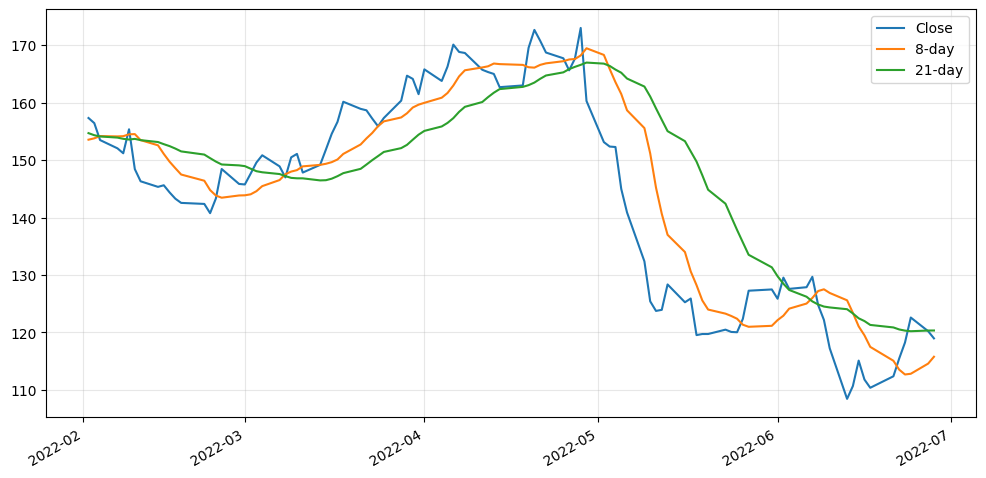

In [ ]:
# the 22:123 shows the first 100 days of trading
pld.iloc[22:123,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

In [ ]:
pld['logClose'] = np.log(pld['Close']) # price will always be positive, so this operation is well-defined
pld['return'] = pld['logClose'].diff() # the difference will be positive or negative
pld.head()

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  168.080002  169.929993  167.589996  168.360001  164.189997   
2022-01-03   23  168.460007  169.029999  162.039993  164.899994  165.061247   
2022-01-04   24  164.169998  165.330002  160.100006  161.000000  165.574997   
2022-01-05   25  161.000000  161.330002  157.369995  157.649994  165.417498   
2022-01-06   26  157.429993  157.449997  155.350006  156.570007  164.904997   

                21-day  logClose    return  
2021-12-31  160.620475  5.126105       NaN  
2022-01-03  161.413808  5.105339 -0.020765  
2022-01-04  161.912856  5.081404 -0.023935  
2022-01-05  162.214760  5.060377 -0.021027  
2022-01-06  162.267141  5.053503 -0.006874

In [ ]:
##make first entry == 0
pld.loc["2021-12-31",'return'] = 0.0
pld.head()

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  168.080002  169.929993  167.589996  168.360001  164.189997   
2022-01-03   23  168.460007  169.029999  162.039993  164.899994  165.061247   
2022-01-04   24  164.169998  165.330002  160.100006  161.000000  165.574997   
2022-01-05   25  161.000000  161.330002  157.369995  157.649994  165.417498   
2022-01-06   26  157.429993  157.449997  155.350006  156.570007  164.904997   

                21-day  logClose    return  
2021-12-31  160.620475  5.126105  0.000000  
2022-01-03  161.413808  5.105339 -0.020765  
2022-01-04  161.912856  5.081404 -0.023935  
2022-01-05  162.214760  5.060377 -0.021027  
2022-01-06  162.267141  5.053503 -0.006874

In [ ]:
np.exp(np.sum(pld['return'])) -1

-0.3304228857908278

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
pld['invested'] = np.where(pld['8-day'] > pld['21-day'], 1, 0)
pld.head()

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  168.080002  169.929993  167.589996  168.360001  164.189997   
2022-01-03   23  168.460007  169.029999  162.039993  164.899994  165.061247   
2022-01-04   24  164.169998  165.330002  160.100006  161.000000  165.574997   
2022-01-05   25  161.000000  161.330002  157.369995  157.649994  165.417498   
2022-01-06   26  157.429993  157.449997  155.350006  156.570007  164.904997   

                21-day  logClose    return  invested  
2021-12-31  160.620475  5.126105  0.000000         1  
2022-01-03  161.413808  5.105339 -0.020765         1  
2022-01-04  161.912856  5.081404 -0.023935         1  
2022-01-05  162.214760  5.060377 -0.021027         1  
2022-01-06  162.267141  5.053503 -0.006874         1

In [ ]:
print(pld['invested'].value_counts())

1    137
0    115
Name: invested, dtype: int64


In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
pld['signal'] = pld['invested'].diff()
print(pld['signal'].value_counts())

 0.0    240
-1.0      6
 1.0      5
Name: signal, dtype: int64


In [ ]:
pld.head() # check your work

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  168.080002  169.929993  167.589996  168.360001  164.189997   
2022-01-03   23  168.460007  169.029999  162.039993  164.899994  165.061247   
2022-01-04   24  164.169998  165.330002  160.100006  161.000000  165.574997   
2022-01-05   25  161.000000  161.330002  157.369995  157.649994  165.417498   
2022-01-06   26  157.429993  157.449997  155.350006  156.570007  164.904997   

                21-day  logClose    return  invested  signal  
2021-12-31  160.620475  5.126105  0.000000         1     NaN  
2022-01-03  161.413808  5.105339 -0.020765         1     0.0  
2022-01-04  161.912856  5.081404 -0.023935         1     0.0  
2022-01-05  162.214760  5.060377 -0.021027         1     0.0  
2022-01-06  162.267141  5.053503 -0.006874         1     0.0

In [ ]:
#Ugly first line again. Let's set signal to 1, i.e., we want to buy on the first trading day:

#Again, not positive about these dates

pld.loc["2021-12-31",'signal'] = 1.0
pld.head()

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  168.080002  169.929993  167.589996  168.360001  164.189997   
2022-01-03   23  168.460007  169.029999  162.039993  164.899994  165.061247   
2022-01-04   24  164.169998  165.330002  160.100006  161.000000  165.574997   
2022-01-05   25  161.000000  161.330002  157.369995  157.649994  165.417498   
2022-01-06   26  157.429993  157.449997  155.350006  156.570007  164.904997   

                21-day  logClose    return  invested  signal  
2021-12-31  160.620475  5.126105  0.000000         1     1.0  
2022-01-03  161.413808  5.105339 -0.020765         1     0.0  
2022-01-04  161.912856  5.081404 -0.023935         1     0.0  
2022-01-05  162.214760  5.060377 -0.021027         1     0.0  
2022-01-06  162.267141  5.053503 -0.006874         1     0.0

In [ ]:
## Let's see the trading days

pld[pld['signal'].isin([1,-1])]

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  168.080002  169.929993  167.589996  168.360001  164.189997   
2022-01-11   29  153.240005  153.919998  151.399994  152.990005  160.400000   
2022-02-04   46  155.029999  155.779999  152.589996  153.490005  154.183754   
2022-02-11   51  149.350006  150.070007  145.169998  146.309998  153.477501   
2022-03-08   67  148.309998  150.300003  146.740005  146.990005  147.545000   
2022-05-03  106  154.139999  154.919998  150.729996  152.360001  165.871248   
2022-06-07  130  127.120003  129.860001  125.790001  129.679993  125.997500   
2022-06-15  136  111.250000  116.870003  110.690002  115.089996  121.049999   
2022-07-06  149  121.650002  123.559998  120.779999  121.459999  119.677499   
2022-08-29  187  127.480003  128.229996  126.720001  127.290001  132.468752   
2022-10-25  227  103.970001  108.629997  103.959999  108.330002  103.006250   
2022-12-23  269  112.580002  114.129997  112.139999  113.620003  115.619999   

                21-day  logClose    return  invested  signal  
2021-12-31  160.620475  5.126105  0.000000         1     1.0  
2022-01-11  161.649046  5.030373 -0.000196         0    -1.0  
2022-02-04  154.117144  5.033635 -0.019037         1     1.0  
2022-02-11  153.477620  4.985728 -0.014386         0    -1.0  
2022-03-08  147.214285  4.990365 -0.012978         1     1.0  
2022-05-03  166.400475  5.026246 -0.005041         0    -1.0  
2022-06-07  125.397144  4.865070  0.014056         1     1.0  
2022-06-15  122.457619  4.745714  0.039252         0    -1.0  
2022-07-06  118.613332  4.799585  0.000247         1     1.0  
2022-08-29  132.905239  4.846468 -0.008293         0    -1.0  
2022-10-25  102.630476  4.685182  0.046867         1     1.0  
2022-12-23  115.751904  4.732860  0.003085         0    -1.0

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!
pld['system_return'] = pld['invested'] * pld['return']
pld.head()

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  168.080002  169.929993  167.589996  168.360001  164.189997   
2022-01-03   23  168.460007  169.029999  162.039993  164.899994  165.061247   
2022-01-04   24  164.169998  165.330002  160.100006  161.000000  165.574997   
2022-01-05   25  161.000000  161.330002  157.369995  157.649994  165.417498   
2022-01-06   26  157.429993  157.449997  155.350006  156.570007  164.904997   

                21-day  logClose    return  invested  signal  system_return  
2021-12-31  160.620475  5.126105  0.000000         1     1.0       0.000000  
2022-01-03  161.413808  5.105339 -0.020765         1     0.0      -0.020765  
2022-01-04  161.912856  5.081404 -0.023935         1     0.0      -0.023935  
2022-01-05  162.214760  5.060377 -0.021027         1     0.0      -0.021027  
2022-01-06  162.267141  5.053503 -0.006874         1     0.0      -0.006874

In [ ]:
#What was the return of this trategy?

np.exp(np.sum(pld['system_return'])) -1

-0.11114314062381947

In [ ]:
#Let's recall the returns of the buy&hold strategy:

np.exp(np.sum(pld['return'])) -1

-0.3304228857908278

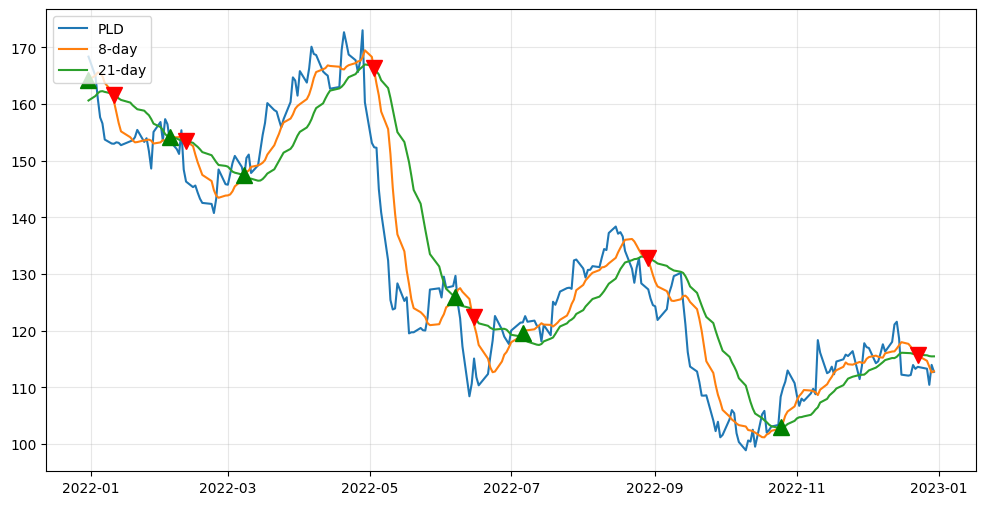

In [ ]:
##Plot trades on time series for the last year**

# show the last year
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(pld.iloc[-252:]['Close'], label = 'PLD') # actual value
plt.plot(pld.iloc[-252:]['8-day'], label = '8-day') # 8-day average
plt.plot(pld.iloc[-252:]['21-day'], label = '21-day') # 21-day average
plt.plot(pld[-252:].loc[pld.signal == 1].index, pld[-252:]['8-day'][pld.signal == 1], '^',
         color = 'g', markersize = 12)
plt.plot(pld[-252:].loc[pld.signal == -1].index, pld[-252:]['21-day'][pld.signal == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

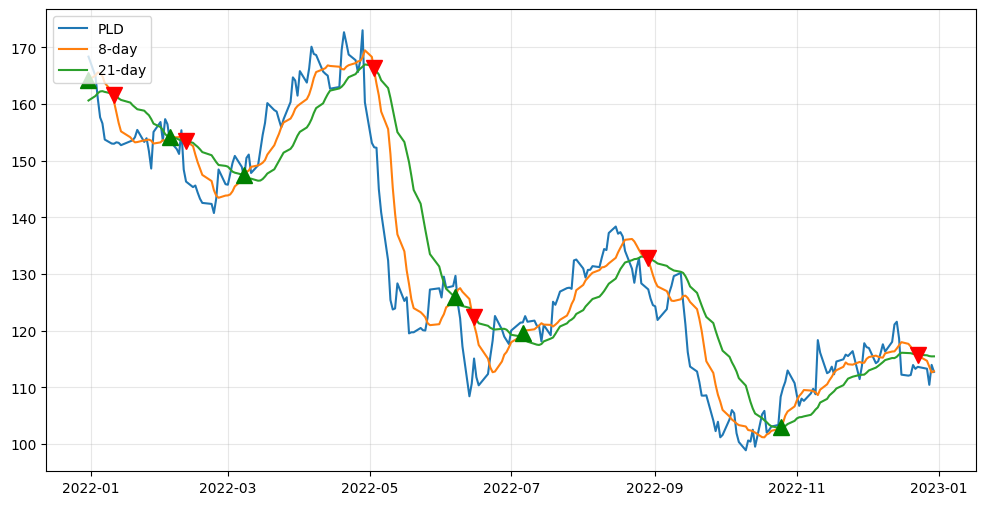

In [ ]:
###Plot trades on time series for the entire time horizon


# show all time
# if you squint closely you should see 34 red triangles
# and 34 green triangles!
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(pld.iloc[:]['Close'], label = 'PLD')
plt.plot(pld.iloc[:]['8-day'], label = '8-day')
plt.plot(pld.iloc[:]['21-day'], label = '21-day')
plt.plot(pld[:].loc[pld.signal == 1].index, pld[:]['8-day'][pld.signal == 1], '^',
         color = 'g', markersize = 12)
plt.plot(pld[:].loc[pld.signal == -1].index, pld[:]['21-day'][pld.signal == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

In [ ]:
####Organize the Dataframe

#We've calculated a lot of intermediate columns of data. Let's rearrange the order of the columns so that it's easier for us to tell a story.

# print the column names so that we can copy/paste
pld.columns

Index(['Day', 'Open', 'High', 'Low', 'Close', '8-day', '21-day', 'logClose',
       'return', 'invested', 'signal', 'system_return'],
      dtype='object')

In [ ]:
#reorder the columns by name
# make a copy of gld with a new order of columns
pld = pld[['Day', 'Open', 'High', 'Low', 'Close',
           '8-day', '21-day',
           'invested', 'logClose',
          'return',
          'signal',  'system_return']]

In [ ]:
##Another convenient command: allowing Colab to display all the rows of your DataFrame

pd.set_option("display.max_rows", None)
pld

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  168.080002  169.929993  167.589996  168.360001  164.189997   
2022-01-03   23  168.460007  169.029999  162.039993  164.899994  165.061247   
2022-01-04   24  164.169998  165.330002  160.100006  161.000000  165.574997   
2022-01-05   25  161.000000  161.330002  157.369995  157.649994  165.417498   
2022-01-06   26  157.429993  157.449997  155.350006  156.570007  164.904997   
2022-01-07   27  156.500000  156.839996  153.429993  153.729996  163.739998   
2022-01-10   28  152.380005  153.330002  149.820007  153.020004  162.232498   
2022-01-11   29  153.240005  153.919998  151.399994  152.990005  160.400000   
2022-01-12   30  153.000000  155.000000  153.000000  153.240005  158.527500   
2022-01-13   31  153.339996  154.389999  152.899994  153.149994  156.637501   
2022-01-14   32  152.750000  153.160004  150.610001  152.740005  155.168751   
2022-01-18   33  151.570007  153.610001  150.500000  153.429993  154.136251   
2022-01-19   34  155.750000  159.210007  153.509995  153.589996  153.608751   
2022-01-20   35  151.990005  157.000000  151.619995  154.139999  153.236250   
2022-01-21   36  157.149994  157.899994  154.770004  155.429993  153.287500   
2022-01-24   37  155.419998  155.419998  149.130005  153.309998  153.588749   
2022-01-25   38  151.009995  154.710007  150.779999  153.960007  153.628748   
2022-01-26   39  154.160004  156.720001  150.720001  151.720001  153.718748   
2022-01-27   40  151.850006  154.149994  147.589996  148.610001  153.539999   
2022-01-28   41  149.320007  155.110001  146.389999  155.070007  153.023748   
2022-01-31   42  155.210007  157.270004  154.429993  156.820007  153.228750   
2022-02-01   43  157.410004  157.500000  152.330002  153.520004  153.632502   
2022-02-02   44  154.720001  157.960007  154.720001  157.330002  153.555002   
2022-02-03   45  156.059998  157.779999  155.779999  156.440002  153.792503   
2022-02-04   46  155.029999  155.779999  152.589996  153.490005  154.183754   
2022-02-07   47  153.259995  154.389999  151.639999  152.050003  154.125004   
2022-02-08   48  152.589996  152.830002  150.419998  151.190002  154.166254   
2022-02-09   49  152.699997  155.570007  152.699997  155.369995  154.488754   
2022-02-10   50  152.580002  154.059998  147.289993  148.429993  154.526253   
2022-02-11   51  149.350006  150.070007  145.169998  146.309998  153.477501   
2022-02-14   52  146.039993  148.070007  144.380005  145.339996  152.576250   
2022-02-15   53  146.550003  147.559998  145.220001  145.619995  151.077499   
2022-02-16   54  146.130005  146.940002  142.740005  144.380005  149.724998   
2022-02-17   55  143.250000  144.050003  142.199997  143.279999  148.586248   
2022-02-18   56  143.110001  144.240005  141.949997  142.550003  147.489998   
2022-02-22   57  143.059998  144.440002  141.639999  142.369995  146.409998   
2022-02-23   58  143.179993  144.149994  140.580002  140.759995  144.784998   
2022-02-24   59  138.470001  143.679993  137.899994  143.330002  143.826248   
2022-02-25   60  143.850006  148.509995  143.660004  148.449997  143.453749   
2022-02-28   61  146.490005  147.399994  143.889999  145.850006  143.842499   
2022-03-01   62  146.729996  147.690002  145.070007  145.759995  143.871250   
2022-03-02   63  146.259995  148.529999  145.720001  147.639999  144.043749   
2022-03-03   64  148.860001  150.479996  147.300003  149.580002  144.588749   
2022-03-04   65  148.029999  150.960007  147.240005  150.839996  145.467499   
2022-03-07   66  150.589996  151.240005  148.539993  148.910004  146.526249   
2022-03-08   67  148.309998  150.300003  146.740005  146.990005  147.545000   
2022-03-09   68  149.179993  152.000000  148.320007  150.479996  148.002501   
2022-03-10   69  148.990005  151.539993  147.779999  151.080002  148.256250   
2022-03-11   70  152.220001  152.550003  147.679993  147.830002  148.910000   
2022-03-14   71  148.399994  150.300003  147.600006  149.16999

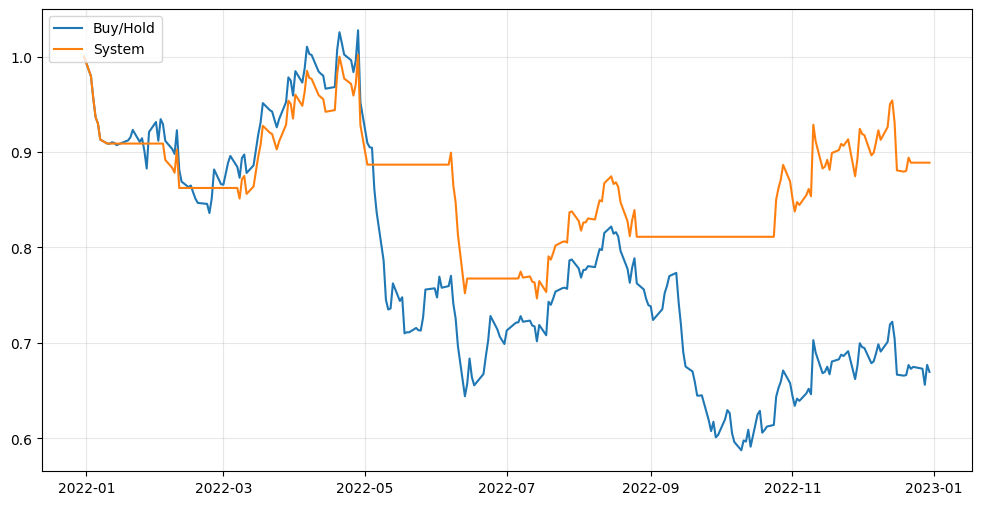

In [ ]:
plt.plot(np.exp(pld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(pld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

In [ ]:
pld["^PLD"] = np.exp(pld["return"]).cumprod() * 67000

In [ ]:
pld_results = pld.loc[['2022-01-03', '2022-02-1', '2022-03-01', '2022-04-01', '2022-05-03', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-03', '2022-11-01', '2022-12-01']]

In [ ]:
pld_results

Day        Open        High         Low       Close       8-day  \
2022-01-03   23  168.460007  169.029999  162.039993  164.899994  165.061247   
2022-02-01   43  157.410004  157.500000  152.330002  153.520004  153.632502   
2022-03-01   62  146.729996  147.690002  145.070007  145.759995  143.871250   
2022-04-01   85  162.100006  166.220001  160.610001  165.800003  159.973749   
2022-05-03  106  154.139999  154.919998  150.729996  152.360001  165.871248   
2022-06-01  126  128.350006  129.100006  123.830002  125.860001  122.141252   
2022-07-01  147  117.889999  120.379997  117.250000  120.029999  117.972499   
2022-08-01  167  132.210007  132.589996  130.759995  130.979996  128.074999   
2022-09-01  190  123.410004  124.430000  121.510002  124.300003  128.637502   
2022-10-03  211  103.500000  106.690002  102.389999  104.360001  104.856251   
2022-11-01  232  112.199997  112.250000  108.269997  108.550003  107.731252   
2022-12-01  253  119.050003  119.489998  115.739998  117.099998  115.033749   

                21-day  invested  logClose    return  signal  system_return  \
2022-01-03  161.413808         1  5.105339 -0.020765     0.0      -0.020765   
2022-02-01  155.401429         0  5.033831 -0.021268     0.0      -0.000000   
2022-03-01  148.950001         0  4.981961 -0.000617     0.0      -0.000000   
2022-04-01  155.086667         1  5.110782  0.026401     0.0       0.026401   
2022-05-03  166.400475         0  5.026246 -0.005041    -1.0      -0.000000   
2022-06-01  129.773334         0  4.835170 -0.012789     0.0      -0.000000   
2022-07-01  119.277142         0  4.787742  0.020028     0.0       0.000000   
2022-08-01  123.629524         1  4.875045 -0.011991     0.0      -0.011991   
2022-09-01  132.169049         0  4.822698 -0.001688     0.0      -0.000000   
2022-10-03  115.380477         0  4.647846  0.026803     0.0       0.000000   
2022-11-01  104.524762         1  4.687211 -0.020064     0.0      -0.020064   
2022-12-01  112.587619         1  4.763028 -0.005875     0.0      -0.005875   

                    ^PLD  
2022-01-03  65623.066946  
2022-02-01  61094.323170  
2022-03-01  58006.174843  
2022-04-01  65981.231671  
2022-05-03  60632.691874  
2022-06-01  50086.837790  
2022-07-01  47766.749163  
2022-08-01  52124.374447  
2022-09-01  49466.026219  
2022-10-03  41530.767496  
2022-11-01  43198.207283  
2022-12-01  46600.735741

In [ ]:
pld_results.loc[:,['^PLD']]

^PLD
2022-01-03  65623.066946
2022-02-01  61094.323170
2022-03-01  58006.174843
2022-04-01  65981.231671
2022-05-03  60632.691874
2022-06-01  50086.837790
2022-07-01  47766.749163
2022-08-01  52124.374447
2022-09-01  49466.026219
2022-10-03  41530.767496
2022-11-01  43198.207283
2022-12-01  46600.735741

### WMT

In [ ]:
ticker = "WMT"
wmt = si.get_data(ticker,start_date = '12/01/2021',end_date='01/01/2023',interval='1d')
day = np.arange(1, len(wmt) + 1) #generate list of trading days
wmt['Day'] = day
# Dropping columns I don't want to use
wmt.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
wmt = wmt[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
wmt.columns = ['Day', 'Open', 'High', 'Low', 'Close']
wmt.head()

Day        Open        High         Low       Close
2021-12-01    1  140.509995  140.720001  137.039993  137.139999
2021-12-02    2  137.630005  138.440002  135.240005  135.470001
2021-12-03    3  135.860001  137.880005  135.289993  137.509995
2021-12-06    4  137.559998  139.360001  137.100006  139.000000
2021-12-07    5  139.600006  139.830002  138.089996  138.550003

In [ ]:
wmt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2021-12-01 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     273 non-null    int64  
 1   Open    273 non-null    float64
 2   High    273 non-null    float64
 3   Low     273 non-null    float64
 4   Close   273 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 12.8 KB


In [ ]:
wmt.describe()

Day        Open        High         Low       Close
count  273.000000  273.000000  273.000000  273.000000  273.000000
mean   137.000000  138.317216  139.772015  137.080183  138.420183
std     78.952517    9.699830    9.596799    9.641600    9.611093
min      1.000000  118.300003  120.000000  117.269997  118.290001
25%     69.000000  132.229996  133.570007  130.589996  132.220001
50%    137.000000  138.570007  140.070007  137.509995  138.880005
75%    205.000000  144.320007  145.360001  143.009995  144.649994
max    273.000000  160.250000  160.770004  159.070007  159.869995

In [ ]:
wmt['8-day'] = wmt['Close'].rolling(8).mean().shift()
wmt['21-day'] = wmt['Close'].rolling(21).mean().shift()
wmt.dropna(inplace=True)
wmt.head(n=10)

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  143.199997  145.039993  142.919998  144.690002  140.941250   
2022-01-03   23  144.000000  144.789993  143.009995  144.649994  141.627501   
2022-01-04   24  144.039993  145.139999  141.759995  142.000000  142.256250   
2022-01-05   25  142.850006  145.949997  142.740005  143.919998  142.531250   
2022-01-06   26  143.619995  144.639999  142.399994  143.520004  143.084999   
2022-01-07   27  143.500000  145.360001  142.960007  144.889999  143.430000   
2022-01-10   28  145.440002  145.589996  143.119995  144.610001  143.693750   
2022-01-11   29  144.210007  144.619995  143.179993  144.199997  143.931250   
2022-01-12   30  143.679993  143.960007  143.000000  143.440002  144.059999   
2022-01-13   31  143.429993  145.679993  143.110001  145.470001  143.903749   

                21-day  
2021-12-31  140.392857  
2022-01-03  140.752381  
2022-01-04  141.189524  
2022-01-05  141.403333  
2022-01-06  141.637619  
2022-01-07  141.874286  
2022-01-10  142.242857  
2022-01-11  142.533810  
2022-01-12  142.684762  
2022-01-13  142.678571

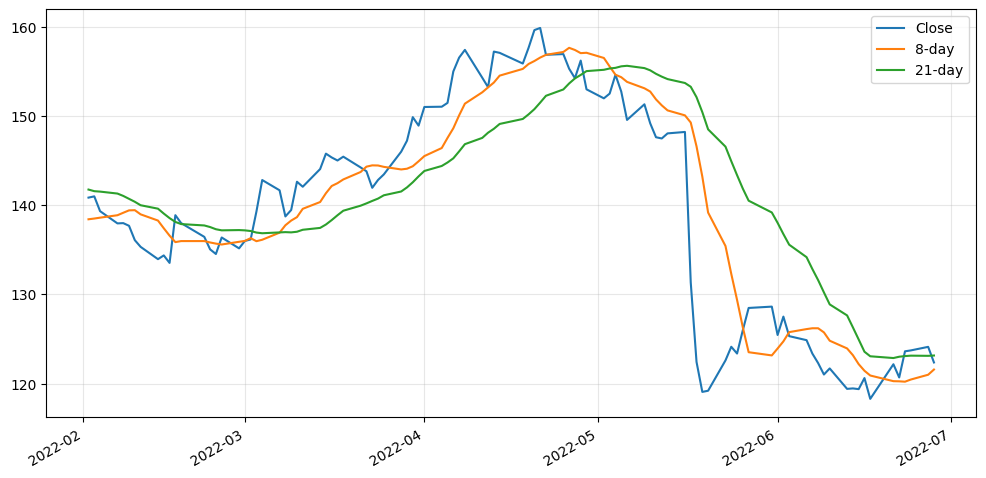

In [ ]:
# the 22:123 shows the first 100 days of trading
wmt.iloc[22:123,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

In [ ]:
wmt['logClose'] = np.log(wmt['Close']) # price will always be positive, so this operation is well-defined
wmt['return'] = wmt['logClose'].diff() # the difference will be positive or negative
wmt.head()

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  143.199997  145.039993  142.919998  144.690002  140.941250   
2022-01-03   23  144.000000  144.789993  143.009995  144.649994  141.627501   
2022-01-04   24  144.039993  145.139999  141.759995  142.000000  142.256250   
2022-01-05   25  142.850006  145.949997  142.740005  143.919998  142.531250   
2022-01-06   26  143.619995  144.639999  142.399994  143.520004  143.084999   

                21-day  logClose    return  
2021-12-31  140.392857  4.974594       NaN  
2022-01-03  140.752381  4.974317 -0.000277  
2022-01-04  141.189524  4.955827 -0.018490  
2022-01-05  141.403333  4.969258  0.013431  
2022-01-06  141.637619  4.966474 -0.002783

In [ ]:
 #Not  sure about this date when translated into our model


wmt.loc["2021-12-31",'return'] = 0.0
wmt.head()

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  143.199997  145.039993  142.919998  144.690002  140.941250   
2022-01-03   23  144.000000  144.789993  143.009995  144.649994  141.627501   
2022-01-04   24  144.039993  145.139999  141.759995  142.000000  142.256250   
2022-01-05   25  142.850006  145.949997  142.740005  143.919998  142.531250   
2022-01-06   26  143.619995  144.639999  142.399994  143.520004  143.084999   

                21-day  logClose    return  
2021-12-31  140.392857  4.974594  0.000000  
2022-01-03  140.752381  4.974317 -0.000277  
2022-01-04  141.189524  4.955827 -0.018490  
2022-01-05  141.403333  4.969258  0.013431  
2022-01-06  141.637619  4.966474 -0.002783

In [ ]:
np.exp(np.sum(wmt['return'])) -1

-0.02004291316843232

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
wmt['invested'] = np.where(wmt['8-day'] > wmt['21-day'], 1, 0)
wmt.head()

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  143.199997  145.039993  142.919998  144.690002  140.941250   
2022-01-03   23  144.000000  144.789993  143.009995  144.649994  141.627501   
2022-01-04   24  144.039993  145.139999  141.759995  142.000000  142.256250   
2022-01-05   25  142.850006  145.949997  142.740005  143.919998  142.531250   
2022-01-06   26  143.619995  144.639999  142.399994  143.520004  143.084999   

                21-day  logClose    return  invested  
2021-12-31  140.392857  4.974594  0.000000         1  
2022-01-03  140.752381  4.974317 -0.000277         1  
2022-01-04  141.189524  4.955827 -0.018490         1  
2022-01-05  141.403333  4.969258  0.013431         1  
2022-01-06  141.637619  4.966474 -0.002783         1

In [ ]:
print(wmt['invested'].value_counts())

1    143
0    109
Name: invested, dtype: int64


In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
wmt['signal'] = wmt['invested'].diff()
print(wmt['signal'].value_counts())

 0.0    240
-1.0      6
 1.0      5
Name: signal, dtype: int64


In [ ]:
wmt.head() # check your work

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  143.199997  145.039993  142.919998  144.690002  140.941250   
2022-01-03   23  144.000000  144.789993  143.009995  144.649994  141.627501   
2022-01-04   24  144.039993  145.139999  141.759995  142.000000  142.256250   
2022-01-05   25  142.850006  145.949997  142.740005  143.919998  142.531250   
2022-01-06   26  143.619995  144.639999  142.399994  143.520004  143.084999   

                21-day  logClose    return  invested  signal  
2021-12-31  140.392857  4.974594  0.000000         1     NaN  
2022-01-03  140.752381  4.974317 -0.000277         1     0.0  
2022-01-04  141.189524  4.955827 -0.018490         1     0.0  
2022-01-05  141.403333  4.969258  0.013431         1     0.0  
2022-01-06  141.637619  4.966474 -0.002783         1     0.0

In [ ]:
#Ugly first line again. Let's set signal to 1, i.e., we want to buy on the first trading day:

#Again, not positive about these dates

wmt.loc["2021-12-31",'signal'] = 1.0
wmt.head()

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  143.199997  145.039993  142.919998  144.690002  140.941250   
2022-01-03   23  144.000000  144.789993  143.009995  144.649994  141.627501   
2022-01-04   24  144.039993  145.139999  141.759995  142.000000  142.256250   
2022-01-05   25  142.850006  145.949997  142.740005  143.919998  142.531250   
2022-01-06   26  143.619995  144.639999  142.399994  143.520004  143.084999   

                21-day  logClose    return  invested  signal  
2021-12-31  140.392857  4.974594  0.000000         1     1.0  
2022-01-03  140.752381  4.974317 -0.000277         1     0.0  
2022-01-04  141.189524  4.955827 -0.018490         1     0.0  
2022-01-05  141.403333  4.969258  0.013431         1     0.0  
2022-01-06  141.637619  4.966474 -0.002783         1     0.0

In [ ]:
## Let's see the trading days

wmt[wmt['signal'].isin([1,-1])]

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  143.199997  145.039993  142.919998  144.690002  140.941250   
2022-01-25   38  139.990005  140.369995  136.809998  137.149994  142.755001   
2022-03-08   67  141.500000  142.460007  138.580002  138.740005  137.750002   
2022-05-04  107  152.029999  154.820007  151.509995  154.619995  154.628752   
2022-07-01  147  121.940002  122.919998  121.160004  122.629997  122.523751   
2022-08-12  176  130.000000  132.839996  129.820007  132.220001  128.846250   
2022-08-17  179  138.570007  142.720001  138.399994  139.520004  130.776251   
2022-09-07  193  133.059998  135.970001  132.740005  135.740005  133.150000   
2022-09-14  198  135.630005  136.529999  134.100006  134.919998  135.264999   
2022-09-23  205  132.869995  133.179993  128.770004  130.059998  134.105001   
2022-10-21  225  134.809998  137.410004  134.000000  136.800003  132.488747   
2022-12-14  262  147.089996  148.529999  145.960007  146.669998  149.183750   

                21-day  logClose    return  invested  signal  
2021-12-31  140.392857  4.974594  0.000000         1     1.0  
2022-01-25  143.020477  4.921075 -0.021995         0    -1.0  
2022-03-08  136.980954  4.932602 -0.020899         1     1.0  
2022-05-04  155.396667  5.040970  0.013740         0    -1.0  
2022-07-01  122.328096  4.809172  0.008599         1     1.0  
2022-08-12  129.348572  4.884467  0.018318         0    -1.0  
2022-08-17  130.230953  4.938208  0.001076         1     1.0  
2022-09-07  133.522858  4.910741  0.025367         0    -1.0  
2022-09-14  135.172382  4.904682 -0.002221         1     1.0  
2022-09-23  134.290001  4.867996 -0.025281         0    -1.0  
2022-10-21  131.901903  4.918520  0.020009         1     1.0  
2022-12-14  149.839523  4.988185 -0.005575         0    -1.0

In [ ]:
wmt

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  143.199997  145.039993  142.919998  144.690002  140.941250   
2022-01-03   23  144.000000  144.789993  143.009995  144.649994  141.627501   
2022-01-04   24  144.039993  145.139999  141.759995  142.000000  142.256250   
2022-01-05   25  142.850006  145.949997  142.740005  143.919998  142.531250   
2022-01-06   26  143.619995  144.639999  142.399994  143.520004  143.084999   
2022-01-07   27  143.500000  145.360001  142.960007  144.889999  143.430000   
2022-01-10   28  145.440002  145.589996  143.119995  144.610001  143.693750   
2022-01-11   29  144.210007  144.619995  143.179993  144.199997  143.931250   
2022-01-12   30  143.679993  143.960007  143.000000  143.440002  144.059999   
2022-01-13   31  143.429993  145.679993  143.110001  145.470001  143.903749   
2022-01-14   32  144.220001  146.630005  144.220001  145.059998  144.006250   
2022-01-18   33  144.410004  144.699997  142.130005  142.520004  144.388750   
2022-01-19   34  142.539993  144.990005  141.919998  143.940002  144.213751   
2022-01-20   35  142.350006  144.460007  141.070007  141.220001  144.266251   
2022-01-21   36  141.220001  142.259995  140.059998  140.190002  143.807501   
2022-01-24   37  139.070007  140.529999  137.309998  140.199997  143.255001   
2022-01-25   38  139.990005  140.369995  136.809998  137.149994  142.755001   
2022-01-26   39  137.339996  138.789993  135.160004  135.750000  141.968750   
2022-01-27   40  136.919998  139.080002  135.369995  135.839996  140.753750   
2022-01-28   41  136.000000  137.570007  133.949997  137.520004  139.601250   
2022-01-31   42  137.089996  140.039993  136.699997  139.809998  138.976250   
2022-02-01   43  139.210007  141.149994  138.990005  140.910004  138.459999   
2022-02-02   44  141.000000  141.639999  140.149994  140.850006  138.421249   
2022-02-03   45  140.259995  141.990005  139.770004  140.990005  138.503750   
2022-02-04   46  140.889999  141.000000  138.350006  139.330002  138.602501   
2022-02-07   47  140.059998  140.070007  137.610001  137.960007  138.875002   
2022-02-08   48  138.320007  139.240005  137.509995  137.990005  139.151253   
2022-02-09   49  138.500000  138.789993  137.470001  137.690002  139.420004   
2022-02-10   50  136.550003  137.009995  135.460007  136.080002  139.441254   
2022-02-11   51  136.820007  137.179993  134.169998  135.330002  138.975004   
2022-02-14   52  135.330002  135.960007  132.710007  133.949997  138.277504   
2022-02-15   53  134.740005  135.669998  133.789993  134.369995  137.415003   
2022-02-16   54  134.330002  134.880005  132.699997  133.529999  136.587502   
2022-02-17   55  134.000000  139.470001  133.779999  138.880005  135.862501   
2022-02-18   56  138.100006  139.589996  137.160004  137.990005  135.977501   
2022-02-22   57  137.770004  138.240005  135.940002  136.449997  135.977501   
2022-02-23   58  136.860001  137.190002  134.839996  135.050003  135.822500   
2022-02-24   59  133.910004  135.009995  132.009995  134.529999  135.693750   
2022-02-25   60  134.809998  136.779999  134.089996  136.380005  135.593750   
2022-02-28   61  135.000000  136.070007  133.770004  135.160004  135.897501   
2022-03-01   62  135.869995  137.889999  135.020004  135.990005  135.996252   
2022-03-02   63  135.660004  136.830002  135.179993  136.160004  136.303753   
2022-03-03   64  137.289993  140.470001  136.550003  139.289993  135.963753   
2022-03-04   65  137.809998  142.940002  137.589996  142.820007  136.126251   
2022-03-07   66  141.300003  143.630005  140.449997  141.669998  136.922503   
2022-03-08   67  141.500000  142.460007  138.580002  138.740005  137.750002   
2022-03-09   68  140.000000  140.240005  138.139999  139.460007  138.276253   
2022-03-10   69  139.490005  143.000000  139.009995  142.630005  138.661253   
2022-03-11   70  142.300003  144.050003  141.880005  142.070007  139.595003   
2022-03-14   71  142.020004  144.850006  141.990005  144.05000

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!
wmt['system_return'] = wmt['invested'] * wmt['return']
wmt.head()

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  143.199997  145.039993  142.919998  144.690002  140.941250   
2022-01-03   23  144.000000  144.789993  143.009995  144.649994  141.627501   
2022-01-04   24  144.039993  145.139999  141.759995  142.000000  142.256250   
2022-01-05   25  142.850006  145.949997  142.740005  143.919998  142.531250   
2022-01-06   26  143.619995  144.639999  142.399994  143.520004  143.084999   

                21-day  logClose    return  invested  signal  system_return  
2021-12-31  140.392857  4.974594  0.000000         1     1.0       0.000000  
2022-01-03  140.752381  4.974317 -0.000277         1     0.0      -0.000277  
2022-01-04  141.189524  4.955827 -0.018490         1     0.0      -0.018490  
2022-01-05  141.403333  4.969258  0.013431         1     0.0       0.013431  
2022-01-06  141.637619  4.966474 -0.002783         1     0.0      -0.002783

In [ ]:
#What was the return of this trategy?

np.exp(np.sum(wmt['system_return'])) -1

0.1475715223715821

In [ ]:
#Let's recall the returns of the buy&hold strategy:

np.exp(np.sum(wmt['return'])) -1

-0.02004291316843232

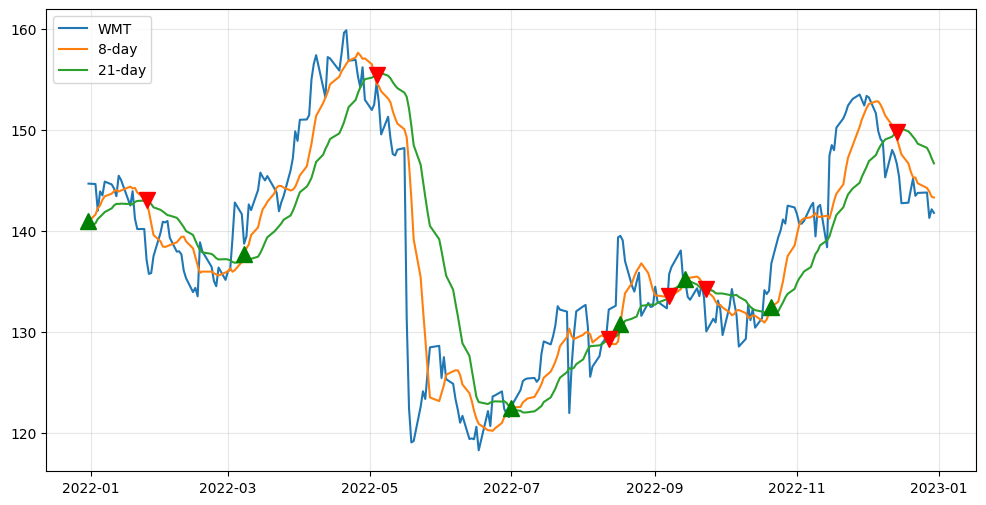

In [ ]:
##Plot trades on time series for the last year**

# show the last year
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(wmt.iloc[-252:]['Close'], label = 'WMT') # actual value
plt.plot(wmt.iloc[-252:]['8-day'], label = '8-day') # 8-day average
plt.plot(wmt.iloc[-252:]['21-day'], label = '21-day') # 21-day average
plt.plot(wmt[-252:].loc[wmt.signal == 1].index, wmt[-252:]['8-day'][wmt.signal == 1], '^',
         color = 'g', markersize = 12)
plt.plot(wmt[-252:].loc[wmt.signal == -1].index, wmt[-252:]['21-day'][wmt.signal == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

In [ ]:
####Organize the Dataframe

#We've calculated a lot of intermediate columns of data. Let's rearrange the order of the columns so that it's easier for us to tell a story.

# print the column names so that we can copy/paste
pld.columns

Index(['Day', 'Open', 'High', 'Low', 'Close', '8-day', '21-day', 'invested',
       'logClose', 'return', 'signal', 'system_return', '^PLD'],
      dtype='object')

In [ ]:
# reorder the columns by name
# make a copy of gld with a new order of columns
wmt = wmt[['Day', 'Open', 'High', 'Low', 'Close',
           '8-day', '21-day',
           'invested', 'logClose',
          'return',
          'signal',  'system_return']]

In [ ]:
#allowing Colab to display all the rows of your DataFrame

pd.set_option("display.max_rows", None)
wmt

Day        Open        High         Low       Close       8-day  \
2021-12-31   22  143.199997  145.039993  142.919998  144.690002  140.941250   
2022-01-03   23  144.000000  144.789993  143.009995  144.649994  141.627501   
2022-01-04   24  144.039993  145.139999  141.759995  142.000000  142.256250   
2022-01-05   25  142.850006  145.949997  142.740005  143.919998  142.531250   
2022-01-06   26  143.619995  144.639999  142.399994  143.520004  143.084999   
2022-01-07   27  143.500000  145.360001  142.960007  144.889999  143.430000   
2022-01-10   28  145.440002  145.589996  143.119995  144.610001  143.693750   
2022-01-11   29  144.210007  144.619995  143.179993  144.199997  143.931250   
2022-01-12   30  143.679993  143.960007  143.000000  143.440002  144.059999   
2022-01-13   31  143.429993  145.679993  143.110001  145.470001  143.903749   
2022-01-14   32  144.220001  146.630005  144.220001  145.059998  144.006250   
2022-01-18   33  144.410004  144.699997  142.130005  142.520004  144.388750   
2022-01-19   34  142.539993  144.990005  141.919998  143.940002  144.213751   
2022-01-20   35  142.350006  144.460007  141.070007  141.220001  144.266251   
2022-01-21   36  141.220001  142.259995  140.059998  140.190002  143.807501   
2022-01-24   37  139.070007  140.529999  137.309998  140.199997  143.255001   
2022-01-25   38  139.990005  140.369995  136.809998  137.149994  142.755001   
2022-01-26   39  137.339996  138.789993  135.160004  135.750000  141.968750   
2022-01-27   40  136.919998  139.080002  135.369995  135.839996  140.753750   
2022-01-28   41  136.000000  137.570007  133.949997  137.520004  139.601250   
2022-01-31   42  137.089996  140.039993  136.699997  139.809998  138.976250   
2022-02-01   43  139.210007  141.149994  138.990005  140.910004  138.459999   
2022-02-02   44  141.000000  141.639999  140.149994  140.850006  138.421249   
2022-02-03   45  140.259995  141.990005  139.770004  140.990005  138.503750   
2022-02-04   46  140.889999  141.000000  138.350006  139.330002  138.602501   
2022-02-07   47  140.059998  140.070007  137.610001  137.960007  138.875002   
2022-02-08   48  138.320007  139.240005  137.509995  137.990005  139.151253   
2022-02-09   49  138.500000  138.789993  137.470001  137.690002  139.420004   
2022-02-10   50  136.550003  137.009995  135.460007  136.080002  139.441254   
2022-02-11   51  136.820007  137.179993  134.169998  135.330002  138.975004   
2022-02-14   52  135.330002  135.960007  132.710007  133.949997  138.277504   
2022-02-15   53  134.740005  135.669998  133.789993  134.369995  137.415003   
2022-02-16   54  134.330002  134.880005  132.699997  133.529999  136.587502   
2022-02-17   55  134.000000  139.470001  133.779999  138.880005  135.862501   
2022-02-18   56  138.100006  139.589996  137.160004  137.990005  135.977501   
2022-02-22   57  137.770004  138.240005  135.940002  136.449997  135.977501   
2022-02-23   58  136.860001  137.190002  134.839996  135.050003  135.822500   
2022-02-24   59  133.910004  135.009995  132.009995  134.529999  135.693750   
2022-02-25   60  134.809998  136.779999  134.089996  136.380005  135.593750   
2022-02-28   61  135.000000  136.070007  133.770004  135.160004  135.897501   
2022-03-01   62  135.869995  137.889999  135.020004  135.990005  135.996252   
2022-03-02   63  135.660004  136.830002  135.179993  136.160004  136.303753   
2022-03-03   64  137.289993  140.470001  136.550003  139.289993  135.963753   
2022-03-04   65  137.809998  142.940002  137.589996  142.820007  136.126251   
2022-03-07   66  141.300003  143.630005  140.449997  141.669998  136.922503   
2022-03-08   67  141.500000  142.460007  138.580002  138.740005  137.750002   
2022-03-09   68  140.000000  140.240005  138.139999  139.460007  138.276253   
2022-03-10   69  139.490005  143.000000  139.009995  142.630005  138.661253   
2022-03-11   70  142.300003  144.050003  141.880005  142.070007  139.595003   
2022-03-14   71  142.020004  144.850006  141.990005  144.05000

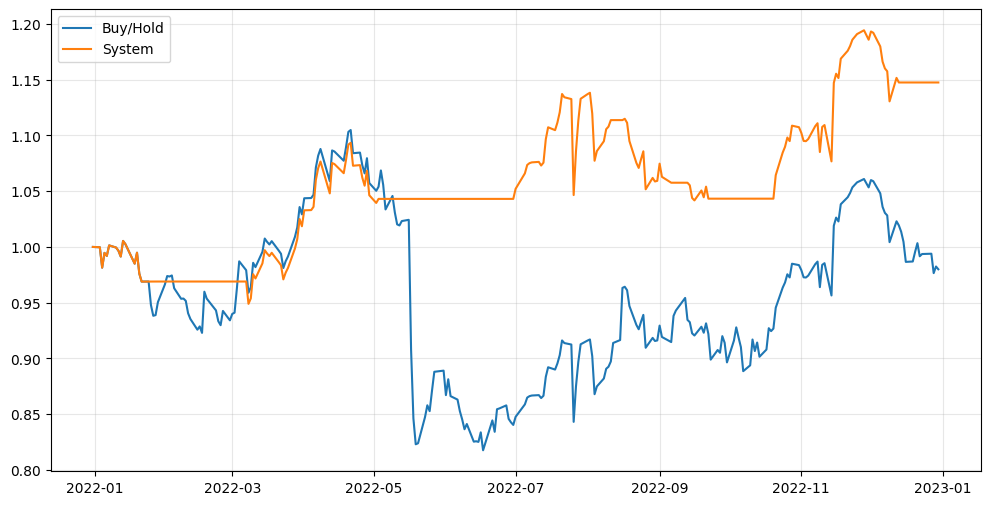

In [ ]:
plt.plot(np.exp(wmt['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(wmt['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

In [ ]:
wmt["^WMT"] = np.exp(wmt["return"]).cumprod() * 6000

<ipython-input-444-5761de3f857c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wmt["^WMT"] = np.exp(wmt["return"]).cumprod() * 6000


In [ ]:
wmt_results = wmt.loc[['2022-01-03', '2022-02-1', '2022-03-01', '2022-04-01', '2022-05-03', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-03', '2022-11-01', '2022-12-01']]

In [ ]:
wmt_results

Day        Open        High         Low       Close       8-day  \
2022-01-03   23  144.000000  144.789993  143.009995  144.649994  141.627501   
2022-02-01   43  139.210007  141.149994  138.990005  140.910004  138.459999   
2022-03-01   62  135.869995  137.889999  135.020004  135.990005  135.996252   
2022-04-01   85  149.660004  151.270004  148.839996  151.009995  145.506248   
2022-05-03  106  152.429993  154.279999  151.779999  152.509995  155.548752   
2022-06-01  126  128.500000  128.919998  124.680000  125.449997  123.934999   
2022-07-01  147  121.940002  122.919998  121.160004  122.629997  122.523751   
2022-08-01  167  131.059998  134.229996  131.000000  132.539993  129.723752   
2022-09-01  190  132.539993  135.139999  132.399994  134.479996  133.615002   
2022-10-03  211  130.240005  132.789993  130.009995  132.529999  131.942499   
2022-11-01  232  142.970001  143.550003  141.500000  141.690002  139.635000   
2022-12-01  253  152.050003  153.610001  150.729996  153.369995  152.182499   

                21-day  invested  logClose    return  signal  system_return  \
2022-01-03  140.752381         1  4.974317 -0.000277     0.0      -0.000277   
2022-02-01  141.932857         0  4.948121  0.007837     0.0       0.000000   
2022-03-01  137.178574         0  4.912581  0.006122     0.0       0.000000   
2022-04-01  143.837620         1  5.017346  0.013937     0.0       0.013937   
2022-05-03  155.325238         1  5.027230  0.003481     0.0       0.003481   
2022-06-01  138.024761         0  4.831907 -0.025033     0.0      -0.000000   
2022-07-01  122.328096         1  4.809172  0.008599     1.0       0.008599   
2022-08-01  127.295715         1  4.886884  0.003704     0.0       0.003704   
2022-09-01  132.705240         1  4.901415  0.014456     0.0       0.014456   
2022-10-03  133.672381         0  4.886809  0.021585     0.0       0.000000   
2022-11-01  134.864761         1  4.953642 -0.004507     0.0      -0.004507   
2022-12-01  146.360476         1  5.032853  0.006213     0.0       0.006213   

                   ^WMT  
2022-01-03  5998.340927  
2022-02-01  5843.251142  
2022-03-01  5639.228828  
2022-04-01  6262.077212  
2022-05-03  6324.279160  
2022-06-01  5202.156120  
2022-07-01  5085.216470  
2022-08-01  5496.163842  
2022-09-01  5576.611796  
2022-10-03  5495.749390  
2022-11-01  5875.596104  
2022-12-01  6359.941635

In [ ]:
wmt_results.loc[:, ['^WMT']]

^WMT
2022-01-03  5998.340927
2022-02-01  5843.251142
2022-03-01  5639.228828
2022-04-01  6262.077212
2022-05-03  6324.279160
2022-06-01  5202.156120
2022-07-01  5085.216470
2022-08-01  5496.163842
2022-09-01  5576.611796
2022-10-03  5495.749390
2022-11-01  5875.596104
2022-12-01  6359.941635

### KDP

In [ ]:
ticker = "KDP"
kdp = si.get_data(ticker,start_date = '12/01/2021',end_date='01/01/2023',interval='1d')
day = np.arange(1, len(kdp) + 1) #generate list of trading days
kdp['Day'] = day
# Dropping columns I don't want to use
kdp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
kdp = kdp[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
kdp.columns = ['Day', 'Open', 'High', 'Low', 'Close']
kdp.head()

Day       Open       High        Low      Close
2021-12-01    1  34.380001  34.410000  33.540001  33.560001
2021-12-02    2  33.790001  34.380001  33.790001  34.160000
2021-12-03    3  34.290001  34.509998  33.990002  34.470001
2021-12-06    4  34.799999  35.090000  34.669998  34.799999
2021-12-07    5  34.650002  35.009998  34.430000  34.930000

In [ ]:
kdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2021-12-01 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     273 non-null    int64  
 1   Open    273 non-null    float64
 2   High    273 non-null    float64
 3   Low     273 non-null    float64
 4   Close   273 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 12.8 KB


In [ ]:
kdp.describe()

Day        Open        High         Low       Close
count  273.000000  273.000000  273.000000  273.000000  273.000000
mean   137.000000   37.232528   37.572161   36.854029   37.224286
std     78.952517    1.302652    1.316112    1.311480    1.309193
min      1.000000   33.790001   34.380001   33.349998   33.560001
25%     69.000000   36.430000   36.630001   36.020000   36.320000
50%    137.000000   37.340000   37.849998   36.990002   37.340000
75%    205.000000   38.150002   38.459999   37.779999   38.139999
max    273.000000   40.119999   41.310001   39.990002   40.080002

In [ ]:
kdp['8-day'] = kdp['Close'].rolling(8).mean().shift()
kdp['21-day'] = kdp['Close'].rolling(21).mean().shift()
kdp.dropna(inplace=True)
kdp.head(n=10)

Day       Open       High        Low      Close     8-day  \
2021-12-31   22  36.639999  36.950001  36.470001  36.860001  36.04375   
2022-01-03   23  36.639999  36.759998  36.250000  36.709999  36.21625   
2022-01-04   24  36.790001  37.400002  36.770000  37.259998  36.39000   
2022-01-05   25  36.930000  37.540001  36.770000  37.029999  36.56375   
2022-01-06   26  36.980000  37.889999  36.980000  37.430000  36.70000   
2022-01-07   27  37.299999  37.410000  36.990002  37.299999  36.86500   
2022-01-10   28  37.360001  37.549999  37.119999  37.310001  36.98125   
2022-01-11   29  37.220001  37.900002  37.000000  37.830002  37.07250   
2022-01-12   30  37.740002  38.029999  37.549999  38.009998  37.21625   
2022-01-13   31  38.049999  38.509998  37.860001  38.450001  37.36000   

               21-day  
2021-12-31  35.351429  
2022-01-03  35.508572  
2022-01-04  35.630000  
2022-01-05  35.762857  
2022-01-06  35.869048  
2022-01-07  35.988095  
2022-01-10  36.106667  
2022-01-11  36.236190  
2022-01-12  36.355714  
2022-01-13  36.484762

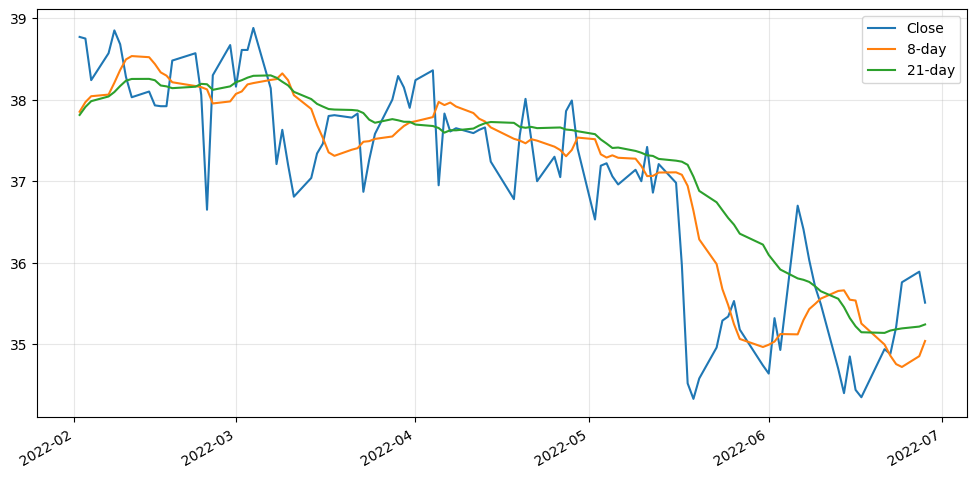

In [ ]:
# the 22:123 shows the first 100 days of trading
kdp.iloc[22:123,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

In [ ]:
kdp['logClose'] = np.log(kdp['Close']) # price will always be positive, so this operation is well-defined
kdp['return'] = kdp['logClose'].diff() # the difference will be positive or negative
kdp.head()

Day       Open       High        Low      Close     8-day  \
2021-12-31   22  36.639999  36.950001  36.470001  36.860001  36.04375   
2022-01-03   23  36.639999  36.759998  36.250000  36.709999  36.21625   
2022-01-04   24  36.790001  37.400002  36.770000  37.259998  36.39000   
2022-01-05   25  36.930000  37.540001  36.770000  37.029999  36.56375   
2022-01-06   26  36.980000  37.889999  36.980000  37.430000  36.70000   

               21-day  logClose    return  
2021-12-31  35.351429  3.607127       NaN  
2022-01-03  35.508572  3.603049 -0.004078  
2022-01-04  35.630000  3.617920  0.014871  
2022-01-05  35.762857  3.611728 -0.006192  
2022-01-06  35.869048  3.622473  0.010744

In [ ]:
##clean up first row
kdp.loc["2021-12-31",'return'] = 0.0
kdp.head()

Day       Open       High        Low      Close     8-day  \
2021-12-31   22  36.639999  36.950001  36.470001  36.860001  36.04375   
2022-01-03   23  36.639999  36.759998  36.250000  36.709999  36.21625   
2022-01-04   24  36.790001  37.400002  36.770000  37.259998  36.39000   
2022-01-05   25  36.930000  37.540001  36.770000  37.029999  36.56375   
2022-01-06   26  36.980000  37.889999  36.980000  37.430000  36.70000   

               21-day  logClose    return  
2021-12-31  35.351429  3.607127  0.000000  
2022-01-03  35.508572  3.603049 -0.004078  
2022-01-04  35.630000  3.617920  0.014871  
2022-01-05  35.762857  3.611728 -0.006192  
2022-01-06  35.869048  3.622473  0.010744

In [ ]:
np.exp(np.sum(kdp['return'])) -1

-0.032555636002958965

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
kdp['invested'] = np.where(kdp['8-day'] > kdp['21-day'], 1, 0)
kdp.head()

Day       Open       High        Low      Close     8-day  \
2021-12-31   22  36.639999  36.950001  36.470001  36.860001  36.04375   
2022-01-03   23  36.639999  36.759998  36.250000  36.709999  36.21625   
2022-01-04   24  36.790001  37.400002  36.770000  37.259998  36.39000   
2022-01-05   25  36.930000  37.540001  36.770000  37.029999  36.56375   
2022-01-06   26  36.980000  37.889999  36.980000  37.430000  36.70000   

               21-day  logClose    return  invested  
2021-12-31  35.351429  3.607127  0.000000         1  
2022-01-03  35.508572  3.603049 -0.004078         1  
2022-01-04  35.630000  3.617920  0.014871         1  
2022-01-05  35.762857  3.611728 -0.006192         1  
2022-01-06  35.869048  3.622473  0.010744         1

In [ ]:
print(kdp['invested'].value_counts())

0    127
1    125
Name: invested, dtype: int64


In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
kdp['signal'] = kdp['invested'].diff()
print(kdp['signal'].value_counts())

 0.0    238
-1.0      7
 1.0      6
Name: signal, dtype: int64


In [ ]:
kdp.head() # check your work

Day       Open       High        Low      Close     8-day  \
2021-12-31   22  36.639999  36.950001  36.470001  36.860001  36.04375   
2022-01-03   23  36.639999  36.759998  36.250000  36.709999  36.21625   
2022-01-04   24  36.790001  37.400002  36.770000  37.259998  36.39000   
2022-01-05   25  36.930000  37.540001  36.770000  37.029999  36.56375   
2022-01-06   26  36.980000  37.889999  36.980000  37.430000  36.70000   

               21-day  logClose    return  invested  signal  
2021-12-31  35.351429  3.607127  0.000000         1     NaN  
2022-01-03  35.508572  3.603049 -0.004078         1     0.0  
2022-01-04  35.630000  3.617920  0.014871         1     0.0  
2022-01-05  35.762857  3.611728 -0.006192         1     0.0  
2022-01-06  35.869048  3.622473  0.010744         1     0.0

In [ ]:
#Ugly first line again. Let's set signal to 1, i.e., we want to buy on the first trading day:
kdp.loc["2021-12-31",'signal'] = 1.0
kdp.head()

Day       Open       High        Low      Close     8-day  \
2021-12-31   22  36.639999  36.950001  36.470001  36.860001  36.04375   
2022-01-03   23  36.639999  36.759998  36.250000  36.709999  36.21625   
2022-01-04   24  36.790001  37.400002  36.770000  37.259998  36.39000   
2022-01-05   25  36.930000  37.540001  36.770000  37.029999  36.56375   
2022-01-06   26  36.980000  37.889999  36.980000  37.430000  36.70000   

               21-day  logClose    return  invested  signal  
2021-12-31  35.351429  3.607127  0.000000         1     1.0  
2022-01-03  35.508572  3.603049 -0.004078         1     0.0  
2022-01-04  35.630000  3.617920  0.014871         1     0.0  
2022-01-05  35.762857  3.611728 -0.006192         1     0.0  
2022-01-06  35.869048  3.622473  0.010744         1     0.0

In [ ]:
## Let's see the trading days

kdp[kdp['signal'].isin([1,-1])]

Day       Open       High        Low      Close      8-day  \
2021-12-31   22  36.639999  36.950001  36.470001  36.860001  36.043750   
2022-02-23   58  38.540001  38.740002  38.060001  38.060001  38.153749   
2022-03-09   68  37.709999  37.930000  36.980000  37.630001  38.322500   
2022-03-11   70  37.340000  37.750000  36.750000  36.810001  38.055000   
2022-04-01   85  37.959999  38.240002  37.759998  38.240002  37.735001   
2022-04-14   94  37.740002  37.799999  37.189999  37.240002  37.660001   
2022-06-13  134  35.090000  35.389999  34.610001  34.700001  35.653750   
2022-06-21  139  34.189999  35.270000  34.110001  34.939999  34.996250   
2022-06-30  146  35.150002  35.619999  35.060001  35.389999  35.277499   
2022-08-31  189  38.599998  38.630001  38.049999  38.119999  39.258749   
2022-10-13  219  37.209999  38.240002  36.990002  38.139999  37.179999   
2022-11-08  237  37.459999  38.130001  37.389999  37.939999  37.756250   
2022-11-29  251  38.090000  38.360001  37.860001  38.099998  37.756250   
2022-12-15  263  37.040001  37.230000  36.389999  36.630001  37.860000   

               21-day  logClose    return  invested  signal  
2021-12-31  35.351429  3.607127  0.000000         1     1.0  
2022-02-23  38.194285  3.639164 -0.013311         0    -1.0  
2022-03-09  38.220000  3.627802  0.011224         1     1.0  
2022-03-11  38.096666  3.605770 -0.010539         0    -1.0  
2022-04-01  37.694762  3.643882  0.008931         1     1.0  
2022-04-14  37.726191  3.617383 -0.011215         0    -1.0  
2022-06-13  35.558095  3.546740 -0.022511         1     1.0  
2022-06-21  35.139048  3.553632  0.017030         0    -1.0  
2022-06-30  35.265714  3.566429 -0.008161         1     1.0  
2022-08-31  39.292857  3.640739 -0.007839         0    -1.0  
2022-10-13  37.042381  3.641264  0.011338         1     1.0  
2022-11-08  37.824285  3.636006  0.012732         0    -1.0  
2022-11-29  37.614762  3.640214 -0.002621         1     1.0  
2022-12-15  37.892381  3.600868 -0.019198         0    -1.0

In [ ]:
kdp

Day       Open       High        Low      Close      8-day  \
2021-12-31   22  36.639999  36.950001  36.470001  36.860001  36.043750   
2022-01-03   23  36.639999  36.759998  36.250000  36.709999  36.216250   
2022-01-04   24  36.790001  37.400002  36.770000  37.259998  36.390000   
2022-01-05   25  36.930000  37.540001  36.770000  37.029999  36.563750   
2022-01-06   26  36.980000  37.889999  36.980000  37.430000  36.700000   
2022-01-07   27  37.299999  37.410000  36.990002  37.299999  36.865000   
2022-01-10   28  37.360001  37.549999  37.119999  37.310001  36.981250   
2022-01-11   29  37.220001  37.900002  37.000000  37.830002  37.072500   
2022-01-12   30  37.740002  38.029999  37.549999  38.009998  37.216250   
2022-01-13   31  38.049999  38.509998  37.860001  38.450001  37.360000   
2022-01-14   32  38.419998  39.349998  38.169998  39.279999  37.577500   
2022-01-18   33  39.049999  39.110001  38.009998  38.150002  37.830000   
2022-01-19   34  38.279999  38.610001  37.990002  38.380001  37.970000   
2022-01-20   35  38.380001  38.660000  38.080002  38.110001  38.088750   
2022-01-21   36  38.259998  38.709999  37.799999  37.830002  38.190001   
2022-01-24   37  38.009998  38.279999  37.369999  38.169998  38.255001   
2022-01-25   38  37.939999  38.410000  37.430000  38.080002  38.297500   
2022-01-26   39  37.709999  38.139999  37.169998  37.410000  38.306251   
2022-01-27   40  37.410000  38.520000  37.410000  37.599998  38.176250   
2022-01-28   41  37.310001  37.669998  37.060001  37.639999  37.966250   
2022-01-31   42  37.320000  38.080002  37.310001  37.950001  37.902500   
2022-02-01   43  37.990002  38.189999  37.480000  38.139999  37.848750   
2022-02-02   44  38.299999  38.889999  38.169998  38.770000  37.852500   
2022-02-03   45  38.740002  39.049999  38.419998  38.750000  37.970000   
2022-02-04   46  38.389999  38.650002  37.880001  38.240002  38.042500   
2022-02-07   47  38.330002  38.730000  38.150002  38.570000  38.062500   
2022-02-08   48  38.669998  39.029999  38.480000  38.849998  38.207500   
2022-02-09   49  39.090000  39.130001  38.580002  38.680000  38.363750   
2022-02-10   50  38.029999  38.709999  38.020000  38.279999  38.493750   
2022-02-11   51  38.200001  38.419998  37.939999  38.029999  38.535000   
2022-02-14   52  38.119999  38.230000  37.610001  38.099998  38.521250   
2022-02-15   53  38.419998  38.619999  37.889999  37.930000  38.437500   
2022-02-16   54  37.950001  38.169998  37.650002  37.919998  38.335000   
2022-02-17   55  38.389999  38.389999  37.660000  37.919998  38.294999   
2022-02-18   56  37.779999  38.610001  37.770000  38.480000  38.213749   
2022-02-22   57  38.540001  38.750000  38.150002  38.570000  38.167499   
2022-02-23   58  38.540001  38.740002  38.060001  38.060001  38.153749   
2022-02-24   59  37.230000  37.619999  35.919998  36.650002  38.126249   
2022-02-25   60  36.900002  38.410000  36.849998  38.299999  37.953750   
2022-02-28   61  37.400002  38.709999  37.340000  38.669998  37.978750   
2022-03-01   62  38.380001  38.790001  37.980000  38.160000  38.071249   
2022-03-02   63  38.389999  38.779999  38.049999  38.610001  38.101250   
2022-03-03   64  38.680000  38.880001  38.529999  38.610001  38.187500   
2022-03-04   65  38.220001  39.029999  37.919998  38.880001  38.203750   
2022-03-07   66  38.779999  39.250000  38.060001  38.139999  38.242500   
2022-03-08   67  38.110001  38.360001  37.139999  37.209999  38.252500   
2022-03-09   68  37.709999  37.930000  36.980000  37.630001  38.322500   
2022-03-10   69  37.160000  38.250000  36.509998  37.200001  38.238750   
2022-03-11   70  37.340000  37.750000  36.750000  36.810001  38.055000   
2022-03-14   71  36.849998  37.189999  36.840000  37.040001  37.886250   
2022-03-15   72  37.369999  37.509998  37.099998  37.340000  37.690001   
2022-03-16   73  37.209999  37.650002  36.759998  37.459999  37.531250   
2022-03-17   74  37.430000  38.110001  37.430000  37.799999  37.353750   
2022-03-18   75 

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!
kdp['system_return'] = kdp['invested'] * kdp['return']
kdp.head()

Day       Open       High        Low      Close     8-day  \
2021-12-31   22  36.639999  36.950001  36.470001  36.860001  36.04375   
2022-01-03   23  36.639999  36.759998  36.250000  36.709999  36.21625   
2022-01-04   24  36.790001  37.400002  36.770000  37.259998  36.39000   
2022-01-05   25  36.930000  37.540001  36.770000  37.029999  36.56375   
2022-01-06   26  36.980000  37.889999  36.980000  37.430000  36.70000   

               21-day  logClose    return  invested  signal  system_return  
2021-12-31  35.351429  3.607127  0.000000         1     1.0       0.000000  
2022-01-03  35.508572  3.603049 -0.004078         1     0.0      -0.004078  
2022-01-04  35.630000  3.617920  0.014871         1     0.0       0.014871  
2022-01-05  35.762857  3.611728 -0.006192         1     0.0      -0.006192  
2022-01-06  35.869048  3.622473  0.010744         1     0.0       0.010744

In [ ]:
#What was the return of this trategy?

np.exp(np.sum(kdp['system_return'])) -1

0.051947462290231394

In [ ]:
#Let's recall the returns of the buy&hold strategy:

np.exp(np.sum(kdp['return'])) -1

-0.032555636002958965

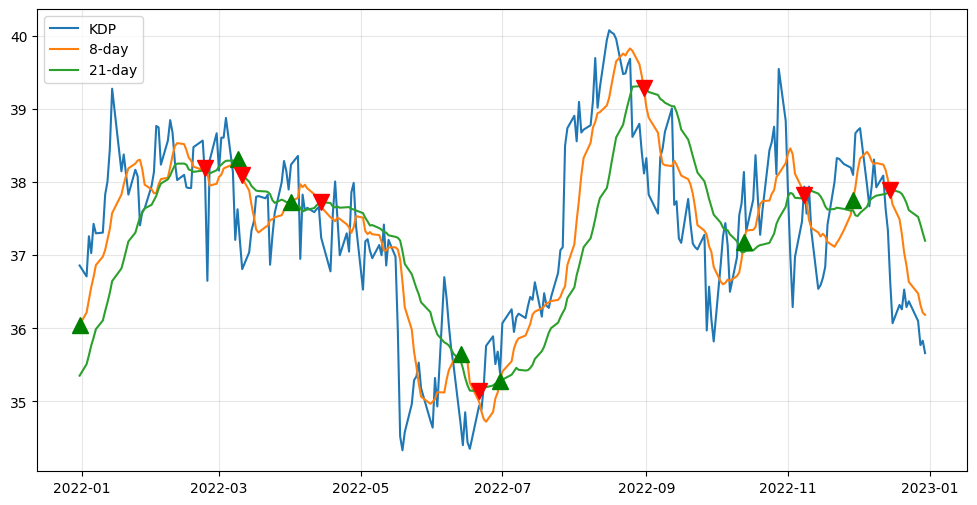

In [ ]:
##Plot trades on time series for the last year**

# show the last year
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(kdp.iloc[-252:]['Close'], label = 'KDP') # actual value
plt.plot(kdp.iloc[-252:]['8-day'], label = '8-day') # 8-day average
plt.plot(kdp.iloc[-252:]['21-day'], label = '21-day') # 21-day average
plt.plot(kdp[-252:].loc[kdp.signal == 1].index, kdp[-252:]['8-day'][kdp.signal == 1], '^',
         color = 'g', markersize = 12)
plt.plot(kdp[-252:].loc[kdp.signal == -1].index, kdp[-252:]['21-day'][kdp.signal == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

In [ ]:
#We've calculated a lot of intermediate columns of data. Let's rearrange the order of the columns so that it's easier for us to tell a story.

# print the column names so that we can copy/paste
kdp.columns

Index(['Day', 'Open', 'High', 'Low', 'Close', '8-day', '21-day', 'logClose',
       'return', 'invested', 'signal', 'system_return'],
      dtype='object')

In [ ]:
# reorder the columns by name
# make a copy of gld with a new order of columns
kdp = kdp[['Day', 'Open', 'High', 'Low', 'Close',
           '8-day', '21-day',
           'invested', 'logClose',
          'return',
          'signal',  'system_return']]

In [ ]:
##allowing Colab to display all the rows of your DataFrame

pd.set_option("display.max_rows", None)
kdp

Day       Open       High        Low      Close      8-day  \
2021-12-31   22  36.639999  36.950001  36.470001  36.860001  36.043750   
2022-01-03   23  36.639999  36.759998  36.250000  36.709999  36.216250   
2022-01-04   24  36.790001  37.400002  36.770000  37.259998  36.390000   
2022-01-05   25  36.930000  37.540001  36.770000  37.029999  36.563750   
2022-01-06   26  36.980000  37.889999  36.980000  37.430000  36.700000   
2022-01-07   27  37.299999  37.410000  36.990002  37.299999  36.865000   
2022-01-10   28  37.360001  37.549999  37.119999  37.310001  36.981250   
2022-01-11   29  37.220001  37.900002  37.000000  37.830002  37.072500   
2022-01-12   30  37.740002  38.029999  37.549999  38.009998  37.216250   
2022-01-13   31  38.049999  38.509998  37.860001  38.450001  37.360000   
2022-01-14   32  38.419998  39.349998  38.169998  39.279999  37.577500   
2022-01-18   33  39.049999  39.110001  38.009998  38.150002  37.830000   
2022-01-19   34  38.279999  38.610001  37.990002  38.380001  37.970000   
2022-01-20   35  38.380001  38.660000  38.080002  38.110001  38.088750   
2022-01-21   36  38.259998  38.709999  37.799999  37.830002  38.190001   
2022-01-24   37  38.009998  38.279999  37.369999  38.169998  38.255001   
2022-01-25   38  37.939999  38.410000  37.430000  38.080002  38.297500   
2022-01-26   39  37.709999  38.139999  37.169998  37.410000  38.306251   
2022-01-27   40  37.410000  38.520000  37.410000  37.599998  38.176250   
2022-01-28   41  37.310001  37.669998  37.060001  37.639999  37.966250   
2022-01-31   42  37.320000  38.080002  37.310001  37.950001  37.902500   
2022-02-01   43  37.990002  38.189999  37.480000  38.139999  37.848750   
2022-02-02   44  38.299999  38.889999  38.169998  38.770000  37.852500   
2022-02-03   45  38.740002  39.049999  38.419998  38.750000  37.970000   
2022-02-04   46  38.389999  38.650002  37.880001  38.240002  38.042500   
2022-02-07   47  38.330002  38.730000  38.150002  38.570000  38.062500   
2022-02-08   48  38.669998  39.029999  38.480000  38.849998  38.207500   
2022-02-09   49  39.090000  39.130001  38.580002  38.680000  38.363750   
2022-02-10   50  38.029999  38.709999  38.020000  38.279999  38.493750   
2022-02-11   51  38.200001  38.419998  37.939999  38.029999  38.535000   
2022-02-14   52  38.119999  38.230000  37.610001  38.099998  38.521250   
2022-02-15   53  38.419998  38.619999  37.889999  37.930000  38.437500   
2022-02-16   54  37.950001  38.169998  37.650002  37.919998  38.335000   
2022-02-17   55  38.389999  38.389999  37.660000  37.919998  38.294999   
2022-02-18   56  37.779999  38.610001  37.770000  38.480000  38.213749   
2022-02-22   57  38.540001  38.750000  38.150002  38.570000  38.167499   
2022-02-23   58  38.540001  38.740002  38.060001  38.060001  38.153749   
2022-02-24   59  37.230000  37.619999  35.919998  36.650002  38.126249   
2022-02-25   60  36.900002  38.410000  36.849998  38.299999  37.953750   
2022-02-28   61  37.400002  38.709999  37.340000  38.669998  37.978750   
2022-03-01   62  38.380001  38.790001  37.980000  38.160000  38.071249   
2022-03-02   63  38.389999  38.779999  38.049999  38.610001  38.101250   
2022-03-03   64  38.680000  38.880001  38.529999  38.610001  38.187500   
2022-03-04   65  38.220001  39.029999  37.919998  38.880001  38.203750   
2022-03-07   66  38.779999  39.250000  38.060001  38.139999  38.242500   
2022-03-08   67  38.110001  38.360001  37.139999  37.209999  38.252500   
2022-03-09   68  37.709999  37.930000  36.980000  37.630001  38.322500   
2022-03-10   69  37.160000  38.250000  36.509998  37.200001  38.238750   
2022-03-11   70  37.340000  37.750000  36.750000  36.810001  38.055000   
2022-03-14   71  36.849998  37.189999  36.840000  37.040001  37.886250   
2022-03-15   72  37.369999  37.509998  37.099998  37.340000  37.690001   
2022-03-16   73  37.209999  37.650002  36.759998  37.459999  37.531250   
2022-03-17   74  37.430000  38.110001  37.430000  37.799999  37.353750   
2022-03-18   75 

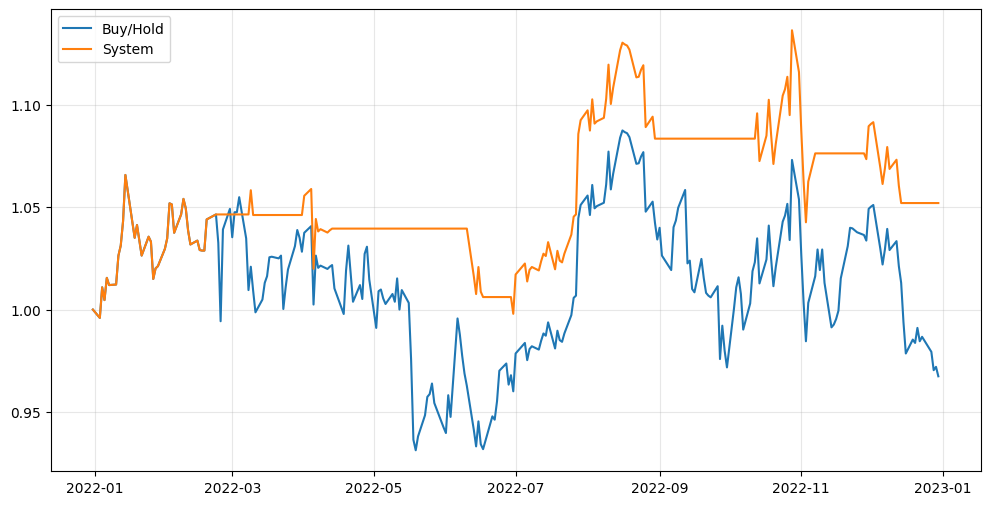

In [ ]:
plt.plot(np.exp(kdp['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(kdp['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

In [ ]:
kdp["^KDP"] = np.exp(kdp["return"]).cumprod() * 27000

<ipython-input-471-787ee6465437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdp["^KDP"] = np.exp(kdp["return"]).cumprod() * 27000


In [ ]:
kdp_results = kdp.loc[['2022-01-03', '2022-02-1', '2022-03-01', '2022-04-01', '2022-05-03', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-03', '2022-11-01', '2022-12-01']]

In [ ]:
kdp_results.loc[:, ["^KDP"]]

^KDP
2022-01-03  26890.123681
2022-02-01  27937.600827
2022-03-01  27952.251189
2022-04-01  28010.852638
2022-05-03  27241.723991
2022-06-01  25373.846121
2022-07-01  26421.323267
2022-08-01  28501.627197
2022-09-01  28076.777870
2022-10-03  27007.323784
2022-11-01  27717.850982
2022-12-01  28355.126369

### Comparison of Results

In [ ]:
100000 - 46600 - 6359 - 28355

18686

On January 1st we invest the following into each stock:

PLD: $67,000

KDP: $27,000

WMT: $6,000


On December 1st we sold the stocks at the following price:

PLD: $46,600

KDP: $6,359

WMT: $28,355

We ended with a loss of $18,686 using this strategy! the PLD investment really hurt us here.


## 3.3 - Momentum trading strategy for the entire MPT portfolio

In [ ]:
momentum_trading_return_pld = np.exp(np.sum(pld['system_return'])) -1
momentum_trading_return_pld

momentum_trading_return_wmt = np.exp(np.sum(wmt['system_return'])) -1
momentum_trading_return_wmt

momentum_trading_return_kdp = np.exp(np.sum(kdp['system_return'])) -1
momentum_trading_return_kdp

pld_alloc = .67
wmt_alloc = .27
kdp_alloc = 0.06

inv = 100000
inv_pld = pld_alloc*inv
inv_wmt = wmt_alloc*inv
inv_kdp = kdp_alloc*inv

mt_return = (pld_alloc*momentum_trading_return_pld) + (wmt_alloc*momentum_trading_return_wmt) + (kdp_alloc*momentum_trading_return_kdp)
mt_return


-0.031504745440217995

In [ ]:
Total_amount_Momentum = 100000*mt_return + 100000
print('Momentum Trading Strategy Portfolio Value = $',Total_amount_Momentum)

Momentum Trading Strategy Portfolio Value = $ 96849.5254559782


## Buy-Hold Return

In [ ]:
pld_bh_return = np.exp(np.sum(pld['return'])) -1
wmt_bh_return = np.exp(np.sum(wmt['return'])) -1
kdp_bh_return = np.exp(np.sum(kdp['return'])) -1

In [ ]:
bh_return = (pld_alloc*pld_bh_return) + (wmt_alloc*wmt_bh_return) + (kdp_alloc*kdp_bh_return)
bh_return

-0.2287482581955089

In [ ]:
Total_amount_buyhold = 100000*bh_return + 100000
print('Buy/Hold Trading Strategy Portfolio Value = $',Total_amount_buyhold)

Buy/Hold Trading Strategy Portfolio Value = $ 77125.1741804491


## 3.4 - Buy-and-Hold strategy for the S&P 500 index

In [ ]:
ticker = "^GSPC"
sp = si.get_data(ticker,start_date = '01/01/2022',end_date='01/01/2023',interval='1d')
day = np.arange(1, len(sp) + 1) #generate list of trading days
sp['Day'] = day
# Dropping columns I don't want to use
sp.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
sp = sp[['Day', 'open', 'high', 'low', 'close']]
sp.head()

Day         open         high          low        close
2022-01-03    1  4778.140137  4796.640137  4758.169922  4796.560059
2022-01-04    2  4804.509766  4818.620117  4774.270020  4793.540039
2022-01-05    3  4787.990234  4797.700195  4699.439941  4700.580078
2022-01-06    4  4693.390137  4725.009766  4671.259766  4696.049805
2022-01-07    5  4697.660156  4707.950195  4662.740234  4677.029785

In [ ]:
sp['log_close'] = np.log(sp['close'])
sp['return'] = sp['log_close'].diff()


In [ ]:
sp['Date'] = sp.index
sp.dropna(inplace=True)
sp


Day         open         high          low        close  \
2022-01-04    2  4804.509766  4818.620117  4774.270020  4793.540039   
2022-01-05    3  4787.990234  4797.700195  4699.439941  4700.580078   
2022-01-06    4  4693.390137  4725.009766  4671.259766  4696.049805   
2022-01-07    5  4697.660156  4707.950195  4662.740234  4677.029785   
2022-01-10    6  4655.339844  4673.020020  4582.240234  4670.290039   
2022-01-11    7  4669.140137  4714.129883  4638.270020  4713.069824   
2022-01-12    8  4728.589844  4748.830078  4706.709961  4726.350098   
2022-01-13    9  4733.560059  4744.129883  4650.290039  4659.029785   
2022-01-14   10  4637.990234  4665.129883  4614.750000  4662.850098   
2022-01-18   11  4632.240234  4632.240234  4568.700195  4577.109863   
2022-01-19   12  4588.029785  4611.549805  4530.200195  4532.759766   
2022-01-20   13  4547.350098  4602.109863  4477.950195  4482.729980   
2022-01-21   14  4471.379883  4494.520020  4395.339844  4397.939941   
2022-01-24   15  4356.319824  4417.350098  4222.620117  4410.129883   
2022-01-25   16  4366.640137  4411.009766  4287.109863  4356.450195   
2022-01-26   17  4408.430176  4453.229980  4304.799805  4349.930176   
2022-01-27   18  4380.580078  4428.740234  4309.500000  4326.509766   
2022-01-28   19  4336.189941  4432.720215  4292.459961  4431.850098   
2022-01-31   20  4431.790039  4516.890137  4414.020020  4515.549805   
2022-02-01   21  4519.569824  4550.490234  4483.529785  4546.540039   
2022-02-02   22  4566.390137  4595.310059  4544.319824  4589.379883   
2022-02-03   23  4535.410156  4542.879883  4470.390137  4477.439941   
2022-02-04   24  4482.790039  4539.660156  4451.500000  4500.529785   
2022-02-07   25  4505.750000  4521.859863  4471.470215  4483.870117   
2022-02-08   26  4480.020020  4531.319824  4465.399902  4521.540039   
2022-02-09   27  4547.000000  4590.029785  4547.000000  4587.180176   
2022-02-10   28  4553.240234  4588.919922  4484.310059  4504.080078   
2022-02-11   29  4506.270020  4526.330078  4401.410156  4418.640137   
2022-02-14   30  4412.609863  4426.220215  4364.839844  4401.669922   
2022-02-15   31  4429.279785  4472.770020  4429.279785  4471.069824   
2022-02-16   32  4455.750000  4489.549805  4429.680176  4475.009766   
2022-02-17   33  4456.060059  4456.060059  4373.810059  4380.259766   
2022-02-18   34  4384.569824  4394.600098  4327.220215  4348.870117   
2022-02-22   35  4332.740234  4362.120117  4267.109863  4304.759766   
2022-02-23   36  4324.930176  4341.509766  4221.509766  4225.500000   
2022-02-24   37  4155.770020  4294.729980  4114.649902  4288.700195   
2022-02-25   38  4298.379883  4385.339844  4286.830078  4384.649902   
2022-02-28   39  4354.169922  4388.839844  4315.120117  4373.939941   
2022-03-01   40  4363.140137  4378.450195  4279.540039  4306.259766   
2022-03-02   41  4322.560059  4401.479980  4322.560059  4386.540039   
2022-03-03   42  4401.310059  4416.779785  4345.560059  4363.490234   
2022-03-04   43  4342.120117  4342.120117  4284.979980  4328.870117   
2022-03-07   44  4327.009766  4327.009766  4199.850098  4201.089844   
2022-03-08   45  4202.660156  4276.939941  4157.870117  4170.700195   
2022-03-09   46  4223.100098  4299.399902  4223.100098  4277.879883   
2022-03-10   47  4252.549805  4268.279785  4209.799805  4259.520020   
2022-03-11   48  4279.500000  4291.009766  4200.490234  4204.310059   
2022-03-14   49  4202.750000  4247.569824  4161.720215  4173.109863   
2022-03-15   50  4188.819824  4271.049805  4187.899902  4262.450195   
2022-03-16   51  4288.140137  4358.899902  4251.990234  4357.859863   
2022-03-17   52  4345.109863  4412.669922  4335.649902  4411.669922   
2022-03-18   53  4407.339844  4465.399902  4390.569824  4463.120117   
2022-03-21   54  4462.399902  4481.750000  4424.299805  4461.180176   
2022-03-22   55  4469.100098  4522.000000  4469.100098  4511.609863   
2022-03-23   56  4493.100098  4501.069824  4455.810059  4456.240234   
2022-03-24   57  4469.979980  4520.5

In [ ]:
print("sp500 Return: ", np.exp(np.sum(sp['return'])) -1)

sp500 Return:  -0.19953050663444438


In [ ]:

sp500 = sp.groupby(sp['Date'].dt.month)[['return']].sum().cumsum()

In [ ]:
sp500['Date'] = ["2022-01-03","2022-02-01", "2022-03-01","2022-04-01","2022-05-02", "2022-06-01","2022-07-01","2022-08-01","2022-09-01","2022-10-03", "2022-11-01", "2022-12-01"]

In [ ]:
sp500.index.name = None

In [ ]:
sp500[['Date', 'return']]

Date    return
1   2022-01-03 -0.060372
2   2022-02-01 -0.092235
3   2022-03-01 -0.057087
4   2022-04-01 -0.149154
5   2022-05-02 -0.149101
6   2022-06-01 -0.236753
7   2022-07-01 -0.149551
8   2022-08-01 -0.192918
9   2022-09-01 -0.290968
10  2022-10-03 -0.214133
11  2022-11-01 -0.161775
12  2022-12-01 -0.222557

## Data Prep for investment comparison

In [ ]:
portfolio = pd.DataFrame()
portfolio['Day'] = pld['Day']
portfolio['return_pld'] = pld['return']
portfolio['momentum_pld'] = pld['system_return']
portfolio

Day  return_pld  momentum_pld
2021-12-31   22    0.000000      0.000000
2022-01-03   23   -0.020765     -0.020765
2022-01-04   24   -0.023935     -0.023935
2022-01-05   25   -0.021027     -0.021027
2022-01-06   26   -0.006874     -0.006874
2022-01-07   27   -0.018305     -0.018305
2022-01-10   28   -0.004629     -0.004629
2022-01-11   29   -0.000196     -0.000000
2022-01-12   30    0.001633      0.000000
2022-01-13   31   -0.000588     -0.000000
2022-01-14   32   -0.002681     -0.000000
2022-01-18   33    0.004507      0.000000
2022-01-19   34    0.001042      0.000000
2022-01-20   35    0.003575      0.000000
2022-01-21   36    0.008334      0.000000
2022-01-24   37   -0.013733     -0.000000
2022-01-25   38    0.004231      0.000000
2022-01-26   39   -0.014656     -0.000000
2022-01-27   40   -0.020711     -0.000000
2022-01-28   41    0.042551      0.000000
2022-01-31   42    0.011222      0.000000
2022-02-01   43   -0.021268     -0.000000
2022-02-02   44    0.024515      0.000000
2022-02-03   45   -0.005673     -0.000000
2022-02-04   46   -0.019037     -0.019037
2022-02-07   47   -0.009426     -0.009426
2022-02-08   48   -0.005672     -0.005672
2022-02-09   49    0.027272      0.027272
2022-02-10   50   -0.045696     -0.045696
2022-02-11   51   -0.014386     -0.000000
2022-02-14   52   -0.006652     -0.000000
2022-02-15   53    0.001925      0.000000
2022-02-16   54   -0.008552     -0.000000
2022-02-17   55   -0.007648     -0.000000
2022-02-18   56   -0.005108     -0.000000
2022-02-22   57   -0.001264     -0.000000
2022-02-23   58   -0.011373     -0.000000
2022-02-24   59    0.018093      0.000000
2022-02-25   60    0.035099      0.000000
2022-02-28   61   -0.017669     -0.000000
2022-03-01   62   -0.000617     -0.000000
2022-03-02   63    0.012815      0.000000
2022-03-03   64    0.013055      0.000000
2022-03-04   65    0.008388      0.000000
2022-03-07   66   -0.012878     -0.000000
2022-03-08   67   -0.012978     -0.012978
2022-03-09   68    0.023466      0.023466
2022-03-10   69    0.003979      0.003979
2022-03-11   70   -0.021747     -0.021747
2022-03-14   71    0.009024      0.009024
2022-03-15   72    0.017741      0.017741
2022-03-16   73    0.017820      0.017820
2022-03-17   74    0.013431      0.013431
2022-03-18   75    0.022095      0.022095
2022-03-21   76   -0.007772     -0.007772
2022-03-22   77   -0.001574     -0.001574
2022-03-23   78   -0.009117     -0.009117
2022-03-24   79   -0.008559     -0.008559
2022-03-25   80    0.009195      0.009195
2022-03-28   81    0.019013      0.019013
2022-03-29   82    0.026767      0.026767
2022-03-30   83   -0.003406     -0.003406
2022-03-31   84   -0.016338     -0.016338
2022-04-01   85    0.026401      0.026401
2022-04-04   86   -0.012258     -0.012258
2022-04-05   87    0.015149      0.015149
2022-04-06   88    0.022772      0.022772
2022-04-07   89   -0.007553     -0.007553
2022-04-08   90   -0.001067     -0.001067
2022-04-11   91   -0.017466     -0.017466
2022-04-12   92   -0.002416     -0.002416
2022-04-13   93   -0.001998     -0.001998
2022-04-14   94   -0.014037     -0.014037
2022-04-18   95    0.001842      0.001842
2022-04-19   96    0.039457      0.039457
2022-04-20   97    0.018175      0.018175
2022-04-21   98   -0.011006     -0.011006
2022-04-22   99   -0.012076     -0.012076
2022-04-25  100   -0.005944     -0.005944
2022-04-26  101   -0.012599     -0.012599
2022-04-27  102    0.012241      0.012241
2022-04-28  103    0.031352      0.031352
2022-04-29  104   -0.076365     -0.076365
2022-05-02  105   -0.045697     -0.045697
2022-05-03  106   -0.005041     -0.000000
2022-05-04  107   -0.000525     -0.000000
2022-05-05  108   -0.049125     -0.000000
2022-05-06  109   -0.028687     -0.000000
2022-05-09  110   -0.062308     -0.000000
2022-05-10  111   -0.054013     -0.000000
2022-05-11  112   -0.013406     -0.000000
2022-05-12  113    0.001534      0.000000
2022-05-13  114    0.035044      0.000000
2022-05-16  115   -0.024449     -0.000000
2022-05-17  116    0.0

In [ ]:
portfolio['return_wmt'] = wmt['return']
portfolio['momentum_wmt'] = wmt['system_return']
portfolio

Day  return_pld  momentum_pld  return_wmt  momentum_wmt
2021-12-31   22    0.000000      0.000000    0.000000      0.000000
2022-01-03   23   -0.020765     -0.020765   -0.000277     -0.000277
2022-01-04   24   -0.023935     -0.023935   -0.018490     -0.018490
2022-01-05   25   -0.021027     -0.021027    0.013431      0.013431
2022-01-06   26   -0.006874     -0.006874   -0.002783     -0.002783
2022-01-07   27   -0.018305     -0.018305    0.009500      0.009500
2022-01-10   28   -0.004629     -0.004629   -0.001934     -0.001934
2022-01-11   29   -0.000196     -0.000000   -0.002839     -0.002839
2022-01-12   30    0.001633      0.000000   -0.005284     -0.005284
2022-01-13   31   -0.000588     -0.000000    0.014053      0.014053
2022-01-14   32   -0.002681     -0.000000   -0.002822     -0.002822
2022-01-18   33    0.004507      0.000000   -0.017665     -0.017665
2022-01-19   34    0.001042      0.000000    0.009914      0.009914
2022-01-20   35    0.003575      0.000000   -0.019078     -0.019078
2022-01-21   36    0.008334      0.000000   -0.007320     -0.007320
2022-01-24   37   -0.013733     -0.000000    0.000071      0.000071
2022-01-25   38    0.004231      0.000000   -0.021995     -0.000000
2022-01-26   39   -0.014656     -0.000000   -0.010260     -0.000000
2022-01-27   40   -0.020711     -0.000000    0.000663      0.000000
2022-01-28   41    0.042551      0.000000    0.012292      0.000000
2022-01-31   42    0.011222      0.000000    0.016515      0.000000
2022-02-01   43   -0.021268     -0.000000    0.007837      0.000000
2022-02-02   44    0.024515      0.000000   -0.000426     -0.000000
2022-02-03   45   -0.005673     -0.000000    0.000993      0.000000
2022-02-04   46   -0.019037     -0.019037   -0.011844     -0.000000
2022-02-07   47   -0.009426     -0.009426   -0.009881     -0.000000
2022-02-08   48   -0.005672     -0.005672    0.000217      0.000000
2022-02-09   49    0.027272      0.027272   -0.002176     -0.000000
2022-02-10   50   -0.045696     -0.045696   -0.011762     -0.000000
2022-02-11   51   -0.014386     -0.000000   -0.005527     -0.000000
2022-02-14   52   -0.006652     -0.000000   -0.010250     -0.000000
2022-02-15   53    0.001925      0.000000    0.003131      0.000000
2022-02-16   54   -0.008552     -0.000000   -0.006271     -0.000000
2022-02-17   55   -0.007648     -0.000000    0.039284      0.000000
2022-02-18   56   -0.005108     -0.000000   -0.006429     -0.000000
2022-02-22   57   -0.001264     -0.000000   -0.011223     -0.000000
2022-02-23   58   -0.011373     -0.000000   -0.010313     -0.000000
2022-02-24   59    0.018093      0.000000   -0.003858     -0.000000
2022-02-25   60    0.035099      0.000000    0.013658      0.000000
2022-02-28   61   -0.017669     -0.000000   -0.008986     -0.000000
2022-03-01   62   -0.000617     -0.000000    0.006122      0.000000
2022-03-02   63    0.012815      0.000000    0.001249      0.000000
2022-03-03   64    0.013055      0.000000    0.022727      0.000000
2022-03-04   65    0.008388      0.000000    0.025027      0.000000
2022-03-07   66   -0.012878     -0.000000   -0.008085     -0.000000
2022-03-08   67   -0.012978     -0.012978   -0.020899     -0.020899
2022-03-09   68    0.023466      0.023466    0.005176      0.005176
2022-03-10   69    0.003979      0.003979    0.022476      0.022476
2022-03-11   70   -0.021747     -0.021747   -0.003934     -0.003934
2022-03-14   71    0.009024      0.009024    0.013841      0.013841
2022-03-15   72    0.017741      0.017741    0.011938      0.011938
2022-03-16   73    0.017820      0.017820   -0.002954     -0.002954
2022-03-17   74    0.013431      0.013431   -0.002342     -0.002342
2022-03-18   75    0.022095      0.022095    0.002961      0.002961
2022-03-21   76   -0.007772     -0.007772   -0.008354     -0.008354
2022-03-22   77   -0.001574     -0.001574   -0.002986     -0.002986
2022-03-23   78   -0.009117     -0.009117   -0.012949     -0.012949
2022-03-24   79   -0.008559     -0.008559    0.006180      0.006180


In [ ]:
portfolio['return_kdp'] = kdp['return']
portfolio['momentum_kdp'] = kdp['system_return']
portfolio

Day  return_pld  momentum_pld  return_wmt  momentum_wmt  \
2021-12-31   22    0.000000      0.000000    0.000000      0.000000   
2022-01-03   23   -0.020765     -0.020765   -0.000277     -0.000277   
2022-01-04   24   -0.023935     -0.023935   -0.018490     -0.018490   
2022-01-05   25   -0.021027     -0.021027    0.013431      0.013431   
2022-01-06   26   -0.006874     -0.006874   -0.002783     -0.002783   
2022-01-07   27   -0.018305     -0.018305    0.009500      0.009500   
2022-01-10   28   -0.004629     -0.004629   -0.001934     -0.001934   
2022-01-11   29   -0.000196     -0.000000   -0.002839     -0.002839   
2022-01-12   30    0.001633      0.000000   -0.005284     -0.005284   
2022-01-13   31   -0.000588     -0.000000    0.014053      0.014053   
2022-01-14   32   -0.002681     -0.000000   -0.002822     -0.002822   
2022-01-18   33    0.004507      0.000000   -0.017665     -0.017665   
2022-01-19   34    0.001042      0.000000    0.009914      0.009914   
2022-01-20   35    0.003575      0.000000   -0.019078     -0.019078   
2022-01-21   36    0.008334      0.000000   -0.007320     -0.007320   
2022-01-24   37   -0.013733     -0.000000    0.000071      0.000071   
2022-01-25   38    0.004231      0.000000   -0.021995     -0.000000   
2022-01-26   39   -0.014656     -0.000000   -0.010260     -0.000000   
2022-01-27   40   -0.020711     -0.000000    0.000663      0.000000   
2022-01-28   41    0.042551      0.000000    0.012292      0.000000   
2022-01-31   42    0.011222      0.000000    0.016515      0.000000   
2022-02-01   43   -0.021268     -0.000000    0.007837      0.000000   
2022-02-02   44    0.024515      0.000000   -0.000426     -0.000000   
2022-02-03   45   -0.005673     -0.000000    0.000993      0.000000   
2022-02-04   46   -0.019037     -0.019037   -0.011844     -0.000000   
2022-02-07   47   -0.009426     -0.009426   -0.009881     -0.000000   
2022-02-08   48   -0.005672     -0.005672    0.000217      0.000000   
2022-02-09   49    0.027272      0.027272   -0.002176     -0.000000   
2022-02-10   50   -0.045696     -0.045696   -0.011762     -0.000000   
2022-02-11   51   -0.014386     -0.000000   -0.005527     -0.000000   
2022-02-14   52   -0.006652     -0.000000   -0.010250     -0.000000   
2022-02-15   53    0.001925      0.000000    0.003131      0.000000   
2022-02-16   54   -0.008552     -0.000000   -0.006271     -0.000000   
2022-02-17   55   -0.007648     -0.000000    0.039284      0.000000   
2022-02-18   56   -0.005108     -0.000000   -0.006429     -0.000000   
2022-02-22   57   -0.001264     -0.000000   -0.011223     -0.000000   
2022-02-23   58   -0.011373     -0.000000   -0.010313     -0.000000   
2022-02-24   59    0.018093      0.000000   -0.003858     -0.000000   
2022-02-25   60    0.035099      0.000000    0.013658      0.000000   
2022-02-28   61   -0.017669     -0.000000   -0.008986     -0.000000   
2022-03-01   62   -0.000617     -0.000000    0.006122      0.000000   
2022-03-02   63    0.012815      0.000000    0.001249      0.000000   
2022-03-03   64    0.013055      0.000000    0.022727      0.000000   
2022-03-04   65    0.008388      0.000000    0.025027      0.000000   
2022-03-07   66   -0.012878     -0.000000   -0.008085     -0.000000   
2022-03-08   67   -0.012978     -0.012978   -0.020899     -0.020899   
2022-03-09   68    0.023466      0.023466    0.005176      0.005176   
2022-03-10   69    0.003979      0.003979    0.022476      0.022476   
2022-03-11   70   -0.021747     -0.021747   -0.003934     -0.003934   
2022-03-14   71    0.009024      0.009024    0.013841      0.013841   
2022-03-15   72    0.017741      0.017741    0.011938      0.011938   
2022-03-16   73    0.017820      0.017820   -0.002954     -0.002954   
2022-03-17   74    0.013431      0.013431   -0.002342     -0.002342   
2022-03-18   75    0.022095      0.022095    0.002961      0.002961   
2022-03-21   76   -0.007772     -0.007772   -0.008354     -0.008354   
2022-03-22   77   -0.001574     -0.0

In [ ]:
portfolio.dropna(inplace=True)

In [ ]:
portfolio

Day  return_pld  momentum_pld  return_wmt  momentum_wmt  \
2021-12-31   22    0.000000      0.000000    0.000000      0.000000   
2022-01-03   23   -0.020765     -0.020765   -0.000277     -0.000277   
2022-01-04   24   -0.023935     -0.023935   -0.018490     -0.018490   
2022-01-05   25   -0.021027     -0.021027    0.013431      0.013431   
2022-01-06   26   -0.006874     -0.006874   -0.002783     -0.002783   
2022-01-07   27   -0.018305     -0.018305    0.009500      0.009500   
2022-01-10   28   -0.004629     -0.004629   -0.001934     -0.001934   
2022-01-11   29   -0.000196     -0.000000   -0.002839     -0.002839   
2022-01-12   30    0.001633      0.000000   -0.005284     -0.005284   
2022-01-13   31   -0.000588     -0.000000    0.014053      0.014053   
2022-01-14   32   -0.002681     -0.000000   -0.002822     -0.002822   
2022-01-18   33    0.004507      0.000000   -0.017665     -0.017665   
2022-01-19   34    0.001042      0.000000    0.009914      0.009914   
2022-01-20   35    0.003575      0.000000   -0.019078     -0.019078   
2022-01-21   36    0.008334      0.000000   -0.007320     -0.007320   
2022-01-24   37   -0.013733     -0.000000    0.000071      0.000071   
2022-01-25   38    0.004231      0.000000   -0.021995     -0.000000   
2022-01-26   39   -0.014656     -0.000000   -0.010260     -0.000000   
2022-01-27   40   -0.020711     -0.000000    0.000663      0.000000   
2022-01-28   41    0.042551      0.000000    0.012292      0.000000   
2022-01-31   42    0.011222      0.000000    0.016515      0.000000   
2022-02-01   43   -0.021268     -0.000000    0.007837      0.000000   
2022-02-02   44    0.024515      0.000000   -0.000426     -0.000000   
2022-02-03   45   -0.005673     -0.000000    0.000993      0.000000   
2022-02-04   46   -0.019037     -0.019037   -0.011844     -0.000000   
2022-02-07   47   -0.009426     -0.009426   -0.009881     -0.000000   
2022-02-08   48   -0.005672     -0.005672    0.000217      0.000000   
2022-02-09   49    0.027272      0.027272   -0.002176     -0.000000   
2022-02-10   50   -0.045696     -0.045696   -0.011762     -0.000000   
2022-02-11   51   -0.014386     -0.000000   -0.005527     -0.000000   
2022-02-14   52   -0.006652     -0.000000   -0.010250     -0.000000   
2022-02-15   53    0.001925      0.000000    0.003131      0.000000   
2022-02-16   54   -0.008552     -0.000000   -0.006271     -0.000000   
2022-02-17   55   -0.007648     -0.000000    0.039284      0.000000   
2022-02-18   56   -0.005108     -0.000000   -0.006429     -0.000000   
2022-02-22   57   -0.001264     -0.000000   -0.011223     -0.000000   
2022-02-23   58   -0.011373     -0.000000   -0.010313     -0.000000   
2022-02-24   59    0.018093      0.000000   -0.003858     -0.000000   
2022-02-25   60    0.035099      0.000000    0.013658      0.000000   
2022-02-28   61   -0.017669     -0.000000   -0.008986     -0.000000   
2022-03-01   62   -0.000617     -0.000000    0.006122      0.000000   
2022-03-02   63    0.012815      0.000000    0.001249      0.000000   
2022-03-03   64    0.013055      0.000000    0.022727      0.000000   
2022-03-04   65    0.008388      0.000000    0.025027      0.000000   
2022-03-07   66   -0.012878     -0.000000   -0.008085     -0.000000   
2022-03-08   67   -0.012978     -0.012978   -0.020899     -0.020899   
2022-03-09   68    0.023466      0.023466    0.005176      0.005176   
2022-03-10   69    0.003979      0.003979    0.022476      0.022476   
2022-03-11   70   -0.021747     -0.021747   -0.003934     -0.003934   
2022-03-14   71    0.009024      0.009024    0.013841      0.013841   
2022-03-15   72    0.017741      0.017741    0.011938      0.011938   
2022-03-16   73    0.017820      0.017820   -0.002954     -0.002954   
2022-03-17   74    0.013431      0.013431   -0.002342     -0.002342   
2022-03-18   75    0.022095      0.022095    0.002961      0.002961   
2022-03-21   76   -0.007772     -0.007772   -0.008354     -0.008354   
2022-03-22   77   -0.001574     -0.0

In [ ]:
portfolio['Date'] = portfolio.index
portfolio

Day  return_pld  momentum_pld  return_wmt  momentum_wmt  \
2021-12-31   22    0.000000      0.000000    0.000000      0.000000   
2022-01-03   23   -0.020765     -0.020765   -0.000277     -0.000277   
2022-01-04   24   -0.023935     -0.023935   -0.018490     -0.018490   
2022-01-05   25   -0.021027     -0.021027    0.013431      0.013431   
2022-01-06   26   -0.006874     -0.006874   -0.002783     -0.002783   
2022-01-07   27   -0.018305     -0.018305    0.009500      0.009500   
2022-01-10   28   -0.004629     -0.004629   -0.001934     -0.001934   
2022-01-11   29   -0.000196     -0.000000   -0.002839     -0.002839   
2022-01-12   30    0.001633      0.000000   -0.005284     -0.005284   
2022-01-13   31   -0.000588     -0.000000    0.014053      0.014053   
2022-01-14   32   -0.002681     -0.000000   -0.002822     -0.002822   
2022-01-18   33    0.004507      0.000000   -0.017665     -0.017665   
2022-01-19   34    0.001042      0.000000    0.009914      0.009914   
2022-01-20   35    0.003575      0.000000   -0.019078     -0.019078   
2022-01-21   36    0.008334      0.000000   -0.007320     -0.007320   
2022-01-24   37   -0.013733     -0.000000    0.000071      0.000071   
2022-01-25   38    0.004231      0.000000   -0.021995     -0.000000   
2022-01-26   39   -0.014656     -0.000000   -0.010260     -0.000000   
2022-01-27   40   -0.020711     -0.000000    0.000663      0.000000   
2022-01-28   41    0.042551      0.000000    0.012292      0.000000   
2022-01-31   42    0.011222      0.000000    0.016515      0.000000   
2022-02-01   43   -0.021268     -0.000000    0.007837      0.000000   
2022-02-02   44    0.024515      0.000000   -0.000426     -0.000000   
2022-02-03   45   -0.005673     -0.000000    0.000993      0.000000   
2022-02-04   46   -0.019037     -0.019037   -0.011844     -0.000000   
2022-02-07   47   -0.009426     -0.009426   -0.009881     -0.000000   
2022-02-08   48   -0.005672     -0.005672    0.000217      0.000000   
2022-02-09   49    0.027272      0.027272   -0.002176     -0.000000   
2022-02-10   50   -0.045696     -0.045696   -0.011762     -0.000000   
2022-02-11   51   -0.014386     -0.000000   -0.005527     -0.000000   
2022-02-14   52   -0.006652     -0.000000   -0.010250     -0.000000   
2022-02-15   53    0.001925      0.000000    0.003131      0.000000   
2022-02-16   54   -0.008552     -0.000000   -0.006271     -0.000000   
2022-02-17   55   -0.007648     -0.000000    0.039284      0.000000   
2022-02-18   56   -0.005108     -0.000000   -0.006429     -0.000000   
2022-02-22   57   -0.001264     -0.000000   -0.011223     -0.000000   
2022-02-23   58   -0.011373     -0.000000   -0.010313     -0.000000   
2022-02-24   59    0.018093      0.000000   -0.003858     -0.000000   
2022-02-25   60    0.035099      0.000000    0.013658      0.000000   
2022-02-28   61   -0.017669     -0.000000   -0.008986     -0.000000   
2022-03-01   62   -0.000617     -0.000000    0.006122      0.000000   
2022-03-02   63    0.012815      0.000000    0.001249      0.000000   
2022-03-03   64    0.013055      0.000000    0.022727      0.000000   
2022-03-04   65    0.008388      0.000000    0.025027      0.000000   
2022-03-07   66   -0.012878     -0.000000   -0.008085     -0.000000   
2022-03-08   67   -0.012978     -0.012978   -0.020899     -0.020899   
2022-03-09   68    0.023466      0.023466    0.005176      0.005176   
2022-03-10   69    0.003979      0.003979    0.022476      0.022476   
2022-03-11   70   -0.021747     -0.021747   -0.003934     -0.003934   
2022-03-14   71    0.009024      0.009024    0.013841      0.013841   
2022-03-15   72    0.017741      0.017741    0.011938      0.011938   
2022-03-16   73    0.017820      0.017820   -0.002954     -0.002954   
2022-03-17   74    0.013431      0.013431   -0.002342     -0.002342   
2022-03-18   75    0.022095      0.022095    0.002961      0.002961   
2022-03-21   76   -0.007772     -0.007772   -0.008354     -0.008354   
2022-03-22   77   -0.001574     -0.0

In [ ]:
import datetime as dt
portfolio_bh = portfolio.groupby(portfolio['Date'].dt.month)[['return_pld', 'return_wmt', 'return_kdp']].sum().cumsum()


In [ ]:
portfolio_bh

return_pld  return_wmt  return_kdp
Date                                    
1      -0.071006   -0.034309    0.029143
2      -0.143526   -0.068134    0.047937
3      -0.041723    0.028816    0.027824
4      -0.049120    0.055779    0.014544
5      -0.278145   -0.117653   -0.059235
6      -0.358390   -0.174021   -0.040698
7      -0.239069   -0.091413    0.049746
8      -0.301718   -0.087634    0.033612
9      -0.505061   -0.109369   -0.028621
10     -0.418829   -0.016445    0.052324
11     -0.357201    0.052046    0.047937
12     -0.401109   -0.020246   -0.033097

In [ ]:
portfolio_bh['Date'] = ["2022-01-03","2022-02-01", "2022-03-01","2022-04-01","2022-05-02", "2022-06-01","2022-07-01","2022-08-01","2022-09-01","2022-10-03", "2022-11-01", "2022-12-01"]

In [ ]:
portfolio_bh['Inv_pld'] = (np.exp(portfolio_bh['return_pld']))*inv_pld
portfolio_bh['Inv_wmt'] = (np.exp(portfolio_bh['return_wmt']))*inv_wmt
portfolio_bh['Inv_kdp'] = (np.exp(portfolio_bh['return_kdp']))*inv_kdp
portfolio_bh['total_investment'] = portfolio_bh['Inv_pld']+portfolio_bh['Inv_wmt']+portfolio_bh['Inv_kdp']
portfolio_bh.index.name = None
portfolio_bh[['Date','Inv_pld','Inv_wmt','Inv_kdp','total_investment']]

Date       Inv_pld       Inv_wmt      Inv_kdp  total_investment
1   2022-01-03  62407.581686  26089.362571  6177.428128      94674.372385
2   2022-02-01  58041.995566  25221.646536  6294.627921      89558.270023
3   2022-03-01  64262.055563  27789.341922  6169.289349      98220.686833
4   2022-04-01  63788.486049  28548.829073  6087.900310      98425.215433
5   2022-05-02  50731.528831  24003.110604  5654.910652      80389.550086
6   2022-06-01  46819.613172  22687.538835  5760.716029      75267.868036
7   2022-07-01  52753.146853  24641.302248  6306.022958      83700.472059
8   2022-08-01  49549.596774  24734.605170  6205.100103      80489.302047
9   2022-09-01  40432.405994  24202.777376  5830.710651      70465.894021
10  2022-10-03  44073.710935  26559.610095  6322.300517      76955.621547
11  2022-11-01  46875.326875  28442.462376  6294.627921      81612.417172
12  2022-12-01  44861.666652  26458.841344  5804.666184      77125.174180

In [ ]:
portfolio_mt = portfolio.groupby(portfolio['Date'].dt.month)[['momentum_pld', 'momentum_wmt', 'momentum_kdp']].sum().cumsum()
portfolio_mt['Date'] = ["2022-01-03","2022-02-01", "2022-03-01","2022-04-01","2022-05-02", "2022-06-01","2022-07-01","2022-08-01","2022-09-01","2022-10-03", "2022-11-01", "2022-12-01"]

In [ ]:
portfolio_mt['Inv_pld'] = (np.exp(portfolio_mt['momentum_pld']))*inv_pld
portfolio_mt['Inv_wmt'] = (np.exp(portfolio_mt['momentum_wmt']))*inv_wmt
portfolio_mt['Inv_kdp'] = (np.exp(portfolio_mt['momentum_kdp']))*inv_kdp
portfolio_mt['total_investment'] = portfolio_mt['Inv_pld']+portfolio_mt['Inv_wmt']+portfolio_mt['Inv_kdp']
portfolio_mt.index.name = None
portfolio_mt[['Date','Inv_pld','Inv_wmt','Inv_kdp','total_investment']]



Date       Inv_pld       Inv_wmt      Inv_kdp  total_investment
1   2022-01-03  60895.344791  26162.138736  6177.428128      93234.911656
2   2022-02-01  57777.393508  26162.138736  6278.350362      90217.882606
3   2022-03-01  62654.576773  27500.993175  6276.663370      96432.233318
4   2022-04-01  62192.853332  28252.599708  6236.916413      96682.369453
5   2022-05-02  59414.762826  28163.956282  6236.916413      93815.635520
6   2022-06-01  51418.141320  28163.956282  5987.511101      85569.608703
7   2022-07-01  56131.011041  30589.327661  6554.286355      93274.625057
8   2022-08-01  54348.338431  28601.157033  6500.146072      89449.641536
9   2022-09-01  54348.338431  28169.381643  6500.146072      89017.866147
10  2022-10-03  58228.483325  29900.426955  6694.926560      94823.836840
11  2022-11-01  61929.870015  32020.114965  6536.498062     100486.483043
12  2022-12-01  59553.409578  30984.431104  6311.684774      96849.525456

In [ ]:
portfolio_mt['total_investment']

1      93234.911656
2      90217.882606
3      96432.233318
4      96682.369453
5      93815.635520
6      85569.608703
7      93274.625057
8      89449.641536
9      89017.866147
10     94823.836840
11    100486.483043
12     96849.525456
Name: total_investment, dtype: float64

In [ ]:
report = pd.DataFrame()
report['Date'] = sp500['Date']
report['Buy-Hold'] = portfolio_bh['total_investment']
report['Momentum Trading'] = portfolio_mt['total_investment']
report['SP500'] = (1+sp500['return'])*100000
report

Date      Buy-Hold  Momentum Trading         SP500
1   2022-01-03  94674.372385      93234.911656  93962.794583
2   2022-02-01  89558.270023      90217.882606  90776.518481
3   2022-03-01  98220.686833      96432.233318  94291.347108
4   2022-04-01  98425.215433      96682.369453  85084.564617
5   2022-05-02  80389.550086      93815.635520  85089.882246
6   2022-06-01  75267.868036      85569.608703  76324.724066
7   2022-07-01  83700.472059      93274.625057  85044.862535
8   2022-08-01  80489.302047      89449.641536  80708.159468
9   2022-09-01  70465.894021      89017.866147  70903.242806
10  2022-10-03  76955.621547      94823.836840  78586.699253
11  2022-11-01  81612.417172     100486.483043  83822.496863
12  2022-12-01  77125.174180      96849.525456  77744.314325

In [ ]:
total_amount_index = ((1+sp500.loc[12,'return'])*100000)
total_amount_index

77744.3143253814

## 3.5 - Plot Comparing the Investment Strategies

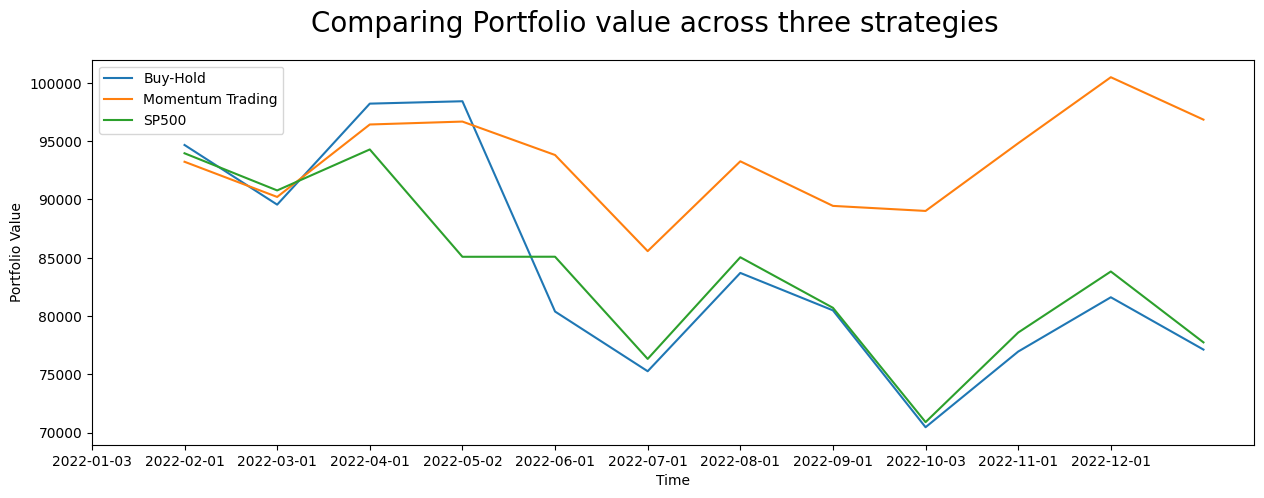

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
report.iloc[:,1:4].plot(ax = ax)
ax.set_xlabel('Time')
ax.set_ylabel('Portfolio Value')
fig.suptitle("Comparing Portfolio value across three strategies", fontsize=20)
x_vals = range(0, len(report['Date']))
plt.xticks(x_vals, report['Date'].to_list())
#ax.set_xticklabels(graph['Date'].to_list(), rotation=0)
plt.show()

## 3.6 - Discussion and Comparison of the Investment Strategies

Of the three strategies, for the stocks chosen, it is evident that Momentum trading outperforms other strategies, and Buy/hold is the underperforming one.

In [ ]:
print('Buy/Hold Trading Strategy Portfolio Value = $',Total_amount_buyhold)
print('Momentum Trading Strategy Portfolio Value = $',Total_amount_Momentum)
print('S&P500 Trading Strategy Portfolio Value = $',total_amount_index)

Buy/Hold Trading Strategy Portfolio Value = $ 77125.1741804491
Momentum Trading Strategy Portfolio Value = $ 96849.5254559782
S&P500 Trading Strategy Portfolio Value = $ 77744.3143253814


# 4 - Conclusion

## 4.1 - Thoughts and Insights



*   We chose to re-allocate monthly with the Buy/Hold strategy & allowed for a change of stocks in the portfolio. One upside to this method was it allowed our model to bring in new data every month, and adjust accordingly. In hindsight, we think it may have been beneficial to re-allocate every 3 months instead of every month, though, as it would have given the model more data to work with, and we think it would have given us better allocation options.

*   With the Momentum Trading strategy we used the same stocks and allocation method for the entire year. We ended up losing a lot of money on our KDP investment, which could have been prevented had we allowed for a change of stocks in our portfolio. This was a frsutrating finish considering we earned a profit with our other two investments (WMT & PLD).

*   Analyzing the stock chart visualizations, it is apparent that significant volatility occurred in the beginning of 2020. This can be linked to the global stock market crash brought on by the COVID-19 pandemic, and it corresponds with the erratic movements observed in the charts.

*   From the final chart, it is evident that both buy/hold and S&P not only have similar returns but also follow same pattern with time. By analysing with more stocks, there would be an opportunity to prove correlation between these two stratregies and how they behave with change in stocks.

*    Based on the parameter analysis, the allocation of PLD exhibits a swift increase as risk escalates. PLD can be identified as a growth stock

## 4.2 - Individual Contributions


Swetha: Data Preparation and Modern Portfolio Theory

Danielle: Buy/Hold, Momentum Trading, and S&P 500 Analysis

Stephen: Data Preparation and Modern Portfolio Theory

Nikhil: Momentum Trading Analysis and Comparison of Results

All group members worked on the Thoughts & Insights portion.

All group members conducted final checks of the entire notebook, and offered help on every section! The listed contributions are the sections that were explicitely assigned to us!


